#  Requêter via des API avec Python




<a href="https://github.com/linogaliana/python-datascientist/blob/master//__w/python-datascientist/python-datascientist/notebooks/course/manipulation/04c_API_TP.ipynb" class="github"><i class="fab fa-github"></i></a>
[![Download](https://img.shields.io/badge/Download-Notebook-important?logo=Jupyter)](https://downgit.github.io/#/home?url=https://github.com/linogaliana/python-datascientist/blob/master//__w/python-datascientist/python-datascientist/notebooks/course/manipulation/04c_API_TP.ipynb)
[![nbviewer](https://img.shields.io/badge/Visualize-nbviewer-blue?logo=Jupyter)](https://nbviewer.jupyter.org/github/linogaliana/python-datascientist/blob/master//__w/python-datascientist/python-datascientist/notebooks/course/manipulation/04c_API_TP.ipynb)
[![Onyxia](https://img.shields.io/badge/SSPcloud-Tester%20via%20SSP--cloud-informational&color=yellow?logo=Python)](https://datalab.sspcloud.fr/launcher/inseefrlab-helm-charts-datascience/jupyter?onyxia.friendlyName=«python-datascientist»&resources.requests.memory=«4Gi»&security.allowlist.enabled=false&init.personalInit=«https://raw.githubusercontent.com/linogaliana/python-datascientist/master/init_onyxia.sh»)
[![Binder](https://img.shields.io/badge/Launch-Binder-E66581.svg?logo=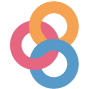)](https://mybinder.org/v2/gh/linogaliana/python-datascientist/master?filepath=/__w/python-datascientist/python-datascientist/notebooks/course/manipulation/04c_API_TP.ipynb)
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](http://colab.research.google.com/github/linogaliana/python-datascientist/blob/master//__w/python-datascientist/python-datascientist/notebooks/course/manipulation/04c_API_TP.ipynb)

# Introduction : Qu'est-ce qu'une API ?  

## Définition

Pour expliquer le principe d'une API, je vais reprendre le début de 
la fiche dédiée dans la documentation collaborative
[utilitR](https://www.book.utilitr.org/api.html) que je recommande de lire :

> Une *Application Programming Interface* (ou API) est une interface de programmation qui permet d’utiliser une application existante pour restituer des données. Le terme d’API peut être paraître intimidant, mais il s’agit simplement d’une façon de mettre à disposition des données : plutôt que de laisser l’utilisateur consulter directement des bases de données (souvent volumineuses et complexes), l’API lui propose de formuler une requête qui est traitée par le serveur hébergeant la base de données, puis de recevoir des données en réponse à sa requête.
> 
> D’un point de vue informatique, une API est une porte d’entrée clairement identifiée par laquelle un logiciel offre des services à d’autres logiciels (ou utilisateurs). L’objectif d’une API est de fournir un point d’accès à une fonctionnalité qui soit facile à utiliser et qui masque les détails de la mise en oeuvre. Par exemple, l’API Sirene permet de récupérer la raison sociale d’une entreprise à partir de son identifiant Siren en interrogeant le référentiel disponible sur Internet directement depuis un script R, sans avoir à connaître tous les détails du répertoire Sirene.
>
> À l’Insee comme ailleurs, la connexion entre les bases de données pour les nouveaux projets tend à se réaliser par des API. L’accès à des données par des API devient ainsi de plus en plus commun et est amené à devenir une compétence de base de tout utilisateur de données.
>
> [`utilitR`](https://www.book.utilitr.org/api.html)

## Avantages des API

A nouveau, citons la documentation [utilitR](https://www.book.utilitr.org/api.html)

Les API présentent de multiples avantages :

> * Les API rendent les programmes plus reproductibles. En effet, grâce aux API, il est possible de mettre à jour facilement les données utilisées par un programme si celles-ci évoluent. Cette flexibilité accrue pour l’utilisateur évite au producteur de données d’avoir à réaliser de multiples extractions, et réduit le problème de la coexistence de versions différentes des données.
> * Grâce aux API, l’utilisateur peut extraire facilement une petite partie d’une base de données plus conséquente.
> * Les API permettent de mettre à disposition des données tout en limitant le nombre de personnes ayant accès aux bases de données elles-mêmes.
> * Grâce aux API, il est possible de proposer des services sur mesure pour les utilisateurs (par exemple, un accès spécifique pour les gros utilisateurs).
>
> [`utilitR`](https://www.book.utilitr.org/api.html)

## Utilisation des API

Citons encore une fois
la documentation [`utilitR`](https://www.book.utilitr.org/api.html)

> Une API peut souvent être utilisée de deux façons : par une interface Web, et par l’intermédiaire d’un logiciel (R, Python…). Par ailleurs, les API peuvent être proposées avec un niveau de liberté variable pour l’utilisateur :
> 
> * soit en libre accès (l’utilisation n’est pas contrôlée et l’utilisateur peut utiliser le service comme bon lui semble) ;
> * soit via la génération d’un compte et d’un jeton d’accès qui permettent de sécuriser l’utilisation de l’API et de limiter le nombre de requêtes.
>
> [`utilitR`](https://www.book.utilitr.org/api.html)

De nombreuses API nécessitent une authentification, c'est-à-dire un 
compte utilisateur afin de pouvoir accéder aux données. 
Dans un premier temps, 
nous regarderons exclusivement les API ouvertes sans restriction d'accès.  
Certains exercices et exemples permettront néanmoins d'essayer des API
avec restrictions d'accès. 

# Requêter une API

## Principe général

> L’utilisation de l’interface Web est utile dans une démarche exploratoire mais trouve rapidement ses limites, notamment lorsqu’on consulte régulièrement l’API. L’utilisateur va rapidement se rendre compte qu’il est beaucoup plus commode d’utiliser une API via un logiciel de traitement pour automatiser la consultation ou pour réaliser du téléchargement de masse. De plus, l’interface Web n’existe pas systématiquement pour toutes les API.
> 
> Le mode principal de consultation d’une API consiste à adresser une requête à cette API via un logiciel adapté (R, Python, Java…). Comme pour l’utilisation d’une fonction, l’appel d’une API comprend des paramètres qui sont détaillées dans la documentation de l’API. 
>
> [`utilitR`](https://www.book.utilitr.org/api.html)

Voici les éléments importants à avoir en tête sur les requêtes (j'emprunte encore
à [`utilitR`](https://www.book.utilitr.org/api.html)):

* Le __point d’entrée__ d’un service offert par une API se présente sous la forme d’une URL (adresse web). Chaque service proposé par une API a sa propre URL. Par exemple, dans le cas de l’OpenFood Facts,
l'URL à utiliser pour obtenir des informations sur un produit particulier (l'identifiant `737628064502`) estg https://world.openfoodfacts.org/api/v0/product/737628064502.json
* Cette URL doit être complétée avec différents paramètres qui précisent la requête (par exemple l’identifiant Siren). Ces paramètres viennent s’ajouter à l’URL, souvent à la suite de `?`. Chaque service proposé par une API a ses propres paramètres, détaillés dans la documentation. 
* Lorsque l’utilisateur soumet sa requête, l’API lui renvoie une réponse structurée contenant l’ensemble des informations demandées. Le résultat envoyé par une API est majoritairement aux formats JSON ou XML (deux formats dans lesquels les informations sont hiérarchisées de manière emboitée). Plus rarement, certains services proposent une information sous forme plate (de type csv).

Du fait de la dimension hiérarchique des formats JSON ou XML, le résultat n’est pas toujours facile à récupérer mais
`python` propose d'excellents outils pour cela (meilleurs que ceux de `R`). Certains packages, notamment `json`, facilitent l’extraction de champs d’une sortie d’API. Dans certains cas, des packages spécifiques à une API ont été créés pour simplifier l’écriture d’une requête ou la récupération du résultat. Par exemple, le package
[pynsee](https://github.com/InseeFrLab/Py-Insee-Data/tree/master/pynsee)
propose des options qui seront retranscrites automatiquement dans l'URL de 
requête pour faciliter le travail sur les données Insee. 

## Exemple avec l'API de la Banque Mondiale

Avec l'API de la Banque mondiale, voici comme s'écrit une requête : 

> http://api.worldbank.org/v2/countries?incomeLevel=LMC

1. Le point d'entrée est l'URL <http://api.worldbank.org/v2>
2. Un filtre est appliqué sur les pays (`countries?`) afin de ne conserver
que celles telles que `incomeLevel=LMC` (*"Lower middle income"*)

En cliquant sur le lien, le site renvoie des données en XML,
qui ressemblent pas mal à ce qu'on a vu plus tôt avec le scraping : une structure avec des balises qui s'ouvrent et qui se ferment.

Pour obtenir la même information en `Python`, il faut revenir aux fondamentaux : on va avoir besoin du module `requests`. Suivant les API, nous avons soit besoin de rien de plus si nous parvenons directement à obtenir un json, soit devoir utiliser un *parser* comme `BeautifulSoup` dans le cas contraire. 

Avec l'API de la banque mondiale, on va utiliser le module `requests` et sa méthode `get` : on lui donne l'url de l'API qui nous intéresse, on lui demande d'en faire un json et le tour est *en apparence* joué.


In [ ]:
import requests
req = requests.get('http://api.worldbank.org/v2/countries?incomeLevel=LMC')
req

```
## <Response [200]>
```

Prenons par exemple les 1000 premiers caractères du résultat:


In [ ]:
print(req.content[:1000])

b'\xef\xbb\xbf<?xml version="1.0" encoding="utf-8"?>\r\n<wb:countries page="1" pages="2" per_page="50" total="55" xmlns:wb="http://www.worldbank.org">\r\n  <wb:country id="AGO">\r\n    <wb:iso2Code>AO</wb:iso2Code>\r\n    <wb:name>Angola</wb:name>\r\n    <wb:region id="SSF" iso2code="ZG">Sub-Saharan Africa </wb:region>\r\n    <wb:adminregion id="SSA" iso2code="ZF">Sub-Saharan Africa (excluding high income)</wb:adminregion>\r\n    <wb:incomeLevel id="LMC" iso2code="XN">Lower middle income</wb:incomeLevel>\r\n    <wb:lendingType id="IBD" iso2code="XF">IBRD</wb:lendingType>\r\n    <wb:capitalCity>Luanda</wb:capitalCity>\r\n    <wb:longitude>13.242</wb:longitude>\r\n    <wb:latitude>-8.81155</wb:latitude>\r\n  </wb:country>\r\n  <wb:country id="BEN">\r\n    <wb:iso2Code>BJ</wb:iso2Code>\r\n    <wb:name>Benin</wb:name>\r\n    <wb:region id="SSF" iso2code="ZG">Sub-Saharan Africa </wb:region>\r\n    <wb:adminregion id="SSA" iso2code="ZF">Sub-Saharan Africa (excluding high income)</wb:adminregion>\r\n    <wb:incomeLevel id="LMC" iso2code="'

Quand on regarde de plus près, on voit que les informations suivantes apparaissent: 
 
* Code du pays
* Nom du pays
* Région
* Classification en termes de revenus
* Les types de prêt pour ces pays
* La capitale
* Longitude
* Latitude

Le format XML est fortement balisé, ce qui n'est pas très pratique. 
En utilisant désormais un autre URL, on obtient un JSON, plus pratique pour travailler : 

> http://api.worldbank.org/v2/countries?incomeLevel=LMC&format=json


In [ ]:
import requests
import pandas as pd

req = requests.get('http://api.worldbank.org/v2/countries?incomeLevel=LMC&format=json')

A nouveau, les premiers caractères sont les suivants:


In [ ]:
print(req.content[:1000])

b'[{"page":1,"pages":2,"per_page":"50","total":55},[{"id":"AGO","iso2Code":"AO","name":"Angola","region":{"id":"SSF","iso2code":"ZG","value":"Sub-Saharan Africa "},"adminregion":{"id":"SSA","iso2code":"ZF","value":"Sub-Saharan Africa (excluding high income)"},"incomeLevel":{"id":"LMC","iso2code":"XN","value":"Lower middle income"},"lendingType":{"id":"IBD","iso2code":"XF","value":"IBRD"},"capitalCity":"Luanda","longitude":"13.242","latitude":"-8.81155"},{"id":"BEN","iso2Code":"BJ","name":"Benin","region":{"id":"SSF","iso2code":"ZG","value":"Sub-Saharan Africa "},"adminregion":{"id":"SSA","iso2code":"ZF","value":"Sub-Saharan Africa (excluding high income)"},"incomeLevel":{"id":"LMC","iso2code":"XN","value":"Lower middle income"},"lendingType":{"id":"IDX","iso2code":"XI","value":"IDA"},"capitalCity":"Porto-Novo","longitude":"2.6323","latitude":"6.4779"},{"id":"BGD","iso2Code":"BD","name":"Bangladesh","region":{"id":"SAS","iso2code":"8S","value":"South Asia"},"adminregion":{"id":"SAS","iso2'

Cela ressemble déjà plus à un dictionnaire `Python`[^1].

[^1]: Le JSON est un format très apprécié dans le domaine du *big data*
car il permet de stocker de manière intelligente des données
de structures diverses. Il 
s'agit d'un des formats privilégiés du paradigme No-SQL pour lequel
cet [excellent cours](http://b3d.bdpedia.fr/) propose plus de détails

Ici, il n'est même pas nécessaire en première approche 
d'utiliser le package `json`, l'information
étant déjà tabulée dans l'écho renvoyé (on a la même information pour tous les pays):


In [ ]:
wb = req.json()
wb = pd.json_normalize(wb[1])
wb.head(5)

```
##     id iso2Code  ... lendingType.iso2code lendingType.value
## 0  AGO       AO  ...                   XF              IBRD
## 1  BEN       BJ  ...                   XI               IDA
## 2  BGD       BD  ...                   XI               IDA
## 3  BLZ       BZ  ...                   XF              IBRD
## 4  BOL       BO  ...                   XF              IBRD
## 
## [5 rows x 18 columns]
```

Cependant, si on regarde la dimension de l'objet obtenu, on obtient un
chiffre rond (50 lignes). Ceci est suspect et un petit tour dans la
documentation de l'API nous apprendrait que c'est le nombre maximal de 
retour possible. Il faut donc faire attention à la documentation et 
ajouter un paramètre `page=2` pour rattraper les derniers échos: 


In [ ]:
wb2 = pd.json_normalize(
    requests.get("http://api.worldbank.org/v2/countries?incomeLevel=LMC&format=json&page=2").json()[1]
    )
pd.concat([wb, wb2])

```
##      id iso2Code  ... lendingType.iso2code lendingType.value
## 0   AGO       AO  ...                   XF              IBRD
## 1   BEN       BJ  ...                   XI               IDA
## 2   BGD       BD  ...                   XI               IDA
## 3   BLZ       BZ  ...                   XF              IBRD
## 4   BOL       BO  ...                   XF              IBRD
## 5   BTN       BT  ...                   XI               IDA
## 6   CIV       CI  ...                   XI               IDA
## 7   CMR       CM  ...                   XH             Blend
## 8   COG       CG  ...                   XH             Blend
## 9   COM       KM  ...                   XI               IDA
## 10  CPV       CV  ...                   XH             Blend
## 11  DJI       DJ  ...                   XI               IDA
## 12  DZA       DZ  ...                   XF              IBRD
## 13  EGY       EG  ...                   XF              IBRD
## 14  FSM       FM  ...                   XI               IDA
## 15  GHA       GH  ...                   XI               IDA
## 16  HND       HN  ...                   XI               IDA
## 17  HTI       HT  ...                   XI               IDA
## 18  IDN       ID  ...                   XF              IBRD
## 19  IND       IN  ...                   XF              IBRD
## 20  IRN       IR  ...                   XF              IBRD
## 21  KEN       KE  ...                   XH             Blend
## 22  KGZ       KG  ...                   XI               IDA
## 23  KHM       KH  ...                   XI               IDA
## 24  KIR       KI  ...                   XI               IDA
## 25  LAO       LA  ...                   XI               IDA
## 26  LKA       LK  ...                   XF              IBRD
## 27  LSO       LS  ...                   XI               IDA
## 28  MAR       MA  ...                   XF              IBRD
## 29  MMR       MM  ...                   XI               IDA
## 30  MNG       MN  ...                   XF              IBRD
## 31  MRT       MR  ...                   XI               IDA
## 32  NGA       NG  ...                   XH             Blend
## 33  NIC       NI  ...                   XI               IDA
## 34  NPL       NP  ...                   XI               IDA
## 35  PAK       PK  ...                   XH             Blend
## 36  PHL       PH  ...                   XF              IBRD
## 37  PNG       PG  ...                   XH             Blend
## 38  PSE       PS  ...                   XX    Not classified
## 39  SEN       SN  ...                   XI               IDA
## 40  SLB       SB  ...                   XI               IDA
## 41  SLV       SV  ...                   XF              IBRD
## 42  STP       ST  ...                   XI               IDA
## 43  SWZ       SZ  ...                   XF              IBRD
## 44  TJK       TJ  ...                   XI               IDA
## 45  TLS       TL  ...                   XH             Blend
## 46  TUN       TN  ...                   XF              IBRD
## 47  TZA       TZ  ...                   XI               IDA
## 48  UKR       UA  ...                   XF              IBRD
## 49  UZB       UZ  ...                   XH             Blend
## 0   VNM       VN  ...                   XF              IBRD
## 1   VUT       VU  ...                   XI               IDA
## 2   WSM       WS  ...                   XI               IDA
## 3   ZMB       ZM  ...                   XI               IDA
## 4   ZWE       ZW  ...                   XH             Blend
## 
## [55 rows x 18 columns]
```

Si on regarde l'information présente dans le DataFrame, on voit qu'elle se
présente sous forme `lendingType.value`. C'est parce que `pandas` a 
concaténé les différents niveaux de notre dictionnaire. Si on désire
s'en assurer, on peut regarder sur un exemple:


In [ ]:
req.json()[1][0]['incomeLevel']['value'] == wb.loc[0, 'incomeLevel.value'] 

```
## True
```

## Un catalogue incomplet d'API existantes

De plus en plus de sites mettent des API à disposition des développeurs et autres curieux. 

Pour en citer quelques-unes très connues : 

- Twitter <i class="fab fa-twitter"></i> : https://dev.twitter.com/rest/public
- Facebook <i class="fab fa-facebook"></i> : https://developers.facebook.com/
- Instagram <i class="fab fa-instagram"></i> : https://www.instagram.com/developer/
- Spotify <i class="fab fa-spotify"></i> : https://developer.spotify.com/web-api/

Cependant, il est intéressant de ne pas se restreindre à celles-ci. Beaucoup
de producteurs de données, privés comme publics, mettent à disposition 
leurs données sous forme d'API

- Pole Emploi : https://www.emploi-store-dev.fr/portail-developpeur-cms/home.html
- SNCF : https://data.sncf.com/api
- Banque Mondiale : https://datahelpdesk.worldbank.org/knowledgebase/topics/125589
- Insee: https://api.insee.fr/catalogue/ et [`pynsee`](https://github.com/InseeFrLab/Py-Insee-Data/tree/master/pynsee)

# L'API DVF : accéder à des données de transactions immobilières simplement

Le site `DVF` (demandes de valeurs foncières) permet de visualiser toutes les données relatives aux mutations à titre onéreux (ventes de maisons, appartements, garages...) réalisées durant les 5 dernières années

Un site de visualisation est disponible sur <https://app.dvf.etalab.gouv.fr/>

Ce site est très complet quand il s'agit de connaître le prix moyen au mètre
carré d'un quartier ou de comparer des régions entre elles. 
L'API DVF permet d'aller plus loin afin de récupérer les résultats dans 
un logiciel de traitement de données. Elle a été réalisée par
[Christian Quest](https://github.com/cquest) et le code
source est disponible sur Github <a href="https://github.com/cquest/dvf_as_api" class="github"><i class="fab fa-github"></i></a>

Les critères de recherche sont les suivants :
- `code_commune` = code INSEE de la commune (ex: 94068)
- `section` = section cadastrale (ex: 94068000CQ)
- `numero_plan` = identifiant de la parcelle, (ex: 94068000CQ0110)
- `lat` + `lon` + `dist` (optionnel): pour une recherche géographique, dist est par défaut un rayon de 500m
- `code_postal`

Les filtres de sélection complémentaires :
- `nature_mutation` (Vente, etc)
- `type_local` (Maison, Appartement, Local, Dépendance)


:one: 
Rechercher toutes les transactions existantes dans DVF à Plogoff (code commune `29168`, en Bretagne).
Afficher les clés du JSON et en déduire le nombre de transactions répertoriées. 



:two: 
N'afficher que les transactions portant sur des maisons. Le résultat devrait
ressembler au DataFrame suivant:

```
##     code_service_ch reference_document  ... geom.type        geom.coordinates
## 0              None               None  ...     Point  [-4.705626, 48.042047]
## 1              None               None  ...     Point  [-4.709215, 48.038356]
## 2              None               None  ...     Point  [-4.709152, 48.038782]
## 3              None               None  ...     Point  [-4.708496, 48.038467]
## 4              None               None  ...     Point  [-4.708192, 48.038626]
## ..              ...                ...  ...       ...                     ...
## 129            None               None  ...     Point   [-4.70207, 48.039692]
## 130            None               None  ...     Point   [-4.699823, 48.03942]
## 131            None               None  ...     Point  [-4.700808, 48.038956]
## 132            None               None  ...     Point  [-4.700004, 48.037184]
## 133            None               None  ...     Point  [-4.712316, 48.037312]
## 
## [134 rows x 47 columns]
```

:three: Utiliser l'[API geo](https://api.gouv.fr/documentation/api-geo) pour
récupérer le découpage communal de la ville de Plogoff


:four:
Représenter l'histogramme des prix de vente


In [ ]:
p = ventes["valeur_fonciere"].plot(kind = "hist")
p

N'hésitez pas à aller plus loin en jouant sur des variables de
groupes par exemple

:five: 
On va faire une carte des ventes en affichant le prix de l'achat.

Supposons que le DataFrame des ventes s'appelle `ventes`. Il faut d'abord le
convertir
en objet `geopandas`. 


In [ ]:
ventes = ventes.dropna(subset = ['lat','lon'])
ventes = gpd.GeoDataFrame(ventes, geometry=gpd.points_from_xy(ventes.lon, ventes.lat))
ventes

```
##     code_service_ch reference_document  ... geom                   geometry
## 0              None               None  ...  NaN  POINT (-4.71797 48.03781)
## 1              None               None  ...  NaN  POINT (-4.71797 48.03781)
## 2              None               None  ...  NaN  POINT (-4.70949 48.04230)
## 3              None               None  ...  NaN  POINT (-4.70696 48.04313)
## 4              None               None  ...  NaN  POINT (-4.70555 48.04223)
## ..              ...                ...  ...  ...                        ...
## 434            None               None  ...  NaN  POINT (-4.71243 48.03708)
## 435            None               None  ...  NaN  POINT (-4.71232 48.03731)
## 436            None               None  ...  NaN  POINT (-4.71232 48.03731)
## 437            None               None  ...  NaN  POINT (-4.71186 48.03727)
## 438            None               None  ...  NaN  POINT (-4.71601 48.03396)
## 
## [431 rows x 49 columns]
```

Avant de faire une carte, on va convertir 
les limites de la commune de Plogoff en geoJSON pour faciliter 
sa représentation avec `folium`
([voir la doc `geopandas` à ce propos](https://geopandas.readthedocs.io/en/latest/gallery/polygon_plotting_with_folium.html#Add-polygons-to-map)):


In [ ]:
geo_j = plgf.to_json()

Pour représenter graphiquement, on peut utiliser le code suivant (essayez de
le comprendre et pas uniquement de l'exécuter). 


In [ ]:
import folium
import numpy as np

ventes['map_color'] = pd.qcut(ventes['valeur_fonciere'], [0,0.8,1], labels = ['lightblue','red'])
ventes['icon'] = np.where(ventes['type_local']== 'Maison', "home", "")
ventes['num_voie_clean'] = np.where(ventes['numero_voie'].isnull(), "", ventes['numero_voie'])
ventes['text'] = ventes.apply(lambda s: "Adresse: {num} {voie} <br>Vente en {annee} <br>Prix {prix:.0f} €".format(
                        num = s['num_voie_clean'],
                        voie = s["voie"],
                        annee = s['date_mutation'].split("-")[0],
                        prix = s["valeur_fonciere"]),
             axis=1)
             
center = ventes[['lat', 'lon']].mean().values.tolist()
sw = ventes[['lat', 'lon']].min().values.tolist()
ne = ventes[['lat', 'lon']].max().values.tolist()

m = folium.Map(location = center, tiles='Stamen Toner')

# I can add marker one by one on the map
for i in range(0,len(ventes)):
    folium.Marker([ventes.iloc[i]['lat'], ventes.iloc[i]['lon']],
                  popup=ventes.iloc[i]['text'],
                  icon=folium.Icon(color=ventes.iloc[i]['map_color'], icon=ventes.iloc[i]['icon'])).add_to(m)

In [ ]:
m.fit_bounds([sw, ne])

In [ ]:
# Afficher la carte
m

<div style="width:100%;"><div style="position:relative;width:100%;height:0;padding-bottom:60%;"><span style="color:#565656">Make this Notebook Trusted to load map: File -> Trust Notebook</span><iframe src="about:blank" style="position:absolute;width:100%;height:100%;left:0;top:0;border:none !important;" data-html=%3C%21DOCTYPE%20html%3E%0A%3Chead%3E%20%20%20%20%0A%20%20%20%20%3Cmeta%20http-equiv%3D%22content-type%22%20content%3D%22text/html%3B%20charset%3DUTF-8%22%20/%3E%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%3Cscript%3E%0A%20%20%20%20%20%20%20%20%20%20%20%20L_NO_TOUCH%20%3D%20false%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20L_DISABLE_3D%20%3D%20false%3B%0A%20%20%20%20%20%20%20%20%3C/script%3E%0A%20%20%20%20%0A%20%20%20%20%3Cstyle%3Ehtml%2C%20body%20%7Bwidth%3A%20100%25%3Bheight%3A%20100%25%3Bmargin%3A%200%3Bpadding%3A%200%3B%7D%3C/style%3E%0A%20%20%20%20%3Cstyle%3E%23map%20%7Bposition%3Aabsolute%3Btop%3A0%3Bbottom%3A0%3Bright%3A0%3Bleft%3A0%3B%7D%3C/style%3E%0A%20%20%20%20%3Cscript%20src%3D%22https%3A//cdn.jsdelivr.net/npm/leaflet%401.6.0/dist/leaflet.js%22%3E%3C/script%3E%0A%20%20%20%20%3Cscript%20src%3D%22https%3A//code.jquery.com/jquery-1.12.4.min.js%22%3E%3C/script%3E%0A%20%20%20%20%3Cscript%20src%3D%22https%3A//maxcdn.bootstrapcdn.com/bootstrap/3.2.0/js/bootstrap.min.js%22%3E%3C/script%3E%0A%20%20%20%20%3Cscript%20src%3D%22https%3A//cdnjs.cloudflare.com/ajax/libs/Leaflet.awesome-markers/2.0.2/leaflet.awesome-markers.js%22%3E%3C/script%3E%0A%20%20%20%20%3Clink%20rel%3D%22stylesheet%22%20href%3D%22https%3A//cdn.jsdelivr.net/npm/leaflet%401.6.0/dist/leaflet.css%22/%3E%0A%20%20%20%20%3Clink%20rel%3D%22stylesheet%22%20href%3D%22https%3A//maxcdn.bootstrapcdn.com/bootstrap/3.2.0/css/bootstrap.min.css%22/%3E%0A%20%20%20%20%3Clink%20rel%3D%22stylesheet%22%20href%3D%22https%3A//maxcdn.bootstrapcdn.com/bootstrap/3.2.0/css/bootstrap-theme.min.css%22/%3E%0A%20%20%20%20%3Clink%20rel%3D%22stylesheet%22%20href%3D%22https%3A//maxcdn.bootstrapcdn.com/font-awesome/4.6.3/css/font-awesome.min.css%22/%3E%0A%20%20%20%20%3Clink%20rel%3D%22stylesheet%22%20href%3D%22https%3A//cdnjs.cloudflare.com/ajax/libs/Leaflet.awesome-markers/2.0.2/leaflet.awesome-markers.css%22/%3E%0A%20%20%20%20%3Clink%20rel%3D%22stylesheet%22%20href%3D%22https%3A//cdn.jsdelivr.net/gh/python-visualization/folium/folium/templates/leaflet.awesome.rotate.min.css%22/%3E%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20%3Cmeta%20name%3D%22viewport%22%20content%3D%22width%3Ddevice-width%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20initial-scale%3D1.0%2C%20maximum-scale%3D1.0%2C%20user-scalable%3Dno%22%20/%3E%0A%20%20%20%20%20%20%20%20%20%20%20%20%3Cstyle%3E%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%23map_684a634964ee44a48744340957004676%20%7B%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20position%3A%20relative%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20width%3A%20100.0%25%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20height%3A%20100.0%25%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20left%3A%200.0%25%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20top%3A%200.0%25%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%3C/style%3E%0A%20%20%20%20%20%20%20%20%0A%3C/head%3E%0A%3Cbody%3E%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20%3Cdiv%20class%3D%22folium-map%22%20id%3D%22map_684a634964ee44a48744340957004676%22%20%3E%3C/div%3E%0A%20%20%20%20%20%20%20%20%0A%3C/body%3E%0A%3Cscript%3E%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20map_684a634964ee44a48744340957004676%20%3D%20L.map%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%22map_684a634964ee44a48744340957004676%22%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20center%3A%20%5B48.03477472157772%2C%20-4.671743032482598%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20crs%3A%20L.CRS.EPSG3857%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20zoom%3A%2010%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20zoomControl%3A%20true%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20preferCanvas%3A%20false%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%0A%20%20%20%20%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20tile_layer_2374030f5cff4d9c950be6d8d77cd626%20%3D%20L.tileLayer%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%22https%3A//stamen-tiles-%7Bs%7D.a.ssl.fastly.net/toner/%7Bz%7D/%7Bx%7D/%7By%7D.png%22%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22attribution%22%3A%20%22Map%20tiles%20by%20%5Cu003ca%20href%3D%5C%22http%3A//stamen.com%5C%22%5Cu003eStamen%20Design%5Cu003c/a%5Cu003e%2C%20under%20%5Cu003ca%20href%3D%5C%22http%3A//creativecommons.org/licenses/by/3.0%5C%22%5Cu003eCC%20BY%203.0%5Cu003c/a%5Cu003e.%20Data%20by%20%5Cu0026copy%3B%20%5Cu003ca%20href%3D%5C%22http%3A//openstreetmap.org%5C%22%5Cu003eOpenStreetMap%5Cu003c/a%5Cu003e%2C%20under%20%5Cu003ca%20href%3D%5C%22http%3A//www.openstreetmap.org/copyright%5C%22%5Cu003eODbL%5Cu003c/a%5Cu003e.%22%2C%20%22detectRetina%22%3A%20false%2C%20%22maxNativeZoom%22%3A%2018%2C%20%22maxZoom%22%3A%2018%2C%20%22minZoom%22%3A%200%2C%20%22noWrap%22%3A%20false%2C%20%22opacity%22%3A%201%2C%20%22subdomains%22%3A%20%22abc%22%2C%20%22tms%22%3A%20false%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_05b734195acb4e9383c26abfe40b7c16%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.03781%2C%20-4.717967%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_3b8dc463f5e8491fb4171a3dbb1c45ac%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_05b734195acb4e9383c26abfe40b7c16.setIcon%28icon_3b8dc463f5e8491fb4171a3dbb1c45ac%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_aaac952be5054e5eb35b394a5d59166f%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_9c8c3dc86933424bb675709dc329907c%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_9c8c3dc86933424bb675709dc329907c%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%205215%20LA%20POINTE%20DU%20RAZ%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%20176000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_aaac952be5054e5eb35b394a5d59166f.setContent%28html_9c8c3dc86933424bb675709dc329907c%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_05b734195acb4e9383c26abfe40b7c16.bindPopup%28popup_aaac952be5054e5eb35b394a5d59166f%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_2b76691245bb4a35b24a7462e44eafc2%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.03781%2C%20-4.717967%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_c784cea83a0f4870a4eaa681e25225a5%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_2b76691245bb4a35b24a7462e44eafc2.setIcon%28icon_c784cea83a0f4870a4eaa681e25225a5%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_4c04d3f613be4c1facf6cc4cc8e3fcbb%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_38e21d4448ff4d8aa3469eae9bfaa2a8%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_38e21d4448ff4d8aa3469eae9bfaa2a8%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%205215%20LA%20POINTE%20DU%20RAZ%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%2085000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_4c04d3f613be4c1facf6cc4cc8e3fcbb.setContent%28html_38e21d4448ff4d8aa3469eae9bfaa2a8%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_2b76691245bb4a35b24a7462e44eafc2.bindPopup%28popup_4c04d3f613be4c1facf6cc4cc8e3fcbb%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_9dc0f0af2ac4490abc66a10dd8a1ea85%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.042296%2C%20-4.709488%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_5a6260afb1e94dc7a768e0d972f358bf%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_9dc0f0af2ac4490abc66a10dd8a1ea85.setIcon%28icon_5a6260afb1e94dc7a768e0d972f358bf%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_9d47eee7a4104351b0ecbc0ad35babaf%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_39c0f1cbd6f948eeada889d3fc7d64b2%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_39c0f1cbd6f948eeada889d3fc7d64b2%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LAOUAL%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%20897%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_9d47eee7a4104351b0ecbc0ad35babaf.setContent%28html_39c0f1cbd6f948eeada889d3fc7d64b2%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_9dc0f0af2ac4490abc66a10dd8a1ea85.bindPopup%28popup_9d47eee7a4104351b0ecbc0ad35babaf%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_3e28bbe9c7154bab90757b9de3275bfe%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.043125%2C%20-4.706963%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_b1e919f986af46ea81f50c487021078f%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_3e28bbe9c7154bab90757b9de3275bfe.setIcon%28icon_b1e919f986af46ea81f50c487021078f%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_10aa6625a8914deb9cd1110ec4347e11%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_9963290c1ff44027b3ceffbec75dcf0b%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_9963290c1ff44027b3ceffbec75dcf0b%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LAOUAL%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%20897%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_10aa6625a8914deb9cd1110ec4347e11.setContent%28html_9963290c1ff44027b3ceffbec75dcf0b%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_3e28bbe9c7154bab90757b9de3275bfe.bindPopup%28popup_10aa6625a8914deb9cd1110ec4347e11%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_781ceae18808470bb002a12ee5abfffb%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.042232%2C%20-4.705553%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_67c48aaf57ab4ba6ba21ace52eabdead%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_781ceae18808470bb002a12ee5abfffb.setIcon%28icon_67c48aaf57ab4ba6ba21ace52eabdead%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_e181f7ce03214960b999296b5e47de14%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_9812d341b6e04f09977beb1788fcf4a7%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_9812d341b6e04f09977beb1788fcf4a7%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LAOUAL%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%20120000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_e181f7ce03214960b999296b5e47de14.setContent%28html_9812d341b6e04f09977beb1788fcf4a7%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_781ceae18808470bb002a12ee5abfffb.bindPopup%28popup_e181f7ce03214960b999296b5e47de14%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_6338444a2a6b4eca878bb56cd6a93051%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.042047%2C%20-4.705626%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_a3090932d0d14bab8e01fd58e775b52c%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_6338444a2a6b4eca878bb56cd6a93051.setIcon%28icon_a3090932d0d14bab8e01fd58e775b52c%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_f5028b734e664583bfde518750599ff7%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_7398f3e766244ffa9d69f50d17a1ff17%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_7398f3e766244ffa9d69f50d17a1ff17%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20183%20LAOUAL%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%20120000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_f5028b734e664583bfde518750599ff7.setContent%28html_7398f3e766244ffa9d69f50d17a1ff17%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_6338444a2a6b4eca878bb56cd6a93051.bindPopup%28popup_f5028b734e664583bfde518750599ff7%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_10c199887604460d87bd2d5d22ecafd7%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.038236%2C%20-4.709329%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_caa4aaab6c4245c9bd446c0a7c7a3011%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_10c199887604460d87bd2d5d22ecafd7.setIcon%28icon_caa4aaab6c4245c9bd446c0a7c7a3011%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_d9a448d1111f42e4bc99d8800621aaca%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_657537b1c03b49bf92f72e8130c207e3%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_657537b1c03b49bf92f72e8130c207e3%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LESCOFF%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%201500%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_d9a448d1111f42e4bc99d8800621aaca.setContent%28html_657537b1c03b49bf92f72e8130c207e3%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_10c199887604460d87bd2d5d22ecafd7.bindPopup%28popup_d9a448d1111f42e4bc99d8800621aaca%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_0c343bcbb9c8459e9ddab0daf70460d3%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.038356%2C%20-4.709215%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_616af1a85bb8450b825171b1e9256ee8%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_0c343bcbb9c8459e9ddab0daf70460d3.setIcon%28icon_616af1a85bb8450b825171b1e9256ee8%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_06d806423ef8439caa82ede434cea21c%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_72b900d11c5f4bd793e66abb40e922c4%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_72b900d11c5f4bd793e66abb40e922c4%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20220%20KREIZ%20AN%20AVEL%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%20105000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_06d806423ef8439caa82ede434cea21c.setContent%28html_72b900d11c5f4bd793e66abb40e922c4%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_0c343bcbb9c8459e9ddab0daf70460d3.bindPopup%28popup_06d806423ef8439caa82ede434cea21c%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_59f72b26254644a796428f6d603f713c%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.039437%2C%20-4.710305%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_2f5582120a2e4694be9a05f01e0baa64%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_59f72b26254644a796428f6d603f713c.setIcon%28icon_2f5582120a2e4694be9a05f01e0baa64%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_0c947ccba45b471986609ed415e0c926%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_c492cb14b672409e8db724613baea766%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_c492cb14b672409e8db724613baea766%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LESCOFF%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%201000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_0c947ccba45b471986609ed415e0c926.setContent%28html_c492cb14b672409e8db724613baea766%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_59f72b26254644a796428f6d603f713c.bindPopup%28popup_0c947ccba45b471986609ed415e0c926%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_5d1e53af2ef94faf9e0993572e3030fe%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.038782%2C%20-4.709152%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_9cb6555e61244bbebb6a91d65546c578%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_5d1e53af2ef94faf9e0993572e3030fe.setIcon%28icon_9cb6555e61244bbebb6a91d65546c578%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_dd3cfc22dd3343b38d10d20c09d1bb8f%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_e1475ab475c84ba9a7d088e8c2e07aa8%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_e1475ab475c84ba9a7d088e8c2e07aa8%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20215%20AR%20VEL%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%2085000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_dd3cfc22dd3343b38d10d20c09d1bb8f.setContent%28html_e1475ab475c84ba9a7d088e8c2e07aa8%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_5d1e53af2ef94faf9e0993572e3030fe.bindPopup%28popup_dd3cfc22dd3343b38d10d20c09d1bb8f%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_b36fb2a46d514d2699bf4a616e35a6a0%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.038442%2C%20-4.709021%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_e3a3bac8c79c4684b270fbfcb13f21c0%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_b36fb2a46d514d2699bf4a616e35a6a0.setIcon%28icon_e3a3bac8c79c4684b270fbfcb13f21c0%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_5c13b003248e4305a5eed1bd3b3f872d%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_eb92c4d3d8d44788b1718e8ff8f3f369%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_eb92c4d3d8d44788b1718e8ff8f3f369%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LESCOFF%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%20105000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_5c13b003248e4305a5eed1bd3b3f872d.setContent%28html_eb92c4d3d8d44788b1718e8ff8f3f369%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_b36fb2a46d514d2699bf4a616e35a6a0.bindPopup%28popup_5c13b003248e4305a5eed1bd3b3f872d%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_b874005b19854ec3b62f2e67926be109%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.038467%2C%20-4.708496%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_3b9749ba77284174a05064a35c42002f%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_b874005b19854ec3b62f2e67926be109.setIcon%28icon_3b9749ba77284174a05064a35c42002f%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_2bbbec010f1f42fabc11c92942f39e1a%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_dc12b89595e2403a8d8d6e6fe8d11a54%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_dc12b89595e2403a8d8d6e6fe8d11a54%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20208%20LESCOFF%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20130000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_2bbbec010f1f42fabc11c92942f39e1a.setContent%28html_dc12b89595e2403a8d8d6e6fe8d11a54%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_b874005b19854ec3b62f2e67926be109.bindPopup%28popup_2bbbec010f1f42fabc11c92942f39e1a%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_c95f492261b2473fa6cc46010c98a36c%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.038626%2C%20-4.708192%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_e744723d515f4f30aba6ee2cf329f53c%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_c95f492261b2473fa6cc46010c98a36c.setIcon%28icon_e744723d515f4f30aba6ee2cf329f53c%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_3d751137cf944a5a9666afbbc373dc75%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_76c4ee647feb49c39c3d32aa3faf66ed%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_76c4ee647feb49c39c3d32aa3faf66ed%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20206%20DES%20LANGOUSTIERS%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%2065000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_3d751137cf944a5a9666afbbc373dc75.setContent%28html_76c4ee647feb49c39c3d32aa3faf66ed%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_c95f492261b2473fa6cc46010c98a36c.bindPopup%28popup_3d751137cf944a5a9666afbbc373dc75%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_028c21e9781a408fa95cf41b0a499219%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.03872%2C%20-4.707889%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_1d0dc0fc248048c7ad1dc2fcf5386487%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_028c21e9781a408fa95cf41b0a499219.setIcon%28icon_1d0dc0fc248048c7ad1dc2fcf5386487%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_b3a7f068350244debabceba1c983e2c8%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_c9fa0c6b187349348abe4b73ad99ecb0%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_c9fa0c6b187349348abe4b73ad99ecb0%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LESCOFF%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%2065000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_b3a7f068350244debabceba1c983e2c8.setContent%28html_c9fa0c6b187349348abe4b73ad99ecb0%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_028c21e9781a408fa95cf41b0a499219.bindPopup%28popup_b3a7f068350244debabceba1c983e2c8%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_cdc00ef2a9cd400cacfe0879112db1f2%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.039763%2C%20-4.706615%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_b22c3fc171d6476a8cc252b67ff6fd6c%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_cdc00ef2a9cd400cacfe0879112db1f2.setIcon%28icon_b22c3fc171d6476a8cc252b67ff6fd6c%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_4c77c6be2d134adc91d7c9653ffe9a86%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_b55d9b1ad55444caba0d0edc18637bf1%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_b55d9b1ad55444caba0d0edc18637bf1%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LESCOFF%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%2010000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_4c77c6be2d134adc91d7c9653ffe9a86.setContent%28html_b55d9b1ad55444caba0d0edc18637bf1%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_cdc00ef2a9cd400cacfe0879112db1f2.bindPopup%28popup_4c77c6be2d134adc91d7c9653ffe9a86%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_b44679053fcc46c7b5f39a6ff2e8d5d2%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.039617%2C%20-4.706066%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_d70fef5b06d74393af7a220956afb269%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_b44679053fcc46c7b5f39a6ff2e8d5d2.setIcon%28icon_d70fef5b06d74393af7a220956afb269%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_3f7be91d8aa646e899908154938b253a%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_0b1d6890644943cdb5b38f4fec9b24c5%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_0b1d6890644943cdb5b38f4fec9b24c5%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20198%20DES%20LANGOUSTIERS%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%2090000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_3f7be91d8aa646e899908154938b253a.setContent%28html_0b1d6890644943cdb5b38f4fec9b24c5%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_b44679053fcc46c7b5f39a6ff2e8d5d2.bindPopup%28popup_3f7be91d8aa646e899908154938b253a%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_85d5505259ec4504afb68edd205d6f92%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.039813%2C%20-4.706178%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_9a99637a27e141cba45faa85976c4ffb%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_85d5505259ec4504afb68edd205d6f92.setIcon%28icon_9a99637a27e141cba45faa85976c4ffb%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_87e486f7b4284283ad6dea2d786d267d%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_1825e0b17ea7417eb76b6f0c0d523375%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_1825e0b17ea7417eb76b6f0c0d523375%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LESCOFF%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%2090000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_87e486f7b4284283ad6dea2d786d267d.setContent%28html_1825e0b17ea7417eb76b6f0c0d523375%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_85d5505259ec4504afb68edd205d6f92.bindPopup%28popup_87e486f7b4284283ad6dea2d786d267d%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_0044d1e67a2f4e62a9cb866998cfb4e9%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.039813%2C%20-4.706178%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_0962a2da7dfb4ea3805f175ac49c20c6%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_0044d1e67a2f4e62a9cb866998cfb4e9.setIcon%28icon_0962a2da7dfb4ea3805f175ac49c20c6%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_27c55e12649c4b1e8626280fe686f10e%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_5296c34d2a7a41b08bc33def2f2ac5fd%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_5296c34d2a7a41b08bc33def2f2ac5fd%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LESCOFF%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%2090000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_27c55e12649c4b1e8626280fe686f10e.setContent%28html_5296c34d2a7a41b08bc33def2f2ac5fd%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_0044d1e67a2f4e62a9cb866998cfb4e9.bindPopup%28popup_27c55e12649c4b1e8626280fe686f10e%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_215706ce0b1544f5b286a33272697fc6%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.039561%2C%20-4.705858%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_6d827ad94945498ea35f13d9eac775de%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_215706ce0b1544f5b286a33272697fc6.setIcon%28icon_6d827ad94945498ea35f13d9eac775de%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_3dfe41dcd32b460ca96b4e67330df5f1%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_7823f0e8c1fc4481bf86d240c5ea1f89%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_7823f0e8c1fc4481bf86d240c5ea1f89%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20197%20LESCOFF%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%2062000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_3dfe41dcd32b460ca96b4e67330df5f1.setContent%28html_7823f0e8c1fc4481bf86d240c5ea1f89%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_215706ce0b1544f5b286a33272697fc6.bindPopup%28popup_3dfe41dcd32b460ca96b4e67330df5f1%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_52b49a7777fc49d98232b2a63da7c404%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.039599%2C%20-4.70426%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_abd47ad84cad4437b46cfc2f6eca8003%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_52b49a7777fc49d98232b2a63da7c404.setIcon%28icon_abd47ad84cad4437b46cfc2f6eca8003%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_b79815320b6f49e3b7fee7865ea74814%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_9a1ecd2a6509459f95ccc38273abf4e6%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_9a1ecd2a6509459f95ccc38273abf4e6%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20236%20LESCOFF%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%2027500%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_b79815320b6f49e3b7fee7865ea74814.setContent%28html_9a1ecd2a6509459f95ccc38273abf4e6%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_52b49a7777fc49d98232b2a63da7c404.bindPopup%28popup_b79815320b6f49e3b7fee7865ea74814%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_e0c326d71763473ebd97d753d4ccbc82%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.039585%2C%20-4.704422%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_8fbcf1b28e05412d90f0ad3530248216%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_e0c326d71763473ebd97d753d4ccbc82.setIcon%28icon_8fbcf1b28e05412d90f0ad3530248216%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_28323bdf7fd3490b8c23f373791254e7%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_5b3983a00665446c9281e602e8d9944e%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_5b3983a00665446c9281e602e8d9944e%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20235%20DES%20LANGOUSTIERS%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%20130000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_28323bdf7fd3490b8c23f373791254e7.setContent%28html_5b3983a00665446c9281e602e8d9944e%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_e0c326d71763473ebd97d753d4ccbc82.bindPopup%28popup_28323bdf7fd3490b8c23f373791254e7%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_9727b926a2be470f8d7b50d428864b71%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.039474%2C%20-4.704727%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_c8e1df78747548f6b528902bd7693aeb%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_9727b926a2be470f8d7b50d428864b71.setIcon%28icon_c8e1df78747548f6b528902bd7693aeb%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_ebcd57b951104da59d572efc1d54c585%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_428200b668fe465f8fab6487a2ff0046%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_428200b668fe465f8fab6487a2ff0046%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20234%20LESCOFF%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%20130000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_ebcd57b951104da59d572efc1d54c585.setContent%28html_428200b668fe465f8fab6487a2ff0046%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_9727b926a2be470f8d7b50d428864b71.bindPopup%28popup_ebcd57b951104da59d572efc1d54c585%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_d15ecf72b2fa42fbb38ec05952979feb%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.036863%2C%20-4.709276%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_5b796e88340a45b1af7f5caf0dd3d6d1%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_d15ecf72b2fa42fbb38ec05952979feb.setIcon%28icon_5b796e88340a45b1af7f5caf0dd3d6d1%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_6bb24830ff9840b39bad8698f572e64f%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_77f8ca30d59c4b4d9df8af3a65316052%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_77f8ca30d59c4b4d9df8af3a65316052%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LESCOFF%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%20183000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_6bb24830ff9840b39bad8698f572e64f.setContent%28html_77f8ca30d59c4b4d9df8af3a65316052%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_d15ecf72b2fa42fbb38ec05952979feb.bindPopup%28popup_6bb24830ff9840b39bad8698f572e64f%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_9ceff689e3f64fc6b6f5160b1d369e58%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.036781%2C%20-4.709462%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_8f7505550a6f43f384120c926bf78ffb%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_9ceff689e3f64fc6b6f5160b1d369e58.setIcon%28icon_8f7505550a6f43f384120c926bf78ffb%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_1687ed9090ee4e5e8f8b6685aaca435e%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_13d804e473e84fc9852950e0db3f0d47%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_13d804e473e84fc9852950e0db3f0d47%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LESCOFF%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%20183000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_1687ed9090ee4e5e8f8b6685aaca435e.setContent%28html_13d804e473e84fc9852950e0db3f0d47%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_9ceff689e3f64fc6b6f5160b1d369e58.bindPopup%28popup_1687ed9090ee4e5e8f8b6685aaca435e%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_02488f0fc1b0467a97d0247902748126%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.036899%2C%20-4.709473%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_07031e2e7a1a4db5a3a306d3be1f8edc%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_02488f0fc1b0467a97d0247902748126.setIcon%28icon_07031e2e7a1a4db5a3a306d3be1f8edc%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_5985a2e584b745eda8a5d330e6cf10b0%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_0461b6eee62a45ada1538b8ecb92a937%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_0461b6eee62a45ada1538b8ecb92a937%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20278%20DU%20SOLDAT%20DUVAL%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%20183000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_5985a2e584b745eda8a5d330e6cf10b0.setContent%28html_0461b6eee62a45ada1538b8ecb92a937%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_02488f0fc1b0467a97d0247902748126.bindPopup%28popup_5985a2e584b745eda8a5d330e6cf10b0%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_859c155461fc4517af60475bb5b0ca59%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.038238%2C%20-4.707333%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_792498159268460ea10b5aa55528555b%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_859c155461fc4517af60475bb5b0ca59.setIcon%28icon_792498159268460ea10b5aa55528555b%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_dad78e9525354ab0b23db70ee2318649%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_334856a627e741d891bcbcb8383e003c%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_334856a627e741d891bcbcb8383e003c%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20268%20LESCOFF%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%2070000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_dad78e9525354ab0b23db70ee2318649.setContent%28html_334856a627e741d891bcbcb8383e003c%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_859c155461fc4517af60475bb5b0ca59.bindPopup%28popup_dad78e9525354ab0b23db70ee2318649%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_52001c829ce243e4ac0f3f787f9c0ea1%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.038774%2C%20-4.708101%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_01427fe1a313456fbe053575e3d564cc%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_52001c829ce243e4ac0f3f787f9c0ea1.setIcon%28icon_01427fe1a313456fbe053575e3d564cc%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_3c3b476d6bbf40a88a55ae602c40549b%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_82ce6649252b4054bb3a8a35bc6d46db%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_82ce6649252b4054bb3a8a35bc6d46db%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LESCOFF%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%2065000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_3c3b476d6bbf40a88a55ae602c40549b.setContent%28html_82ce6649252b4054bb3a8a35bc6d46db%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_52001c829ce243e4ac0f3f787f9c0ea1.bindPopup%28popup_3c3b476d6bbf40a88a55ae602c40549b%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_ddde1e597583411a9dcf3c209178be8e%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.039593%2C%20-4.703711%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_6413466d645f4c22b7b0571b68339476%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_ddde1e597583411a9dcf3c209178be8e.setIcon%28icon_6413466d645f4c22b7b0571b68339476%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_4139fbe5fb454a418658012069512a70%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_8816981c333140f687b65249e7d1b8b5%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_8816981c333140f687b65249e7d1b8b5%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LESCOFF%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%20123000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_4139fbe5fb454a418658012069512a70.setContent%28html_8816981c333140f687b65249e7d1b8b5%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_ddde1e597583411a9dcf3c209178be8e.bindPopup%28popup_4139fbe5fb454a418658012069512a70%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_eec89e2e15ed4fa0992779a9b3bcb412%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.039118%2C%20-4.709662%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_5073691bd28842ba847f3953dddd771b%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_eec89e2e15ed4fa0992779a9b3bcb412.setIcon%28icon_5073691bd28842ba847f3953dddd771b%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_f8969296cbfe4513908055c9feed0ee7%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_dbbaf0a921994121858e2787413dd81c%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_dbbaf0a921994121858e2787413dd81c%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LESCOFF%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%201268%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_f8969296cbfe4513908055c9feed0ee7.setContent%28html_dbbaf0a921994121858e2787413dd81c%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_eec89e2e15ed4fa0992779a9b3bcb412.bindPopup%28popup_f8969296cbfe4513908055c9feed0ee7%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_ab66c8e336704b31bc0c379820e12aba%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.039244%2C%20-4.709273%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_d5711bc4684c4102bf1598a849ab199b%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_ab66c8e336704b31bc0c379820e12aba.setIcon%28icon_d5711bc4684c4102bf1598a849ab199b%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_71c19283e98c4729a616c8afdc9f926d%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_dfa606c887654dbc9bd206395ef64ad6%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_dfa606c887654dbc9bd206395ef64ad6%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LESCOFF%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%201238%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_71c19283e98c4729a616c8afdc9f926d.setContent%28html_dfa606c887654dbc9bd206395ef64ad6%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_ab66c8e336704b31bc0c379820e12aba.bindPopup%28popup_71c19283e98c4729a616c8afdc9f926d%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_1d38baecf9bc4312a64c6b6011092a1d%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.04302%2C%20-4.702863%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_4b50d411448940319485ba6984f5c00d%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_1d38baecf9bc4312a64c6b6011092a1d.setIcon%28icon_4b50d411448940319485ba6984f5c00d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_1b2bbcf78da44229a7edda359e7d22a5%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_3ea8328b98dd4cbab119fc8001c91be2%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_3ea8328b98dd4cbab119fc8001c91be2%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LAOUAL%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%2084%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_1b2bbcf78da44229a7edda359e7d22a5.setContent%28html_3ea8328b98dd4cbab119fc8001c91be2%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_1d38baecf9bc4312a64c6b6011092a1d.bindPopup%28popup_1b2bbcf78da44229a7edda359e7d22a5%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_fbce5bbabe0140a19b9f0be984b4d3f2%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.041793%2C%20-4.705125%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_91e12de20e66420cb31b9e43bc3be0e8%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_fbce5bbabe0140a19b9f0be984b4d3f2.setIcon%28icon_91e12de20e66420cb31b9e43bc3be0e8%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_d1f3651e0b3a41a2b378675807297c1e%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_279934d805474f41bc944ad113607eb6%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_279934d805474f41bc944ad113607eb6%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LAOUAL%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%20291%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_d1f3651e0b3a41a2b378675807297c1e.setContent%28html_279934d805474f41bc944ad113607eb6%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_fbce5bbabe0140a19b9f0be984b4d3f2.bindPopup%28popup_d1f3651e0b3a41a2b378675807297c1e%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_24966c644f294d25b6161a26cd73e2d7%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.041517%2C%20-4.70501%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_68f10f10d55f4e96822c66a29868ffb9%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_24966c644f294d25b6161a26cd73e2d7.setIcon%28icon_68f10f10d55f4e96822c66a29868ffb9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_7072b3f162634be088d07d6c9cf9a8af%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_c9e7be47ddb14ab59be470680da61aef%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_c9e7be47ddb14ab59be470680da61aef%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LAOUAL%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%20213%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_7072b3f162634be088d07d6c9cf9a8af.setContent%28html_c9e7be47ddb14ab59be470680da61aef%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_24966c644f294d25b6161a26cd73e2d7.bindPopup%28popup_7072b3f162634be088d07d6c9cf9a8af%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_45446d4b7968458d9fa44af1d4bbc219%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.040483%2C%20-4.697976%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_fd74bc2ab3b548778970a2f16e09b380%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_45446d4b7968458d9fa44af1d4bbc219.setIcon%28icon_fd74bc2ab3b548778970a2f16e09b380%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_d8ef9f43950d4a41b26ca8ec8faaeb09%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_daf666ad092444c2a5352fd8595dba35%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_daf666ad092444c2a5352fd8595dba35%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERHERNEAU%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%201665%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_d8ef9f43950d4a41b26ca8ec8faaeb09.setContent%28html_daf666ad092444c2a5352fd8595dba35%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_45446d4b7968458d9fa44af1d4bbc219.bindPopup%28popup_d8ef9f43950d4a41b26ca8ec8faaeb09%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_159539144cd14c7196518284bdce5d64%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.041406%2C%20-4.700591%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_f4b7740aa6864571b69e9aabc303e564%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_159539144cd14c7196518284bdce5d64.setIcon%28icon_f4b7740aa6864571b69e9aabc303e564%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_2c8afdaffa114ac6a1bb0abe97dfb2fe%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_beb9bb484db84b6199ed682a48b8b377%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_beb9bb484db84b6199ed682a48b8b377%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20137%20KERHERNEAU%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20125000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_2c8afdaffa114ac6a1bb0abe97dfb2fe.setContent%28html_beb9bb484db84b6199ed682a48b8b377%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_159539144cd14c7196518284bdce5d64.bindPopup%28popup_2c8afdaffa114ac6a1bb0abe97dfb2fe%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_3080ea98f3a04d2088290755e5520ad2%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.041625%2C%20-4.700293%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_1dea7556d6d4404b955b02ec59135181%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_3080ea98f3a04d2088290755e5520ad2.setIcon%28icon_1dea7556d6d4404b955b02ec59135181%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_471f33c715ba4feaa68d3bcdf665c04d%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_d290915cbf764cbd8058ec6bbb76c63e%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_d290915cbf764cbd8058ec6bbb76c63e%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20138%20KERHERNEAU%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%20178675%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_471f33c715ba4feaa68d3bcdf665c04d.setContent%28html_d290915cbf764cbd8058ec6bbb76c63e%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_3080ea98f3a04d2088290755e5520ad2.bindPopup%28popup_471f33c715ba4feaa68d3bcdf665c04d%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_e5d436d9c71448639cd832e49b0f7c91%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.039985%2C%20-4.703074%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_21e68e1b4ef04efea33f23fadeb0a16d%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_e5d436d9c71448639cd832e49b0f7c91.setIcon%28icon_21e68e1b4ef04efea33f23fadeb0a16d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_315f67b5a36944899156a1f194463aca%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_e09b0e6f9f244e698c84340c66cf63ff%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_e09b0e6f9f244e698c84340c66cf63ff%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20155%20DES%20LANGOUSTIERS%20%3Cbr%3EVente%20en%202019%20%3Cbr%3EPrix%20172790%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_315f67b5a36944899156a1f194463aca.setContent%28html_e09b0e6f9f244e698c84340c66cf63ff%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_e5d436d9c71448639cd832e49b0f7c91.bindPopup%28popup_315f67b5a36944899156a1f194463aca%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_6a916682e5bc41b9a0656fbfa2e1501e%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.039985%2C%20-4.703074%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_f45d7ee9c25e4527be3937e29bb94e6f%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_6a916682e5bc41b9a0656fbfa2e1501e.setIcon%28icon_f45d7ee9c25e4527be3937e29bb94e6f%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_f4fc0da7861d40bcbea674c8a46ba00b%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_11afe07200a34c3d879e368bb84fc4ed%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_11afe07200a34c3d879e368bb84fc4ed%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20155%20DES%20LANGOUSTIERS%20%3Cbr%3EVente%20en%202019%20%3Cbr%3EPrix%20172790%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_f4fc0da7861d40bcbea674c8a46ba00b.setContent%28html_11afe07200a34c3d879e368bb84fc4ed%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_6a916682e5bc41b9a0656fbfa2e1501e.bindPopup%28popup_f4fc0da7861d40bcbea674c8a46ba00b%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_ed25dee670e049df828ef7caf732fb52%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.040302%2C%20-4.703544%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_ede13e442a7b4203ad4a7d6b83a0a4cc%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_ed25dee670e049df828ef7caf732fb52.setIcon%28icon_ede13e442a7b4203ad4a7d6b83a0a4cc%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_01f90acbe49d4caf85a50574999e7f3b%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_9ba62145bc404de4bb1f4e64d608c506%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_9ba62145bc404de4bb1f4e64d608c506%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LESCOFF%20%3Cbr%3EVente%20en%202019%20%3Cbr%3EPrix%201467%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_01f90acbe49d4caf85a50574999e7f3b.setContent%28html_9ba62145bc404de4bb1f4e64d608c506%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_ed25dee670e049df828ef7caf732fb52.bindPopup%28popup_01f90acbe49d4caf85a50574999e7f3b%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_171c2078eb214479bc10eaa4a664b119%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.0401%2C%20-4.703612%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_920e0d06969241739f6c8399dd190e07%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_171c2078eb214479bc10eaa4a664b119.setIcon%28icon_920e0d06969241739f6c8399dd190e07%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_de6677ae69b34a70a9bfe62f70735935%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_86ebcc4fb0bf4bf29866900e83658898%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_86ebcc4fb0bf4bf29866900e83658898%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20162%20LESCOFF%20%3Cbr%3EVente%20en%202019%20%3Cbr%3EPrix%201467%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_de6677ae69b34a70a9bfe62f70735935.setContent%28html_86ebcc4fb0bf4bf29866900e83658898%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_171c2078eb214479bc10eaa4a664b119.bindPopup%28popup_de6677ae69b34a70a9bfe62f70735935%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_cadde978859a4d9895c2476dc7f51e35%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.04055%2C%20-4.699342%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_317a4fea9f98403aae5fec4283acd159%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_cadde978859a4d9895c2476dc7f51e35.setIcon%28icon_317a4fea9f98403aae5fec4283acd159%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_3198f88328fc4d95a607a5849110b223%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_40e10ed2504f4c24a63515ec816ac15f%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_40e10ed2504f4c24a63515ec816ac15f%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20144%20D%20IROISE%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%2075000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_3198f88328fc4d95a607a5849110b223.setContent%28html_40e10ed2504f4c24a63515ec816ac15f%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_cadde978859a4d9895c2476dc7f51e35.bindPopup%28popup_3198f88328fc4d95a607a5849110b223%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_41fcb6372ede4d64bc0c202330c8a759%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.039907%2C%20-4.703508%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_07f4d626208b48e7836249025606c24d%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_41fcb6372ede4d64bc0c202330c8a759.setIcon%28icon_07f4d626208b48e7836249025606c24d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_753b629a225a48de8ca63218b8906387%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_fa698106d6be4c21b55025cad427409f%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_fa698106d6be4c21b55025cad427409f%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20161%20DES%20LANGOUSTIERS%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%20123000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_753b629a225a48de8ca63218b8906387.setContent%28html_fa698106d6be4c21b55025cad427409f%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_41fcb6372ede4d64bc0c202330c8a759.bindPopup%28popup_753b629a225a48de8ca63218b8906387%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_b3684540bc1b4ba7adab8a29fdfd4ca1%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.039851%2C%20-4.703561%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_fee0f6e87e1c48069d651f541fa9841c%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_b3684540bc1b4ba7adab8a29fdfd4ca1.setIcon%28icon_fee0f6e87e1c48069d651f541fa9841c%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_4ffc5538e8344dae92c6a262c04dbf06%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_2dc0fb7692cd45939f559e98205a59bd%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_2dc0fb7692cd45939f559e98205a59bd%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LESCOFF%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%20123000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_4ffc5538e8344dae92c6a262c04dbf06.setContent%28html_2dc0fb7692cd45939f559e98205a59bd%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_b3684540bc1b4ba7adab8a29fdfd4ca1.bindPopup%28popup_4ffc5538e8344dae92c6a262c04dbf06%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_83b1fe3fe5cf4daca721e80e3449e320%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.041159%2C%20-4.705031%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_8c156fc1961745ff941b0d112bcf3681%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_83b1fe3fe5cf4daca721e80e3449e320.setIcon%28icon_8c156fc1961745ff941b0d112bcf3681%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_d0ab04a7dedd413bb65eb3f79b662242%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_4ccbe325284545a1b598e0cf389a3bb0%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_4ccbe325284545a1b598e0cf389a3bb0%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%205233%20DES%20AJONCS%20D%20OR%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%20245030%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_d0ab04a7dedd413bb65eb3f79b662242.setContent%28html_4ccbe325284545a1b598e0cf389a3bb0%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_83b1fe3fe5cf4daca721e80e3449e320.bindPopup%28popup_d0ab04a7dedd413bb65eb3f79b662242%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_41ae386b51fb41f485b25ad8b51d3c1c%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.041159%2C%20-4.705031%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_21f63acb488b466eafc533376e16fe8b%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_41ae386b51fb41f485b25ad8b51d3c1c.setIcon%28icon_21f63acb488b466eafc533376e16fe8b%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_f8b3da65a7244e2c93cd68b8e0a8ae97%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_ee2cd34f84be43ec944450afef4ffbe9%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_ee2cd34f84be43ec944450afef4ffbe9%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%205233%20DES%20AJONCS%20D%20OR%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%20245030%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_f8b3da65a7244e2c93cd68b8e0a8ae97.setContent%28html_ee2cd34f84be43ec944450afef4ffbe9%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_41ae386b51fb41f485b25ad8b51d3c1c.bindPopup%28popup_f8b3da65a7244e2c93cd68b8e0a8ae97%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_1aef6e1241784fa5b669d8b13e54c2f7%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.041286%2C%20-4.705006%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_c617005ec1f9460d9c1989716e455120%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_1aef6e1241784fa5b669d8b13e54c2f7.setIcon%28icon_c617005ec1f9460d9c1989716e455120%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_b06fac42fcd4454da770b83ed7a373e7%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_d0024db6c33641a299f8b6aa67ec7483%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_d0024db6c33641a299f8b6aa67ec7483%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%205233%20DES%20AJONCS%20D%20OR%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%20245030%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_b06fac42fcd4454da770b83ed7a373e7.setContent%28html_d0024db6c33641a299f8b6aa67ec7483%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_1aef6e1241784fa5b669d8b13e54c2f7.bindPopup%28popup_b06fac42fcd4454da770b83ed7a373e7%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_83271f5e22154f9dbf97b52a2d71c7e9%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.041188%2C%20-4.70479%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_0c70191ff3e144d0b521484773ebe21e%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_83271f5e22154f9dbf97b52a2d71c7e9.setIcon%28icon_0c70191ff3e144d0b521484773ebe21e%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_929fd59313754276baf5ac19ae2af0a2%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_83bd0dac7c6242ed8cfa8e427046cd18%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_83bd0dac7c6242ed8cfa8e427046cd18%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%205233%20DES%20AJONCS%20D%20OR%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%20245030%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_929fd59313754276baf5ac19ae2af0a2.setContent%28html_83bd0dac7c6242ed8cfa8e427046cd18%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_83271f5e22154f9dbf97b52a2d71c7e9.bindPopup%28popup_929fd59313754276baf5ac19ae2af0a2%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_c7858802a0d242ef8070712f6a90f33a%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.041079%2C%20-4.70486%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_94cb34fa23454b46ac44bf8d88f8c202%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_c7858802a0d242ef8070712f6a90f33a.setIcon%28icon_94cb34fa23454b46ac44bf8d88f8c202%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_7e160c535d1a41e3b801b6eee3df57f3%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_ab6d5f94d61f454d831e0a8bede40e5b%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_ab6d5f94d61f454d831e0a8bede40e5b%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%205233%20DES%20AJONCS%20D%20OR%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%20245030%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_7e160c535d1a41e3b801b6eee3df57f3.setContent%28html_ab6d5f94d61f454d831e0a8bede40e5b%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_c7858802a0d242ef8070712f6a90f33a.bindPopup%28popup_7e160c535d1a41e3b801b6eee3df57f3%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_45f5f536460b4f2b9a9e31ab165bcf5e%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.041902%2C%20-4.705415%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_a3fe7ada87d647309268b6b224b19cb3%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_45f5f536460b4f2b9a9e31ab165bcf5e.setIcon%28icon_a3fe7ada87d647309268b6b224b19cb3%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_b96b15b18cb54cb4b8f33e1d8d42d44e%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_c70cf7f309d04284b895122be10e0fca%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_c70cf7f309d04284b895122be10e0fca%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LAOUAL%20%3Cbr%3EVente%20en%202019%20%3Cbr%3EPrix%2050%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_b96b15b18cb54cb4b8f33e1d8d42d44e.setContent%28html_c70cf7f309d04284b895122be10e0fca%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_45f5f536460b4f2b9a9e31ab165bcf5e.bindPopup%28popup_b96b15b18cb54cb4b8f33e1d8d42d44e%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_a9c9fb8166974a10a29c92579e6b4f71%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.040589%2C%20-4.690298%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_942fe79de0024eb1ac3f551e6384094f%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_a9c9fb8166974a10a29c92579e6b4f71.setIcon%28icon_942fe79de0024eb1ac3f551e6384094f%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_31b10de47c7242b59b50e725a7d767bf%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_14e91ed5a6c94df7be4e89c6138eb904%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_14e91ed5a6c94df7be4e89c6138eb904%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERGADALEN%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%2062000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_31b10de47c7242b59b50e725a7d767bf.setContent%28html_14e91ed5a6c94df7be4e89c6138eb904%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_a9c9fb8166974a10a29c92579e6b4f71.bindPopup%28popup_31b10de47c7242b59b50e725a7d767bf%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_e560106e334449429159e657d667b6e0%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.040075%2C%20-4.69014%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_85fd03392c5c4395b20eba1ab741d8fe%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_e560106e334449429159e657d667b6e0.setIcon%28icon_85fd03392c5c4395b20eba1ab741d8fe%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_41b5cc909e3043fd8deec9ec30bdb952%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_ed44bc445c764af2a9048e45f8ee9d97%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_ed44bc445c764af2a9048e45f8ee9d97%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20110%20KERGADALEN%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%2062000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_41b5cc909e3043fd8deec9ec30bdb952.setContent%28html_ed44bc445c764af2a9048e45f8ee9d97%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_e560106e334449429159e657d667b6e0.bindPopup%28popup_41b5cc909e3043fd8deec9ec30bdb952%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_5629368123134e09abd44466eac8ee79%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.041337%2C%20-4.691061%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_53217900bd3c45c8bc990afc14e2f8e1%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_5629368123134e09abd44466eac8ee79.setIcon%28icon_53217900bd3c45c8bc990afc14e2f8e1%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_58b11cdfc4f74b61b2c645614f5742d3%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_449e799e54294f7e9ab82f0da2a47e2a%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_449e799e54294f7e9ab82f0da2a47e2a%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERGADALEN%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20270000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_58b11cdfc4f74b61b2c645614f5742d3.setContent%28html_449e799e54294f7e9ab82f0da2a47e2a%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_5629368123134e09abd44466eac8ee79.bindPopup%28popup_58b11cdfc4f74b61b2c645614f5742d3%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_2d16e0024e25412f9a0e2ae1ba8c04c5%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.040514%2C%20-4.691955%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_e2fe15f2605640c9a8854176db59727f%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_2d16e0024e25412f9a0e2ae1ba8c04c5.setIcon%28icon_e2fe15f2605640c9a8854176db59727f%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_47b9acd31d484aa8a87c153a621749f8%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_277c2b69d3ba48d28deb178d29f9f7b3%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_277c2b69d3ba48d28deb178d29f9f7b3%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERGADALEN%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20270000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_47b9acd31d484aa8a87c153a621749f8.setContent%28html_277c2b69d3ba48d28deb178d29f9f7b3%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_2d16e0024e25412f9a0e2ae1ba8c04c5.bindPopup%28popup_47b9acd31d484aa8a87c153a621749f8%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_cd21106583b44c82b03da6124ddf1042%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.040574%2C%20-4.691787%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_61c9804573e743a48d490b9337d86171%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_cd21106583b44c82b03da6124ddf1042.setIcon%28icon_61c9804573e743a48d490b9337d86171%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_d8c8e11156f84af293a8296c8e0f9044%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_e2f513a7360d483784f72e8fabbc5563%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_e2f513a7360d483784f72e8fabbc5563%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERGADALEN%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20270000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_d8c8e11156f84af293a8296c8e0f9044.setContent%28html_e2f513a7360d483784f72e8fabbc5563%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_cd21106583b44c82b03da6124ddf1042.bindPopup%28popup_d8c8e11156f84af293a8296c8e0f9044%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_8ac63e7b21624826995f2a3c0583faf9%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.040049%2C%20-4.690408%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_46b939b127ab4c38ac1d6f425b0c53d7%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_8ac63e7b21624826995f2a3c0583faf9.setIcon%28icon_46b939b127ab4c38ac1d6f425b0c53d7%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_477351b7525f40698eb9734c33b60a7b%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_bd40d0259cc54cbd9c747293cb972144%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_bd40d0259cc54cbd9c747293cb972144%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20111%20KERGADALEN%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%2050000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_477351b7525f40698eb9734c33b60a7b.setContent%28html_bd40d0259cc54cbd9c747293cb972144%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_8ac63e7b21624826995f2a3c0583faf9.bindPopup%28popup_477351b7525f40698eb9734c33b60a7b%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_bf11eacc1124437bb1a0fe17dffc1e75%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.039988%2C%20-4.683359%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_f2f36d777b27449eadbf7e69ed2b26ca%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_bf11eacc1124437bb1a0fe17dffc1e75.setIcon%28icon_f2f36d777b27449eadbf7e69ed2b26ca%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_ce3d7004e2d747b189175497777a8110%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_3986e1d13238459c96223e0eca0ce2fc%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_3986e1d13238459c96223e0eca0ce2fc%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%2098%20TRIGUEN%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%2062000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_ce3d7004e2d747b189175497777a8110.setContent%28html_3986e1d13238459c96223e0eca0ce2fc%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_bf11eacc1124437bb1a0fe17dffc1e75.bindPopup%28popup_ce3d7004e2d747b189175497777a8110%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_2b62127a34e7410b86992545d02eae69%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.040099%2C%20-4.68336%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_ef64efbcf4e040cda4eff09782ff712c%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_2b62127a34e7410b86992545d02eae69.setIcon%28icon_ef64efbcf4e040cda4eff09782ff712c%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_2a1d0c5f7aab4fe7ae89de5924168957%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_5559d076d8ec40a082a2af2de1c1aa0f%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_5559d076d8ec40a082a2af2de1c1aa0f%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20TRIGUEN%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%2062000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_2a1d0c5f7aab4fe7ae89de5924168957.setContent%28html_5559d076d8ec40a082a2af2de1c1aa0f%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_2b62127a34e7410b86992545d02eae69.bindPopup%28popup_2a1d0c5f7aab4fe7ae89de5924168957%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_8d31af1a8ced40b59944ebba4da2dec6%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.040522%2C%20-4.688371%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_cbdbcae22ad149f4a9f27ba0d255b3fd%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_8d31af1a8ced40b59944ebba4da2dec6.setIcon%28icon_cbdbcae22ad149f4a9f27ba0d255b3fd%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_8739f92083ec4ec1bd0a126c6fd424ea%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_6320061534d84e6c8356bf40068a0acb%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_6320061534d84e6c8356bf40068a0acb%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERGADALEN%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%2060000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_8739f92083ec4ec1bd0a126c6fd424ea.setContent%28html_6320061534d84e6c8356bf40068a0acb%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_8d31af1a8ced40b59944ebba4da2dec6.bindPopup%28popup_8739f92083ec4ec1bd0a126c6fd424ea%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_250a13d48c53492d9b847be278bf3b0b%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.040618%2C%20-4.68813%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_7a7086baacc048b382d0d06159b49660%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_250a13d48c53492d9b847be278bf3b0b.setIcon%28icon_7a7086baacc048b382d0d06159b49660%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_9c5dbe8562af464bb4b8fef96abfbec2%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_abb982279c5b4fbb8759ab583cf06347%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_abb982279c5b4fbb8759ab583cf06347%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERGADALEN%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%2060000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_9c5dbe8562af464bb4b8fef96abfbec2.setContent%28html_abb982279c5b4fbb8759ab583cf06347%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_250a13d48c53492d9b847be278bf3b0b.bindPopup%28popup_9c5dbe8562af464bb4b8fef96abfbec2%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_6ebaf80e0c2440df9185c559b14c9a0c%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.040487%2C%20-4.688305%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_3d079a36b30c4bd8b4bf37930944e75a%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_6ebaf80e0c2440df9185c559b14c9a0c.setIcon%28icon_3d079a36b30c4bd8b4bf37930944e75a%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_010b09d6a70e4a61b7c6a18b108673dd%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_cb1f7cfc6bc645c8a034262b8095c3f7%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_cb1f7cfc6bc645c8a034262b8095c3f7%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20453%20TRIGUEN%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%2060000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_010b09d6a70e4a61b7c6a18b108673dd.setContent%28html_cb1f7cfc6bc645c8a034262b8095c3f7%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_6ebaf80e0c2440df9185c559b14c9a0c.bindPopup%28popup_010b09d6a70e4a61b7c6a18b108673dd%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_494be3d9b96a41a89e047da7db2a0f93%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.040086%2C%20-4.683292%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_44a96380143d4c6fb82ad92111ed52c8%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_494be3d9b96a41a89e047da7db2a0f93.setIcon%28icon_44a96380143d4c6fb82ad92111ed52c8%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_58b4983a0bf24df39a0bd8dafe3837a8%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_8186bfbbf3e8431585372f6fd0c1fabe%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_8186bfbbf3e8431585372f6fd0c1fabe%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20TRIGUEN%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%2062000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_58b4983a0bf24df39a0bd8dafe3837a8.setContent%28html_8186bfbbf3e8431585372f6fd0c1fabe%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_494be3d9b96a41a89e047da7db2a0f93.bindPopup%28popup_58b4983a0bf24df39a0bd8dafe3837a8%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_86764a5070fb46f7aa50c7c1cc635186%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.040086%2C%20-4.683292%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_5bdb75fc4fcb42aebb8f201bc012d4db%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_86764a5070fb46f7aa50c7c1cc635186.setIcon%28icon_5bdb75fc4fcb42aebb8f201bc012d4db%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_deb41f5878194d5db684f958c0b1c3ab%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_7df3d39939034a2e9359ba7d3b0f22e2%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_7df3d39939034a2e9359ba7d3b0f22e2%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20TRIGUEN%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%2062000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_deb41f5878194d5db684f958c0b1c3ab.setContent%28html_7df3d39939034a2e9359ba7d3b0f22e2%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_86764a5070fb46f7aa50c7c1cc635186.bindPopup%28popup_deb41f5878194d5db684f958c0b1c3ab%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_9c8f62e1d3974bb6bb6e535086c0c6ef%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.04061%2C%20-4.688259%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_53fcecba87204d2ba86d01e074c95e81%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_9c8f62e1d3974bb6bb6e535086c0c6ef.setIcon%28icon_53fcecba87204d2ba86d01e074c95e81%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_02306edacdba49289cee38abcbb85f10%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_4cb66b9dfbb141fe968f549fd78ae771%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_4cb66b9dfbb141fe968f549fd78ae771%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERGADALEN%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%2060000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_02306edacdba49289cee38abcbb85f10.setContent%28html_4cb66b9dfbb141fe968f549fd78ae771%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_9c8f62e1d3974bb6bb6e535086c0c6ef.bindPopup%28popup_02306edacdba49289cee38abcbb85f10%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_c3d3cc605c54457a876b289ae8168955%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.042198%2C%20-4.6794%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_46615d9968cd4d1c8e51cd50242a8591%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_c3d3cc605c54457a876b289ae8168955.setIcon%28icon_46615d9968cd4d1c8e51cd50242a8591%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_ea5b60e8d5c5455e9a0750047ed4cd7e%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_c01b4c80a8b04c5c881507baf5ae0303%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_c01b4c80a8b04c5c881507baf5ae0303%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LE%20MANOIR%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%201055%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_ea5b60e8d5c5455e9a0750047ed4cd7e.setContent%28html_c01b4c80a8b04c5c881507baf5ae0303%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_c3d3cc605c54457a876b289ae8168955.bindPopup%28popup_ea5b60e8d5c5455e9a0750047ed4cd7e%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_beefed6f3eb448509924013295ca7758%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.041142%2C%20-4.681685%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_83182817d165431db7ef0113902e0d62%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_beefed6f3eb448509924013295ca7758.setIcon%28icon_83182817d165431db7ef0113902e0d62%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_fba92a9c77db41b9ba3a6f33a3791c1e%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_7cc007d43cc74f5ab308bb242db90fa9%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_7cc007d43cc74f5ab308bb242db90fa9%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LE%20MANOIR%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%2090000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_fba92a9c77db41b9ba3a6f33a3791c1e.setContent%28html_7cc007d43cc74f5ab308bb242db90fa9%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_beefed6f3eb448509924013295ca7758.bindPopup%28popup_fba92a9c77db41b9ba3a6f33a3791c1e%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_310bad0cb69744569a573a6fd6cf1328%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.041191%2C%20-4.681444%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_f13c5ab3f73e4f22b5438e726fbece25%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_310bad0cb69744569a573a6fd6cf1328.setIcon%28icon_f13c5ab3f73e4f22b5438e726fbece25%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_5f5711cbbc7d4d49852ca0232b1bb16d%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_2c6c6a0e07bb4e34afa231dc27fa8dfc%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_2c6c6a0e07bb4e34afa231dc27fa8dfc%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LE%20MANOIR%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%2090000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_5f5711cbbc7d4d49852ca0232b1bb16d.setContent%28html_2c6c6a0e07bb4e34afa231dc27fa8dfc%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_310bad0cb69744569a573a6fd6cf1328.bindPopup%28popup_5f5711cbbc7d4d49852ca0232b1bb16d%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_aeb858b02aad48c6959c8d2088128de8%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.037833%2C%20-4.67416%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_f24e6c118ebe451a854ee09fa07066cc%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_aeb858b02aad48c6959c8d2088128de8.setIcon%28icon_f24e6c118ebe451a854ee09fa07066cc%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_b3f6811436d846d6ba585f3987879933%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_f156d8fa78f84e179ec7e52964e95359%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_f156d8fa78f84e179ec7e52964e95359%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%2066%20ST%20YVES%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%201000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_b3f6811436d846d6ba585f3987879933.setContent%28html_f156d8fa78f84e179ec7e52964e95359%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_aeb858b02aad48c6959c8d2088128de8.bindPopup%28popup_b3f6811436d846d6ba585f3987879933%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_948415fa5e604580b24c0806d5631366%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.037833%2C%20-4.67416%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_8b15953a05e04d82afa832182518ba8a%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_948415fa5e604580b24c0806d5631366.setIcon%28icon_8b15953a05e04d82afa832182518ba8a%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_df352611b5a240768800a23aacdb35ee%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_72db050f621845b1a2d3504daa7aee86%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_72db050f621845b1a2d3504daa7aee86%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%2066%20ST%20YVES%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%201000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_df352611b5a240768800a23aacdb35ee.setContent%28html_72db050f621845b1a2d3504daa7aee86%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_948415fa5e604580b24c0806d5631366.bindPopup%28popup_df352611b5a240768800a23aacdb35ee%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_8dc8bb733b1d456497727ac258bea99b%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.037833%2C%20-4.67416%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_929df9330ee246a199c9970eea5b8e67%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_8dc8bb733b1d456497727ac258bea99b.setIcon%28icon_929df9330ee246a199c9970eea5b8e67%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_4575ca4782a74ca1a463440156d4d7df%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_edd670208d1a439081c859603c3f76e8%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_edd670208d1a439081c859603c3f76e8%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%2066%20ST%20YVES%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%2075000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_4575ca4782a74ca1a463440156d4d7df.setContent%28html_edd670208d1a439081c859603c3f76e8%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_8dc8bb733b1d456497727ac258bea99b.bindPopup%28popup_4575ca4782a74ca1a463440156d4d7df%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_2537d17e9dbf4e47866a4f14fbd3db58%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.037833%2C%20-4.67416%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_d3e3d139120b4110872d1aa294760c6d%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_2537d17e9dbf4e47866a4f14fbd3db58.setIcon%28icon_d3e3d139120b4110872d1aa294760c6d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_6364199674ed4139bf2262569afee0cc%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_2f633f4129e34a09a8e8251e1fbe43bc%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_2f633f4129e34a09a8e8251e1fbe43bc%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%2066%20ST%20YVES%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%2075000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_6364199674ed4139bf2262569afee0cc.setContent%28html_2f633f4129e34a09a8e8251e1fbe43bc%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_2537d17e9dbf4e47866a4f14fbd3db58.bindPopup%28popup_6364199674ed4139bf2262569afee0cc%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_0ede9f0ba2e54f90b384c77763f2c070%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.037827%2C%20-4.674444%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_890dc1675fa045f895dce992c0f8d19a%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_0ede9f0ba2e54f90b384c77763f2c070.setIcon%28icon_890dc1675fa045f895dce992c0f8d19a%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_d3b48947100a4615b76f8fb52b5cc38e%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_abd78c6dab64443780761e54d286bcbe%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_abd78c6dab64443780761e54d286bcbe%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%2066%20ST%20YVES%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%2075000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_d3b48947100a4615b76f8fb52b5cc38e.setContent%28html_abd78c6dab64443780761e54d286bcbe%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_0ede9f0ba2e54f90b384c77763f2c070.bindPopup%28popup_d3b48947100a4615b76f8fb52b5cc38e%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_1ab07cf571774ddd80be693fa6a1cec1%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.037735%2C%20-4.675296%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_bf6bcdb6f8814010bc8a6ad9a786058f%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_1ab07cf571774ddd80be693fa6a1cec1.setIcon%28icon_bf6bcdb6f8814010bc8a6ad9a786058f%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_6766abbf5ad2410b81191ca28f1db945%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_93f0ba052414464398740b38b1bb0013%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_93f0ba052414464398740b38b1bb0013%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%2069%20ST%20YVES%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%2085000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_6766abbf5ad2410b81191ca28f1db945.setContent%28html_93f0ba052414464398740b38b1bb0013%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_1ab07cf571774ddd80be693fa6a1cec1.bindPopup%28popup_6766abbf5ad2410b81191ca28f1db945%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_5de8deaef8144866bcd09133a280941b%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.037735%2C%20-4.675296%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_1743f5b94fd442f481eb049692834112%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_5de8deaef8144866bcd09133a280941b.setIcon%28icon_1743f5b94fd442f481eb049692834112%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_2b954829dc77463193dabaaedfed0e58%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_95782f7c61e24069b0c48dbe6c721676%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_95782f7c61e24069b0c48dbe6c721676%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%2069%20ST%20YVES%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%2085000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_2b954829dc77463193dabaaedfed0e58.setContent%28html_95782f7c61e24069b0c48dbe6c721676%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_5de8deaef8144866bcd09133a280941b.bindPopup%28popup_2b954829dc77463193dabaaedfed0e58%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_803fd18d666b4b6da6ea2f19ff06b681%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.038092%2C%20-4.67556%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_ce3b48c9afa5429ba693797cfb76e3bc%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_803fd18d666b4b6da6ea2f19ff06b681.setIcon%28icon_ce3b48c9afa5429ba693797cfb76e3bc%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_1ba52b7c22ae4812b383dc9e4d10a6b7%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_f7b9425e3d5d44fb9598937f88bd6686%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_f7b9425e3d5d44fb9598937f88bd6686%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20ST%20YVES%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%2085000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_1ba52b7c22ae4812b383dc9e4d10a6b7.setContent%28html_f7b9425e3d5d44fb9598937f88bd6686%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_803fd18d666b4b6da6ea2f19ff06b681.bindPopup%28popup_1ba52b7c22ae4812b383dc9e4d10a6b7%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_f365f84c77e84f43b8697ff80321a53f%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.040436%2C%20-4.678833%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_6d5072ad757f42ce8a208d36632dd1a0%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_f365f84c77e84f43b8697ff80321a53f.setIcon%28icon_6d5072ad757f42ce8a208d36632dd1a0%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_c5174399a21a42cfbb0d61294156ef59%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_03b0b25682074e05a6dcf9b017f8b4e8%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_03b0b25682074e05a6dcf9b017f8b4e8%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LE%20MANOIR%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%20110000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_c5174399a21a42cfbb0d61294156ef59.setContent%28html_03b0b25682074e05a6dcf9b017f8b4e8%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_f365f84c77e84f43b8697ff80321a53f.bindPopup%28popup_c5174399a21a42cfbb0d61294156ef59%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_e36463cccda94eeb9b98f337e0b36276%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.040259%2C%20-4.679053%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_ba803d04b7a44e1ebf88d9e3f4b25442%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_e36463cccda94eeb9b98f337e0b36276.setIcon%28icon_ba803d04b7a44e1ebf88d9e3f4b25442%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_c21b0b5e2a9243d086c716cabd60204c%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_32b494c3669a48b6bee4444360857998%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_32b494c3669a48b6bee4444360857998%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LE%20MANOIR%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%20110000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_c21b0b5e2a9243d086c716cabd60204c.setContent%28html_32b494c3669a48b6bee4444360857998%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_e36463cccda94eeb9b98f337e0b36276.bindPopup%28popup_c21b0b5e2a9243d086c716cabd60204c%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_622f7103d397409eb3c0ae3016cd06b9%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.040209%2C%20-4.679209%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_282b70353e9d4c13afe1015069cbad42%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_622f7103d397409eb3c0ae3016cd06b9.setIcon%28icon_282b70353e9d4c13afe1015069cbad42%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_64a7c764d98642f9be60cee87850da6e%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_647c9f753d1f413d8c41dd8d2facda12%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_647c9f753d1f413d8c41dd8d2facda12%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%205061%20JEAN%20FRANCOIS%20CARVAL%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%20110000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_64a7c764d98642f9be60cee87850da6e.setContent%28html_647c9f753d1f413d8c41dd8d2facda12%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_622f7103d397409eb3c0ae3016cd06b9.bindPopup%28popup_64a7c764d98642f9be60cee87850da6e%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_7195b3c8721e4e12ad75d17673c10740%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.040547%2C%20-4.679162%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_94ef1c440a344a4680606fed04540403%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_7195b3c8721e4e12ad75d17673c10740.setIcon%28icon_94ef1c440a344a4680606fed04540403%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_41fa41b34d7f4a73a0ebba5d067f27e1%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_811d6c57a0f64c5db9cbabb6a2d03733%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_811d6c57a0f64c5db9cbabb6a2d03733%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LE%20MANOIR%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%20110000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_41fa41b34d7f4a73a0ebba5d067f27e1.setContent%28html_811d6c57a0f64c5db9cbabb6a2d03733%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_7195b3c8721e4e12ad75d17673c10740.bindPopup%28popup_41fa41b34d7f4a73a0ebba5d067f27e1%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_4580aaa3bed14fa79735b3d1ca43532c%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.040569%2C%20-4.679556%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_2c83c8fcbc4d4aff8fd865cdbae6e38e%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_4580aaa3bed14fa79735b3d1ca43532c.setIcon%28icon_2c83c8fcbc4d4aff8fd865cdbae6e38e%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_71dbf7a3b5264f2986453d75fb1ce0c1%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_6638ed3284f4466085987b6e38033131%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_6638ed3284f4466085987b6e38033131%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LE%20MANOIR%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%2075000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_71dbf7a3b5264f2986453d75fb1ce0c1.setContent%28html_6638ed3284f4466085987b6e38033131%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_4580aaa3bed14fa79735b3d1ca43532c.bindPopup%28popup_71dbf7a3b5264f2986453d75fb1ce0c1%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_dc474f478f3941748167ea128639a86e%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.040599%2C%20-4.67922%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_48f60e9abbb64e5bbac7084a999724ce%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_dc474f478f3941748167ea128639a86e.setIcon%28icon_48f60e9abbb64e5bbac7084a999724ce%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_0bb26c17107245d699f5d2c9ef028a70%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_cf1eb52e9502458094da7e2fcc7b79d2%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_cf1eb52e9502458094da7e2fcc7b79d2%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LE%20MANOIR%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%20110000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_0bb26c17107245d699f5d2c9ef028a70.setContent%28html_cf1eb52e9502458094da7e2fcc7b79d2%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_dc474f478f3941748167ea128639a86e.bindPopup%28popup_0bb26c17107245d699f5d2c9ef028a70%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_0d71b0f09a554979bfc25da93e52b85b%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.040654%2C%20-4.679536%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_67fcd5457ed942bb83330846a560d31d%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_0d71b0f09a554979bfc25da93e52b85b.setIcon%28icon_67fcd5457ed942bb83330846a560d31d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_fa6382c992ef4dac87a3e7995675e848%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_08d66ad7bafd48a9821da62773b9da9e%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_08d66ad7bafd48a9821da62773b9da9e%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%2085%20JEAN%20FRANCOIS%20CARVAL%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%2075000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_fa6382c992ef4dac87a3e7995675e848.setContent%28html_08d66ad7bafd48a9821da62773b9da9e%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_0d71b0f09a554979bfc25da93e52b85b.bindPopup%28popup_fa6382c992ef4dac87a3e7995675e848%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_033388dfff184f4eac4fec830d9b8d83%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.038994%2C%20-4.678002%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_ebdbbd452dae49a0adcac5fd33cb2687%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_033388dfff184f4eac4fec830d9b8d83.setIcon%28icon_ebdbbd452dae49a0adcac5fd33cb2687%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_58a9c3baa1a046e08b1327fd0a5e1f40%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_388acdb8b9fe4c8bab034520776c8827%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_388acdb8b9fe4c8bab034520776c8827%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LE%20MANOIR%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%20554%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_58a9c3baa1a046e08b1327fd0a5e1f40.setContent%28html_388acdb8b9fe4c8bab034520776c8827%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_033388dfff184f4eac4fec830d9b8d83.bindPopup%28popup_58a9c3baa1a046e08b1327fd0a5e1f40%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_a64f01cee49c4dd18c6c65557561db35%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.039681%2C%20-4.67822%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_741ec14960fb44deac49ef78dd7ff3e4%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_a64f01cee49c4dd18c6c65557561db35.setIcon%28icon_741ec14960fb44deac49ef78dd7ff3e4%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_8fb707ab96ae4871834e5be830b6d9eb%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_428ddfb05520409386e985f64e416a41%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_428ddfb05520409386e985f64e416a41%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LE%20MANOIR%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%20344%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_8fb707ab96ae4871834e5be830b6d9eb.setContent%28html_428ddfb05520409386e985f64e416a41%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_a64f01cee49c4dd18c6c65557561db35.bindPopup%28popup_8fb707ab96ae4871834e5be830b6d9eb%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_3390ed878337483f8842b2117be5ed51%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.037644%2C%20-4.666085%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_b78be65a05914490bfc4e6fbc6edca4d%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_3390ed878337483f8842b2117be5ed51.setIcon%28icon_b78be65a05914490bfc4e6fbc6edca4d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_e698f29207134bf2bb463806ec4ce6c1%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_eb3f12966420428fb22832acb68240b3%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_eb3f12966420428fb22832acb68240b3%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%2027%20LE%20BOURG%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%20105000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_e698f29207134bf2bb463806ec4ce6c1.setContent%28html_eb3f12966420428fb22832acb68240b3%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_3390ed878337483f8842b2117be5ed51.bindPopup%28popup_e698f29207134bf2bb463806ec4ce6c1%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_5bff0c9077a5432da51e569b2ea6afe4%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.036503%2C%20-4.665601%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_6f9ffbec3f60492eb7da16329907cdd6%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_5bff0c9077a5432da51e569b2ea6afe4.setIcon%28icon_6f9ffbec3f60492eb7da16329907cdd6%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_f424c335159c43a4b1ddc2fd3d2ba6ef%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_5b49a96a56524158a03dfeb1b988d7b0%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_5b49a96a56524158a03dfeb1b988d7b0%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LESTRIVIN%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%2087500%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_f424c335159c43a4b1ddc2fd3d2ba6ef.setContent%28html_5b49a96a56524158a03dfeb1b988d7b0%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_5bff0c9077a5432da51e569b2ea6afe4.bindPopup%28popup_f424c335159c43a4b1ddc2fd3d2ba6ef%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_d4d554d150854024a80f74da7b8cf4a9%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.036537%2C%20-4.665724%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_769d53717ac74d5f9b12e45670f6d642%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_d4d554d150854024a80f74da7b8cf4a9.setIcon%28icon_769d53717ac74d5f9b12e45670f6d642%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_c09a9f9db00145b0893f5f24ea6f703a%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_4bb821a2d34c418c97ab318c6f453c25%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_4bb821a2d34c418c97ab318c6f453c25%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%207%20LESTRIVIN%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%2087500%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_c09a9f9db00145b0893f5f24ea6f703a.setContent%28html_4bb821a2d34c418c97ab318c6f453c25%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_d4d554d150854024a80f74da7b8cf4a9.bindPopup%28popup_c09a9f9db00145b0893f5f24ea6f703a%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_6853eb688b4645729659e8e2d4ab198f%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.036532%2C%20-4.666032%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_e1cfbba8924f405d81fc4f7665812239%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_6853eb688b4645729659e8e2d4ab198f.setIcon%28icon_e1cfbba8924f405d81fc4f7665812239%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_3edea3ad36a84460aeefe4bc52ec01da%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_c9bff5b9c4504768aba293b3007519ad%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_c9bff5b9c4504768aba293b3007519ad%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%205%20LESTRIVIN%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%20110000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_3edea3ad36a84460aeefe4bc52ec01da.setContent%28html_c9bff5b9c4504768aba293b3007519ad%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_6853eb688b4645729659e8e2d4ab198f.bindPopup%28popup_3edea3ad36a84460aeefe4bc52ec01da%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_548bf69a65a34efd8e832bb2f38ecbb0%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.036532%2C%20-4.666032%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_4d5d8a1160e6483cb0f9236483115724%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_548bf69a65a34efd8e832bb2f38ecbb0.setIcon%28icon_4d5d8a1160e6483cb0f9236483115724%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_2182a07ab7974e87aaaf6414bd03e0fe%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_fe24fb2ca3164a10bb687d43555696c1%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_fe24fb2ca3164a10bb687d43555696c1%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%205%20LESTRIVIN%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20105000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_2182a07ab7974e87aaaf6414bd03e0fe.setContent%28html_fe24fb2ca3164a10bb687d43555696c1%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_548bf69a65a34efd8e832bb2f38ecbb0.bindPopup%28popup_2182a07ab7974e87aaaf6414bd03e0fe%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_74dbad072e004bc19c0755257f2d8b8b%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.036741%2C%20-4.666059%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_ce585dffbeb145a9b3a64ae5ce36a33a%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_74dbad072e004bc19c0755257f2d8b8b.setIcon%28icon_ce585dffbeb145a9b3a64ae5ce36a33a%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_d27cf92daa154cae9abbbcc01590ea98%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_7b61101034e84f02a54f618bcaae42b9%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_7b61101034e84f02a54f618bcaae42b9%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LESTRIVIN%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%20110000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_d27cf92daa154cae9abbbcc01590ea98.setContent%28html_7b61101034e84f02a54f618bcaae42b9%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_74dbad072e004bc19c0755257f2d8b8b.bindPopup%28popup_d27cf92daa154cae9abbbcc01590ea98%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_e5cf4767c0004bae9fa5d25a98647213%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.036741%2C%20-4.666059%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_0c1a97bd049547f7b348b6645a47eb2f%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_e5cf4767c0004bae9fa5d25a98647213.setIcon%28icon_0c1a97bd049547f7b348b6645a47eb2f%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_88547a2df6834ce4b07d8d0a50254f6a%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_5212a8e0953c4f9a8b51dfaf23ad9154%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_5212a8e0953c4f9a8b51dfaf23ad9154%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LESTRIVIN%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20105000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_88547a2df6834ce4b07d8d0a50254f6a.setContent%28html_5212a8e0953c4f9a8b51dfaf23ad9154%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_e5cf4767c0004bae9fa5d25a98647213.bindPopup%28popup_88547a2df6834ce4b07d8d0a50254f6a%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_42c8cdf1c47f43b39101cf28aea4a4b8%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.03823%2C%20-4.666243%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_51d889b5771e4bf79d5f2c09e9690bc1%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_42c8cdf1c47f43b39101cf28aea4a4b8.setIcon%28icon_51d889b5771e4bf79d5f2c09e9690bc1%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_73f14333f9b64faab5a579f694d3e327%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_21651aae0ce040d1a121407ee2fdd45d%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_21651aae0ce040d1a121407ee2fdd45d%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%2023%20PONT%20YANN%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%2032000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_73f14333f9b64faab5a579f694d3e327.setContent%28html_21651aae0ce040d1a121407ee2fdd45d%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_42c8cdf1c47f43b39101cf28aea4a4b8.bindPopup%28popup_73f14333f9b64faab5a579f694d3e327%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_e3535b0ac67049f1b172e26ebe71c34c%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.037832%2C%20-4.666753%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_b2326e21598e4b5684e352f02370aab0%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_e3535b0ac67049f1b172e26ebe71c34c.setIcon%28icon_b2326e21598e4b5684e352f02370aab0%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_d328607a92e24ca5bcc759a3173aef04%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_223b19b7e0e3453cba3c3a3eb633ad5d%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_223b19b7e0e3453cba3c3a3eb633ad5d%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%2012%20DE%20LA%20LIBERTE%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%2049000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_d328607a92e24ca5bcc759a3173aef04.setContent%28html_223b19b7e0e3453cba3c3a3eb633ad5d%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_e3535b0ac67049f1b172e26ebe71c34c.bindPopup%28popup_d328607a92e24ca5bcc759a3173aef04%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_6133817345a240a8aed03a8a61f8a1e0%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.038023%2C%20-4.666074%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_5d3e73717f1f49ae93a4e832547a892a%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_6133817345a240a8aed03a8a61f8a1e0.setIcon%28icon_5d3e73717f1f49ae93a4e832547a892a%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_26f681ce6dd8463a9df07ada7e4850c3%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_c9127003cd8d4c848e8c396f3f3eaa3e%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_c9127003cd8d4c848e8c396f3f3eaa3e%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%205222%20DE%20LA%20LIBERTE%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%2088000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_26f681ce6dd8463a9df07ada7e4850c3.setContent%28html_c9127003cd8d4c848e8c396f3f3eaa3e%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_6133817345a240a8aed03a8a61f8a1e0.bindPopup%28popup_26f681ce6dd8463a9df07ada7e4850c3%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_72db3e79f934494290c6e8af8d3a2faf%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.038023%2C%20-4.666074%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_a679b9dd55c242b69dda5da594014bf7%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_72db3e79f934494290c6e8af8d3a2faf.setIcon%28icon_a679b9dd55c242b69dda5da594014bf7%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_cdd9c7e4530a48bdac1133018a2175db%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_1cfe16da48e9482caeabf6dabdc87b47%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_1cfe16da48e9482caeabf6dabdc87b47%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%205222%20DE%20LA%20LIBERTE%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%2088000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_cdd9c7e4530a48bdac1133018a2175db.setContent%28html_1cfe16da48e9482caeabf6dabdc87b47%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_72db3e79f934494290c6e8af8d3a2faf.bindPopup%28popup_cdd9c7e4530a48bdac1133018a2175db%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_c2eada60664e42a5bab7f6cb98caf996%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.036936%2C%20-4.665258%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_87654c5a3cf0457abe6255e894f3b6d3%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_c2eada60664e42a5bab7f6cb98caf996.setIcon%28icon_87654c5a3cf0457abe6255e894f3b6d3%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_1df9cb08bbb5468ead2f01adcb150e6c%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_c66f879229f64072960efee058c3240c%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_c66f879229f64072960efee058c3240c%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%205267%20DES%20DEMOISELLES%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%20114000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_1df9cb08bbb5468ead2f01adcb150e6c.setContent%28html_c66f879229f64072960efee058c3240c%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_c2eada60664e42a5bab7f6cb98caf996.bindPopup%28popup_1df9cb08bbb5468ead2f01adcb150e6c%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_f990692bba1d4d8d97ae0083e4b71aa4%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.036618%2C%20-4.661793%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_27cb07b1cf70424e9bb28bef6e22bee4%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_f990692bba1d4d8d97ae0083e4b71aa4.setIcon%28icon_27cb07b1cf70424e9bb28bef6e22bee4%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_7f5b3b93c752479bb06d4e07d7ad1d53%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_105efe808f324c2c92a0f9e9bbaaca9e%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_105efe808f324c2c92a0f9e9bbaaca9e%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20670%20DU%20CHENE%20VERT%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20137000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_7f5b3b93c752479bb06d4e07d7ad1d53.setContent%28html_105efe808f324c2c92a0f9e9bbaaca9e%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_f990692bba1d4d8d97ae0083e4b71aa4.bindPopup%28popup_7f5b3b93c752479bb06d4e07d7ad1d53%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_a6c8decf8b3242759c27fa8590a6ac91%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.036618%2C%20-4.661793%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_45fb7b9194fb4453a8c48c8577697f11%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_a6c8decf8b3242759c27fa8590a6ac91.setIcon%28icon_45fb7b9194fb4453a8c48c8577697f11%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_1e8e3bdfd7b0473689fcd182aa9b3cd0%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_8c078b56c08d4aeca8f15916037c1ca2%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_8c078b56c08d4aeca8f15916037c1ca2%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20670%20DU%20CHENE%20VERT%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20137000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_1e8e3bdfd7b0473689fcd182aa9b3cd0.setContent%28html_8c078b56c08d4aeca8f15916037c1ca2%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_a6c8decf8b3242759c27fa8590a6ac91.bindPopup%28popup_1e8e3bdfd7b0473689fcd182aa9b3cd0%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_59298a8635dd40778e2f253f699a8286%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.034854%2C%20-4.659846%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_139cfee215db42879393783b62fd2783%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_59298a8635dd40778e2f253f699a8286.setIcon%28icon_139cfee215db42879393783b62fd2783%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_a32202aa65354d85b65b0098515923d9%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_d8a78eefe1234031bde87bcce5471002%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_d8a78eefe1234031bde87bcce5471002%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERLAER%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%203500%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_a32202aa65354d85b65b0098515923d9.setContent%28html_d8a78eefe1234031bde87bcce5471002%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_59298a8635dd40778e2f253f699a8286.bindPopup%28popup_a32202aa65354d85b65b0098515923d9%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_9dd51ed81c1a4ebf8f3bf8e88ee3f869%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.035471%2C%20-4.66189%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_7e45c288ff6f408cb6823330cca31ba4%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_9dd51ed81c1a4ebf8f3bf8e88ee3f869.setIcon%28icon_7e45c288ff6f408cb6823330cca31ba4%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_6eb0ee98312d4c44ac4be3a13ac51605%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_39bdfd94fbea4c139b9ee338fb18e673%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_39bdfd94fbea4c139b9ee338fb18e673%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20CROAS%20AVEL%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%2090000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_6eb0ee98312d4c44ac4be3a13ac51605.setContent%28html_39bdfd94fbea4c139b9ee338fb18e673%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_9dd51ed81c1a4ebf8f3bf8e88ee3f869.bindPopup%28popup_6eb0ee98312d4c44ac4be3a13ac51605%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_2faa9899a22941d9a93d2efb508ca83b%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.035471%2C%20-4.66189%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_ea66c4736ddc4d0ea10f2150fdf78bea%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_2faa9899a22941d9a93d2efb508ca83b.setIcon%28icon_ea66c4736ddc4d0ea10f2150fdf78bea%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_a33ca5fb3f71465aa01f65d34b13c0aa%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_43ad1d4f88164f4aa19c9559d5be4985%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_43ad1d4f88164f4aa19c9559d5be4985%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20CROAS%20AVEL%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20115000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_a33ca5fb3f71465aa01f65d34b13c0aa.setContent%28html_43ad1d4f88164f4aa19c9559d5be4985%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_2faa9899a22941d9a93d2efb508ca83b.bindPopup%28popup_a33ca5fb3f71465aa01f65d34b13c0aa%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_60dffc45fcf04b11ac34e5df6a7c4c6f%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.035608%2C%20-4.662291%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_6723d8e6bcee494fa2541546971292ad%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_60dffc45fcf04b11ac34e5df6a7c4c6f.setIcon%28icon_6723d8e6bcee494fa2541546971292ad%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_0fc7e007e383415385292d35c9d033d3%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_ecfbf77771524326a4dda9ffdb924fab%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_ecfbf77771524326a4dda9ffdb924fab%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20CROAS%20AVEL%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%2090000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_0fc7e007e383415385292d35c9d033d3.setContent%28html_ecfbf77771524326a4dda9ffdb924fab%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_60dffc45fcf04b11ac34e5df6a7c4c6f.bindPopup%28popup_0fc7e007e383415385292d35c9d033d3%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_674bfbdb695f4248ac2272eb6213a334%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.035608%2C%20-4.662291%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_fcb21688d3f443f98af030329d02eff0%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_674bfbdb695f4248ac2272eb6213a334.setIcon%28icon_fcb21688d3f443f98af030329d02eff0%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_334473560410469eb94546133ed28a51%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_9aca0cea00c24ff38ea7ee08f96372fe%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_9aca0cea00c24ff38ea7ee08f96372fe%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20CROAS%20AVEL%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20115000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_334473560410469eb94546133ed28a51.setContent%28html_9aca0cea00c24ff38ea7ee08f96372fe%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_674bfbdb695f4248ac2272eb6213a334.bindPopup%28popup_334473560410469eb94546133ed28a51%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_5926ad8098bf44d1991f16a60b91ea97%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.035755%2C%20-4.662397%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_5b5e29e3f987412fa6913e20cb0fd7e2%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_5926ad8098bf44d1991f16a60b91ea97.setIcon%28icon_5b5e29e3f987412fa6913e20cb0fd7e2%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_2571073b0d6c4193af499d37417fe605%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_c51198402004475bb9dc1b32e7e1196f%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_c51198402004475bb9dc1b32e7e1196f%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20667%20PIERRE%20BROSSOLETTE%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%2090000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_2571073b0d6c4193af499d37417fe605.setContent%28html_c51198402004475bb9dc1b32e7e1196f%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_5926ad8098bf44d1991f16a60b91ea97.bindPopup%28popup_2571073b0d6c4193af499d37417fe605%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_513cfadc03ce45c897672210ea2465f6%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.035755%2C%20-4.662397%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_a870c1058f6f436f9fb86b3c09c5535b%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_513cfadc03ce45c897672210ea2465f6.setIcon%28icon_a870c1058f6f436f9fb86b3c09c5535b%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_6045339a7ef84d70b986a8081e7e7216%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_b554349ee98b40ad8d9b0980ddcdcddf%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_b554349ee98b40ad8d9b0980ddcdcddf%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20667%20PIERRE%20BROSSOLETTE%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20115000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_6045339a7ef84d70b986a8081e7e7216.setContent%28html_b554349ee98b40ad8d9b0980ddcdcddf%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_513cfadc03ce45c897672210ea2465f6.bindPopup%28popup_6045339a7ef84d70b986a8081e7e7216%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_d3deace2407343cc81b60511fc10f9d2%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.035054%2C%20-4.664085%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_7e4dc99c88db429ba03ac2c6d6433efe%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_d3deace2407343cc81b60511fc10f9d2.setIcon%28icon_7e4dc99c88db429ba03ac2c6d6433efe%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_559f6dc5734f41269fda8619302ff89d%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_4c352553b6624a609aafbb79ed085892%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_4c352553b6624a609aafbb79ed085892%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20547%20DU%20STADE%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%2080000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_559f6dc5734f41269fda8619302ff89d.setContent%28html_4c352553b6624a609aafbb79ed085892%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_d3deace2407343cc81b60511fc10f9d2.bindPopup%28popup_559f6dc5734f41269fda8619302ff89d%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_05b0528f846b4c23a4b6f627a8b41565%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.035054%2C%20-4.664085%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_c5c733eb89d242ea86d84da9b740afd4%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_05b0528f846b4c23a4b6f627a8b41565.setIcon%28icon_c5c733eb89d242ea86d84da9b740afd4%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_d0b8cd3cb7cd43d49290413706fe7f55%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_2b10adc930e94b26946b164e4f638c7c%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_2b10adc930e94b26946b164e4f638c7c%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20547%20DU%20STADE%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%2080000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_d0b8cd3cb7cd43d49290413706fe7f55.setContent%28html_2b10adc930e94b26946b164e4f638c7c%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_05b0528f846b4c23a4b6f627a8b41565.bindPopup%28popup_d0b8cd3cb7cd43d49290413706fe7f55%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_60f7755372a84cba95165f260bb44d8f%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.034369%2C%20-4.663451%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_16b96ddb49ca4decbf8723a958e9e758%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_60f7755372a84cba95165f260bb44d8f.setIcon%28icon_16b96ddb49ca4decbf8723a958e9e758%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_76da61cdab00433e88bf900c2b26dc66%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_5b9cb3344c6540e081d248e9bfa83216%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_5b9cb3344c6540e081d248e9bfa83216%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20553%20DU%20STADE%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%2070000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_76da61cdab00433e88bf900c2b26dc66.setContent%28html_5b9cb3344c6540e081d248e9bfa83216%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_60f7755372a84cba95165f260bb44d8f.bindPopup%28popup_76da61cdab00433e88bf900c2b26dc66%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_e899f3b6f4e74a83a03e652a4d682372%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.035872%2C%20-4.665043%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_1e1132f8746b414aa4d41d8c90470d87%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_e899f3b6f4e74a83a03e652a4d682372.setIcon%28icon_1e1132f8746b414aa4d41d8c90470d87%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_32f66115b8e34677b986d96ee358020c%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_7d8025d6cf764480a36b107c533d7428%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_7d8025d6cf764480a36b107c533d7428%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20539%20DU%20STADE%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20180000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_32f66115b8e34677b986d96ee358020c.setContent%28html_7d8025d6cf764480a36b107c533d7428%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_e899f3b6f4e74a83a03e652a4d682372.bindPopup%28popup_32f66115b8e34677b986d96ee358020c%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_b072ae4e69944a01a3a88164811ce1c7%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.035915%2C%20-4.665145%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_eb1cfbca30be477093084617885d1353%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_b072ae4e69944a01a3a88164811ce1c7.setIcon%28icon_eb1cfbca30be477093084617885d1353%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_582dd4a8a2084ea09fce1aa7b9d72f84%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_c993d6e1437441cbab5bcae42245f283%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_c993d6e1437441cbab5bcae42245f283%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20366%20LESTRIVIN%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%20158000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_582dd4a8a2084ea09fce1aa7b9d72f84.setContent%28html_c993d6e1437441cbab5bcae42245f283%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_b072ae4e69944a01a3a88164811ce1c7.bindPopup%28popup_582dd4a8a2084ea09fce1aa7b9d72f84%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_b4a3f8a9fc464a7a93261bd7215e04bf%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.035314%2C%20-4.661167%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_6bea2399039d43e6a56c92a7ab512e4c%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_b4a3f8a9fc464a7a93261bd7215e04bf.setIcon%28icon_6bea2399039d43e6a56c92a7ab512e4c%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_153a5064fcbb4405bab3c460af2609b3%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_487deef37f02474abb765070816d86fb%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_487deef37f02474abb765070816d86fb%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20CROAS%20AVEL%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%2018000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_153a5064fcbb4405bab3c460af2609b3.setContent%28html_487deef37f02474abb765070816d86fb%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_b4a3f8a9fc464a7a93261bd7215e04bf.bindPopup%28popup_153a5064fcbb4405bab3c460af2609b3%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_3eb426dd7f5e455c9868def4d9349223%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.036232%2C%20-4.662645%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_34e349db1b6d4329a0e5e8db1c48e61d%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_3eb426dd7f5e455c9868def4d9349223.setIcon%28icon_34e349db1b6d4329a0e5e8db1c48e61d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_8d27407a05a448f796bab7d1e228486a%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_615f923db8694030a396940d9e9dd919%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_615f923db8694030a396940d9e9dd919%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%205180%20PIERRE%20BROSSOLETTE%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%20215000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_8d27407a05a448f796bab7d1e228486a.setContent%28html_615f923db8694030a396940d9e9dd919%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_3eb426dd7f5e455c9868def4d9349223.bindPopup%28popup_8d27407a05a448f796bab7d1e228486a%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_8e8ec71b98db4bd28f504ade0fb73091%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.036232%2C%20-4.662645%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_b4cd946ccfc344ac9468780b576d61e6%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_8e8ec71b98db4bd28f504ade0fb73091.setIcon%28icon_b4cd946ccfc344ac9468780b576d61e6%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_95dc0f84c820475c8287683da7426d56%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_5c20912c11a044debc93713aecc96769%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_5c20912c11a044debc93713aecc96769%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%205180%20PIERRE%20BROSSOLETTE%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%20215000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_95dc0f84c820475c8287683da7426d56.setContent%28html_5c20912c11a044debc93713aecc96769%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_8e8ec71b98db4bd28f504ade0fb73091.bindPopup%28popup_95dc0f84c820475c8287683da7426d56%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_6aa6c7ba9c3347a1979259e9f9ba50da%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.035181%2C%20-4.663474%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_34874d261726443493e5595522cb78cc%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_6aa6c7ba9c3347a1979259e9f9ba50da.setIcon%28icon_34874d261726443493e5595522cb78cc%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_7eb6eac7d1cc4218a4e7bcd7a8f26e01%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_23df134edb0f4037b6fadb43286aae29%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_23df134edb0f4037b6fadb43286aae29%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LESTRIVIN%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%2080000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_7eb6eac7d1cc4218a4e7bcd7a8f26e01.setContent%28html_23df134edb0f4037b6fadb43286aae29%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_6aa6c7ba9c3347a1979259e9f9ba50da.bindPopup%28popup_7eb6eac7d1cc4218a4e7bcd7a8f26e01%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_9d9af9f6c08447de98738849b33eb6c4%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.036215%2C%20-4.662535%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_80b69b8a76334525bb93c8b196d0a273%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_9d9af9f6c08447de98738849b33eb6c4.setIcon%28icon_80b69b8a76334525bb93c8b196d0a273%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_e32587a6c4004391a297e4cdd599e96a%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_be42b688c4fa44b3959b430c09d71d2a%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_be42b688c4fa44b3959b430c09d71d2a%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20CROAS%20AVEL%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%20215000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_e32587a6c4004391a297e4cdd599e96a.setContent%28html_be42b688c4fa44b3959b430c09d71d2a%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_9d9af9f6c08447de98738849b33eb6c4.bindPopup%28popup_e32587a6c4004391a297e4cdd599e96a%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_19a577c5f2134e818cb5867272cb72ec%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.0343%2C%20-4.663426%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_ae71d1967d0b4ff2b9d3cf33fe23ba66%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_19a577c5f2134e818cb5867272cb72ec.setIcon%28icon_ae71d1967d0b4ff2b9d3cf33fe23ba66%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_cd26ace2f01846ed8eb8b86e767feada%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_d39b38f8e9ef4f309f7825d3a58e9665%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_d39b38f8e9ef4f309f7825d3a58e9665%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20CROAS%20AVEL%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%2070000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_cd26ace2f01846ed8eb8b86e767feada.setContent%28html_d39b38f8e9ef4f309f7825d3a58e9665%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_19a577c5f2134e818cb5867272cb72ec.bindPopup%28popup_cd26ace2f01846ed8eb8b86e767feada%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_8064a7e01050419ca6d69417faea9ba7%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.036046%2C%20-4.662337%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_0dd4f79a9b0f49cc9e179847690e892c%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_8064a7e01050419ca6d69417faea9ba7.setIcon%28icon_0dd4f79a9b0f49cc9e179847690e892c%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_b32b7e69b70c42a39d6f5e253100c828%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_c60561559cf64edd89aa2f1ab19accac%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_c60561559cf64edd89aa2f1ab19accac%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%205195%20PIERRE%20BROSSOLETTE%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%2090000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_b32b7e69b70c42a39d6f5e253100c828.setContent%28html_c60561559cf64edd89aa2f1ab19accac%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_8064a7e01050419ca6d69417faea9ba7.bindPopup%28popup_b32b7e69b70c42a39d6f5e253100c828%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_59fd91c38ab847cdb4a47716ff9d69d9%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.036173%2C%20-4.662448%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_d387598d9c5f4c2f9b679809a6046717%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_59fd91c38ab847cdb4a47716ff9d69d9.setIcon%28icon_d387598d9c5f4c2f9b679809a6046717%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_2c66b47f4b8b4604ad4719552d5a619a%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_3a73393b6a834b37be524ea79cb1874e%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_3a73393b6a834b37be524ea79cb1874e%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20CROAS%20AVEL%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%20215000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_2c66b47f4b8b4604ad4719552d5a619a.setContent%28html_3a73393b6a834b37be524ea79cb1874e%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_59fd91c38ab847cdb4a47716ff9d69d9.bindPopup%28popup_2c66b47f4b8b4604ad4719552d5a619a%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_bb9fe0c0b2e249bf96a1d038010c0be4%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.035448%2C%20-4.661123%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_811bb14c865a43ea965788808e9cd114%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_bb9fe0c0b2e249bf96a1d038010c0be4.setIcon%28icon_811bb14c865a43ea965788808e9cd114%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_6f8978cc5f0d4cb292f401523f3eed3f%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_86cb3beafd2843c29809d93e5a2a69bb%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_86cb3beafd2843c29809d93e5a2a69bb%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20CROAS%20AVEL%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%206109%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_6f8978cc5f0d4cb292f401523f3eed3f.setContent%28html_86cb3beafd2843c29809d93e5a2a69bb%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_bb9fe0c0b2e249bf96a1d038010c0be4.bindPopup%28popup_6f8978cc5f0d4cb292f401523f3eed3f%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_b7899b8375754d848792da1e5c8d91cf%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.035284%2C%20-4.661045%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_2956bc75c001413092fa45e7667add88%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_b7899b8375754d848792da1e5c8d91cf.setIcon%28icon_2956bc75c001413092fa45e7667add88%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_65efa1a17611425fa41dc39601a4323a%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_3584a49eae31466ea5dc53e5c91a54bd%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_3584a49eae31466ea5dc53e5c91a54bd%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20CROAS%20AVEL%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%206109%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_65efa1a17611425fa41dc39601a4323a.setContent%28html_3584a49eae31466ea5dc53e5c91a54bd%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_b7899b8375754d848792da1e5c8d91cf.bindPopup%28popup_65efa1a17611425fa41dc39601a4323a%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_bfd729b22784405ba676e9fcd5fecf7a%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.039444%2C%20-4.65788%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_3c50050f64c04192963b6f748aa8b3f0%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_bfd729b22784405ba676e9fcd5fecf7a.setIcon%28icon_3c50050f64c04192963b6f748aa8b3f0%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_3fff1902670d4e3c88cedd26fd20b5da%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_7906c64787d945ea9ba3cb35d9c6d2b5%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_7906c64787d945ea9ba3cb35d9c6d2b5%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PONT%20QUILLIOC%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%2030500%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_3fff1902670d4e3c88cedd26fd20b5da.setContent%28html_7906c64787d945ea9ba3cb35d9c6d2b5%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_bfd729b22784405ba676e9fcd5fecf7a.bindPopup%28popup_3fff1902670d4e3c88cedd26fd20b5da%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_177433eb1da3469f80c262b98fbb8981%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.039855%2C%20-4.656933%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_f4a6759d7d0744ea8dc838c17e64066d%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_177433eb1da3469f80c262b98fbb8981.setIcon%28icon_f4a6759d7d0744ea8dc838c17e64066d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_6b039c5d41064e14ac17e27724ced348%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_37f7ae5208bd400c92d8790ee6d55346%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_37f7ae5208bd400c92d8790ee6d55346%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PONT%20QUILLIOC%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%2030500%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_6b039c5d41064e14ac17e27724ced348.setContent%28html_37f7ae5208bd400c92d8790ee6d55346%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_177433eb1da3469f80c262b98fbb8981.bindPopup%28popup_6b039c5d41064e14ac17e27724ced348%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_8fdc315d4c8c448bb7fc09964f5b63ae%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.040807%2C%20-4.655411%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_c68497f7983f4c0cbe36fb219032cee8%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_8fdc315d4c8c448bb7fc09964f5b63ae.setIcon%28icon_c68497f7983f4c0cbe36fb219032cee8%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_784a1a1ff80e4c9aac989a43aecc2458%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_3a5ca07a10a34cdeb2d6f3372cb2e510%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_3a5ca07a10a34cdeb2d6f3372cb2e510%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PONT%20QUILLIOC%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%2030500%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_784a1a1ff80e4c9aac989a43aecc2458.setContent%28html_3a5ca07a10a34cdeb2d6f3372cb2e510%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_8fdc315d4c8c448bb7fc09964f5b63ae.bindPopup%28popup_784a1a1ff80e4c9aac989a43aecc2458%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_04f2d8b4b3cc4e00861ac19f8918d158%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.040194%2C%20-4.655155%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_5f4460b28a81471cac7267cfb7ecd210%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_04f2d8b4b3cc4e00861ac19f8918d158.setIcon%28icon_5f4460b28a81471cac7267cfb7ecd210%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_15788fffb8b2471b89ad82a43f736c1f%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_a4dc0296bb5e495d99bf9afdb7efcb41%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_a4dc0296bb5e495d99bf9afdb7efcb41%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PONT%20QUILLIOC%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%2030500%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_15788fffb8b2471b89ad82a43f736c1f.setContent%28html_a4dc0296bb5e495d99bf9afdb7efcb41%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_04f2d8b4b3cc4e00861ac19f8918d158.bindPopup%28popup_15788fffb8b2471b89ad82a43f736c1f%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_2f37ee8963e4470e80a4ae957ee0e440%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.038705%2C%20-4.656586%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_d5c96ba8b3714e5d8c92e102472e4e6e%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_2f37ee8963e4470e80a4ae957ee0e440.setIcon%28icon_d5c96ba8b3714e5d8c92e102472e4e6e%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_b1e406eff39746548e04d2f2b79b55e1%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_346a39abb0674f928584735633922f05%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_346a39abb0674f928584735633922f05%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PONT%20QUILLIOC%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%2030500%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_b1e406eff39746548e04d2f2b79b55e1.setContent%28html_346a39abb0674f928584735633922f05%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_2f37ee8963e4470e80a4ae957ee0e440.bindPopup%28popup_b1e406eff39746548e04d2f2b79b55e1%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_2f9477c184ed47d0a201ef93f98ce137%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.038894%2C%20-4.657775%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_4ccf4ead7d2a4272b2e229998ea9a190%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_2f9477c184ed47d0a201ef93f98ce137.setIcon%28icon_4ccf4ead7d2a4272b2e229998ea9a190%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_7601b873592e41ebbc951c4cbbc0fb33%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_2e8fae1352e14edfa00eecc272b2bc66%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_2e8fae1352e14edfa00eecc272b2bc66%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PONT%20QUILLIOC%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%2030500%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_7601b873592e41ebbc951c4cbbc0fb33.setContent%28html_2e8fae1352e14edfa00eecc272b2bc66%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_2f9477c184ed47d0a201ef93f98ce137.bindPopup%28popup_7601b873592e41ebbc951c4cbbc0fb33%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_18981123ba7e4e31946e97c78baebc9e%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.040666%2C%20-4.657822%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_58e9922717c84099acd986f413466f8f%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_18981123ba7e4e31946e97c78baebc9e.setIcon%28icon_58e9922717c84099acd986f413466f8f%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_3f01bfa8acce46ee9dcb9adcb03755b3%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_9f86b9c86ffc47e0bee545888461e26b%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_9f86b9c86ffc47e0bee545888461e26b%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PONT%20QUILLIOC%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%2030500%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_3f01bfa8acce46ee9dcb9adcb03755b3.setContent%28html_9f86b9c86ffc47e0bee545888461e26b%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_18981123ba7e4e31946e97c78baebc9e.bindPopup%28popup_3f01bfa8acce46ee9dcb9adcb03755b3%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_b3ad6272a5654c6f987bd7c421fa5084%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.041186%2C%20-4.658173%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_ae49dc407d114aada4e60752152a80d4%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_b3ad6272a5654c6f987bd7c421fa5084.setIcon%28icon_ae49dc407d114aada4e60752152a80d4%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_d0a056efd42a4395a38be5b84a59cca1%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_06322f05b82f482988bf86bdd172f71b%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_06322f05b82f482988bf86bdd172f71b%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PONT%20QUILLIOC%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%2030500%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_d0a056efd42a4395a38be5b84a59cca1.setContent%28html_06322f05b82f482988bf86bdd172f71b%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_b3ad6272a5654c6f987bd7c421fa5084.bindPopup%28popup_d0a056efd42a4395a38be5b84a59cca1%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_aad733d8069b4b04b812b3f26279e36e%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.040056%2C%20-4.661341%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_089123b09ae04d4b8d7df1a551ba8223%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_aad733d8069b4b04b812b3f26279e36e.setIcon%28icon_089123b09ae04d4b8d7df1a551ba8223%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_11e577358eea4c20ad98806c3e5d3438%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_a0d26f21f7884676b2c469f48fd9bc78%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_a0d26f21f7884676b2c469f48fd9bc78%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20TY%20RHU%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%201500%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_11e577358eea4c20ad98806c3e5d3438.setContent%28html_a0d26f21f7884676b2c469f48fd9bc78%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_aad733d8069b4b04b812b3f26279e36e.bindPopup%28popup_11e577358eea4c20ad98806c3e5d3438%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_aebaff2747f5411da61f80b95b953d08%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.039981%2C%20-4.661334%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_b58756d25b39407d9c5bb3f12c1f38e0%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_aebaff2747f5411da61f80b95b953d08.setIcon%28icon_b58756d25b39407d9c5bb3f12c1f38e0%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_e4f13a0063fd441cae14019ea18ff975%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_71913ec7fbfb43088f2ef7783471a0d3%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_71913ec7fbfb43088f2ef7783471a0d3%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20TY%20RHU%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%201500%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_e4f13a0063fd441cae14019ea18ff975.setContent%28html_71913ec7fbfb43088f2ef7783471a0d3%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_aebaff2747f5411da61f80b95b953d08.bindPopup%28popup_e4f13a0063fd441cae14019ea18ff975%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_29aa96e23b8640ae89535d00c81dad17%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.035011%2C%20-4.652971%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_3ac2eec911e7446b8a240d1999f62e7a%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_29aa96e23b8640ae89535d00c81dad17.setIcon%28icon_3ac2eec911e7446b8a240d1999f62e7a%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_62a9c1a9464f4e0db0828078285c6442%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_861ecabd6c934a47bc32d0bc93826889%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_861ecabd6c934a47bc32d0bc93826889%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20689%20KERSTRAT%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%20130000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_62a9c1a9464f4e0db0828078285c6442.setContent%28html_861ecabd6c934a47bc32d0bc93826889%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_29aa96e23b8640ae89535d00c81dad17.bindPopup%28popup_62a9c1a9464f4e0db0828078285c6442%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_7748113761d14d97863e1fa953558478%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.034606%2C%20-4.648016%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_6383a1fc15c94759a7d86cfec0f19516%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_7748113761d14d97863e1fa953558478.setIcon%28icon_6383a1fc15c94759a7d86cfec0f19516%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_2e0a63d5156647d3a9f8dbd5971fbb24%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_a64bf4f30e9d459eb8988698581e64ce%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_a64bf4f30e9d459eb8988698581e64ce%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20719%20CLUCAREC%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%20105000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_2e0a63d5156647d3a9f8dbd5971fbb24.setContent%28html_a64bf4f30e9d459eb8988698581e64ce%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_7748113761d14d97863e1fa953558478.bindPopup%28popup_2e0a63d5156647d3a9f8dbd5971fbb24%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_332fe4b63dfe4fe5aa13e1c60a06be0f%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.034506%2C%20-4.647731%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_0a3d54e1b66446948ac16f0940f9b4fc%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_332fe4b63dfe4fe5aa13e1c60a06be0f.setIcon%28icon_0a3d54e1b66446948ac16f0940f9b4fc%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_ad681a6d4c6646aaa7476724cdac9706%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_ad7adc7be2764ca6b712ab2585610746%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_ad7adc7be2764ca6b712ab2585610746%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20CLUCAREC%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%2060000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_ad681a6d4c6646aaa7476724cdac9706.setContent%28html_ad7adc7be2764ca6b712ab2585610746%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_332fe4b63dfe4fe5aa13e1c60a06be0f.bindPopup%28popup_ad681a6d4c6646aaa7476724cdac9706%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_0bc3a8699e434ca392e9756ac08686e9%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.03418%2C%20-4.646578%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_f688bceb7bdd4cdeb2f962e268ad667a%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_0bc3a8699e434ca392e9756ac08686e9.setIcon%28icon_f688bceb7bdd4cdeb2f962e268ad667a%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_0db956b7c29341129524fc0b9a13b99e%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_652003b628fd4b379ee8aeec0f3bfc42%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_652003b628fd4b379ee8aeec0f3bfc42%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20720%20CLUCAREC%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%20120000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_0db956b7c29341129524fc0b9a13b99e.setContent%28html_652003b628fd4b379ee8aeec0f3bfc42%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_0bc3a8699e434ca392e9756ac08686e9.bindPopup%28popup_0db956b7c29341129524fc0b9a13b99e%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_c9201feeee1e44a09699304cfbeb84f8%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.03418%2C%20-4.646578%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_8c9c2d97f78d44658a63417e553ff48d%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_c9201feeee1e44a09699304cfbeb84f8.setIcon%28icon_8c9c2d97f78d44658a63417e553ff48d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_8a960ae100444d0c97ea3b26bf98e258%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_9f9167bb4e534a49b99d60da6ffb80ae%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_9f9167bb4e534a49b99d60da6ffb80ae%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20720%20CLUCAREC%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%20120000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_8a960ae100444d0c97ea3b26bf98e258.setContent%28html_9f9167bb4e534a49b99d60da6ffb80ae%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_c9201feeee1e44a09699304cfbeb84f8.bindPopup%28popup_8a960ae100444d0c97ea3b26bf98e258%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_10ea32e845a045fc9a56832d783a0ba8%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.034233%2C%20-4.646737%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_0eeb7e7001a144ec9274d07d87868d30%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_10ea32e845a045fc9a56832d783a0ba8.setIcon%28icon_0eeb7e7001a144ec9274d07d87868d30%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_8255dd2c274047a7998e1c8051e74151%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_5a2dbff0cb7e4e39ab3b704fb8b9fbd4%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_5a2dbff0cb7e4e39ab3b704fb8b9fbd4%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20CLUCAREC%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%20120000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_8255dd2c274047a7998e1c8051e74151.setContent%28html_5a2dbff0cb7e4e39ab3b704fb8b9fbd4%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_10ea32e845a045fc9a56832d783a0ba8.bindPopup%28popup_8255dd2c274047a7998e1c8051e74151%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_0d43d1ea23fa4b7cb33260d37d41f03d%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.034233%2C%20-4.646737%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_1e96eb78c46543caa42c67bb22375ff6%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_0d43d1ea23fa4b7cb33260d37d41f03d.setIcon%28icon_1e96eb78c46543caa42c67bb22375ff6%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_60af2b686d3a46a9badd20e7a823563a%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_6bcc7737406f4d00a9f279baf73b2be6%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_6bcc7737406f4d00a9f279baf73b2be6%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20CLUCAREC%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%20120000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_60af2b686d3a46a9badd20e7a823563a.setContent%28html_6bcc7737406f4d00a9f279baf73b2be6%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_0d43d1ea23fa4b7cb33260d37d41f03d.bindPopup%28popup_60af2b686d3a46a9badd20e7a823563a%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_70ddc83c8fe746619d61acb776aac165%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.033976%2C%20-4.64739%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_71a05194374b4e7094007fc00e0efd93%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_70ddc83c8fe746619d61acb776aac165.setIcon%28icon_71a05194374b4e7094007fc00e0efd93%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_9ee9de56107c47598e67f3f7bc5ee912%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_0a9cd95983534e478be068a64724ba26%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_0a9cd95983534e478be068a64724ba26%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20CLUCAREC%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%2060000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_9ee9de56107c47598e67f3f7bc5ee912.setContent%28html_0a9cd95983534e478be068a64724ba26%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_70ddc83c8fe746619d61acb776aac165.bindPopup%28popup_9ee9de56107c47598e67f3f7bc5ee912%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_3efac841645d4008b0d0d27224bd6a72%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.03423%2C%20-4.647783%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_48bef04e827c416888078904bc3a80aa%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_3efac841645d4008b0d0d27224bd6a72.setIcon%28icon_48bef04e827c416888078904bc3a80aa%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_393ceaa298af4fbd8b820f739dad011a%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_7360e39a906c4548b9faa1aadf705d5d%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_7360e39a906c4548b9faa1aadf705d5d%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20728%20CLUCAREC%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%2060000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_393ceaa298af4fbd8b820f739dad011a.setContent%28html_7360e39a906c4548b9faa1aadf705d5d%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_3efac841645d4008b0d0d27224bd6a72.bindPopup%28popup_393ceaa298af4fbd8b820f739dad011a%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_4904d18e9b3345b98d15cc95c1ccc014%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.033912%2C%20-4.647668%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_9d209ca0d8244c59ba398abe88bd0bb5%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_4904d18e9b3345b98d15cc95c1ccc014.setIcon%28icon_9d209ca0d8244c59ba398abe88bd0bb5%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_b4da537de31046099b2d83e3e18e79a1%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_6839c4b2d70b406b83b026259964cec4%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_6839c4b2d70b406b83b026259964cec4%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20CLUCAREC%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%2060000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_b4da537de31046099b2d83e3e18e79a1.setContent%28html_6839c4b2d70b406b83b026259964cec4%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_4904d18e9b3345b98d15cc95c1ccc014.bindPopup%28popup_b4da537de31046099b2d83e3e18e79a1%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_8a25438f49a142baaa807e0c444c8d4a%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.033771%2C%20-4.647744%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_e70b70cc61794dcda9662395d3bd9c97%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_8a25438f49a142baaa807e0c444c8d4a.setIcon%28icon_e70b70cc61794dcda9662395d3bd9c97%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_f3babf5f21ad4e36a418304bfb5b42b7%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_8f6466aa04b0486aaf0a08e5a17e6ca0%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_8f6466aa04b0486aaf0a08e5a17e6ca0%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20CLUCAREC%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%2060000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_f3babf5f21ad4e36a418304bfb5b42b7.setContent%28html_8f6466aa04b0486aaf0a08e5a17e6ca0%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_8a25438f49a142baaa807e0c444c8d4a.bindPopup%28popup_f3babf5f21ad4e36a418304bfb5b42b7%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_68ac17ab43bf4c8ba0ae6f6ffd75e742%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.0349%2C%20-4.653065%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_4ad4e4e88b4c425a91c5dfa72c91125b%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_68ac17ab43bf4c8ba0ae6f6ffd75e742.setIcon%28icon_4ad4e4e88b4c425a91c5dfa72c91125b%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_98d8f5a70f604c53a8278a7f6256566b%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_2b80ced4b191484381f67e1e48ff9aa5%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_2b80ced4b191484381f67e1e48ff9aa5%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERSTRAT%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%20130000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_98d8f5a70f604c53a8278a7f6256566b.setContent%28html_2b80ced4b191484381f67e1e48ff9aa5%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_68ac17ab43bf4c8ba0ae6f6ffd75e742.bindPopup%28popup_98d8f5a70f604c53a8278a7f6256566b%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_0d1f1c4455754e0f9c34b994283ac03a%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.035251%2C%20-4.652811%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_6b3315b784834b46b19fc43b55945087%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_0d1f1c4455754e0f9c34b994283ac03a.setIcon%28icon_6b3315b784834b46b19fc43b55945087%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_390c059a6faa4307b6f44e999322de64%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_eb106129b8e54e408d6ead47fc4547f1%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_eb106129b8e54e408d6ead47fc4547f1%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERSTRAT%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%20130000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_390c059a6faa4307b6f44e999322de64.setContent%28html_eb106129b8e54e408d6ead47fc4547f1%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_0d1f1c4455754e0f9c34b994283ac03a.bindPopup%28popup_390c059a6faa4307b6f44e999322de64%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_c26d94e1fa8f4b2d86eb901dc642bb2d%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.034188%2C%20-4.641871%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_d4e2300e8fb84b22a26eea4707ebd24e%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_c26d94e1fa8f4b2d86eb901dc642bb2d.setIcon%28icon_d4e2300e8fb84b22a26eea4707ebd24e%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_6988bfd262d44d14b44def534b78753f%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_a0e3dfec91d54b0c8b692716ef081448%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_a0e3dfec91d54b0c8b692716ef081448%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%201%20SAINT%20ANDRE%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%20150000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_6988bfd262d44d14b44def534b78753f.setContent%28html_a0e3dfec91d54b0c8b692716ef081448%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_c26d94e1fa8f4b2d86eb901dc642bb2d.bindPopup%28popup_6988bfd262d44d14b44def534b78753f%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_6484b3043d744989aaafc60fe711450e%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.034458%2C%20-4.641992%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_8c0a88e7c7584d2bb3e1961edd6dca3a%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_6484b3043d744989aaafc60fe711450e.setIcon%28icon_8c0a88e7c7584d2bb3e1961edd6dca3a%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_6d6c35212c6a4ae097e19fac5f2a1231%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_13691d42991844aba361abeaa0b50152%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_13691d42991844aba361abeaa0b50152%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%201%20SAINT%20ANDRE%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%20150000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_6d6c35212c6a4ae097e19fac5f2a1231.setContent%28html_13691d42991844aba361abeaa0b50152%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_6484b3043d744989aaafc60fe711450e.bindPopup%28popup_6d6c35212c6a4ae097e19fac5f2a1231%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_da86a351f2ab4c83be5c0d8d6359a10b%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.035168%2C%20-4.64322%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_d1bf5cb0447b415fbce081a7b7f25900%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_da86a351f2ab4c83be5c0d8d6359a10b.setIcon%28icon_d1bf5cb0447b415fbce081a7b7f25900%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_f4af01a8d7924b269bccd96fb66f9d64%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_4d9403d582a84b3e82aecb21bcec7bd1%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_4d9403d582a84b3e82aecb21bcec7bd1%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LANDRER%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%20185000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_f4af01a8d7924b269bccd96fb66f9d64.setContent%28html_4d9403d582a84b3e82aecb21bcec7bd1%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_da86a351f2ab4c83be5c0d8d6359a10b.bindPopup%28popup_f4af01a8d7924b269bccd96fb66f9d64%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_995ba6865b0849b99343c06de728447f%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.035168%2C%20-4.64322%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_bdb40eb9fc0b433f98b05051e523c8a7%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_995ba6865b0849b99343c06de728447f.setIcon%28icon_bdb40eb9fc0b433f98b05051e523c8a7%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_4f71d47c13f6461f900f421c12000b19%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_5432eb66e4ee477b843dbd7dbe0e9c79%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_5432eb66e4ee477b843dbd7dbe0e9c79%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LANDRER%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%20185000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_4f71d47c13f6461f900f421c12000b19.setContent%28html_5432eb66e4ee477b843dbd7dbe0e9c79%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_995ba6865b0849b99343c06de728447f.bindPopup%28popup_4f71d47c13f6461f900f421c12000b19%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_7295a00cca184c5c8284bc609885414d%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.034718%2C%20-4.641516%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_4d5cdaf80eb343ab840f55c6a94484ed%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_7295a00cca184c5c8284bc609885414d.setIcon%28icon_4d5cdaf80eb343ab840f55c6a94484ed%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_0d5942686914468889a004f01ce9cb7b%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_55e391eed4544479b628bd16131ad056%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_55e391eed4544479b628bd16131ad056%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20883%20LANDRER%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%2070000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_0d5942686914468889a004f01ce9cb7b.setContent%28html_55e391eed4544479b628bd16131ad056%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_7295a00cca184c5c8284bc609885414d.bindPopup%28popup_0d5942686914468889a004f01ce9cb7b%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_b17eda34a59044a9bf2c7671d4b7dad3%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.034035%2C%20-4.63992%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_0603c0c8bb8643da842993611edb437c%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_b17eda34a59044a9bf2c7671d4b7dad3.setIcon%28icon_0603c0c8bb8643da842993611edb437c%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_7c73d0d0748c468ca8b1e39e1cc657f4%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_6d6662eda1a044c58a2fdb0816597528%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_6d6662eda1a044c58a2fdb0816597528%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LANDRER%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%206000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_7c73d0d0748c468ca8b1e39e1cc657f4.setContent%28html_6d6662eda1a044c58a2fdb0816597528%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_b17eda34a59044a9bf2c7671d4b7dad3.bindPopup%28popup_7c73d0d0748c468ca8b1e39e1cc657f4%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_09e50768f0e94506a1b0896ed168d266%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.033365%2C%20-4.641745%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_c67c440572cf4345addaa41ef6233e93%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_09e50768f0e94506a1b0896ed168d266.setIcon%28icon_c67c440572cf4345addaa41ef6233e93%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_0c51e469a69540f286829c91f5b4e2cc%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_4bd8ed059d2541f1b061261282c60e59%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_4bd8ed059d2541f1b061261282c60e59%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LANDRER%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%208000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_0c51e469a69540f286829c91f5b4e2cc.setContent%28html_4bd8ed059d2541f1b061261282c60e59%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_09e50768f0e94506a1b0896ed168d266.bindPopup%28popup_0c51e469a69540f286829c91f5b4e2cc%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_421742e397684375ae3e3ea89d8ce01f%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.03465%2C%20-4.641562%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_d50cda9d099a4e5dbdd36d2dd6334b59%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_421742e397684375ae3e3ea89d8ce01f.setIcon%28icon_d50cda9d099a4e5dbdd36d2dd6334b59%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_acbdb2bcfa2b43c4a01c23474822539e%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_7381fd95ea034eb19f12c798264685a1%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_7381fd95ea034eb19f12c798264685a1%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LANDRER%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%2070000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_acbdb2bcfa2b43c4a01c23474822539e.setContent%28html_7381fd95ea034eb19f12c798264685a1%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_421742e397684375ae3e3ea89d8ce01f.bindPopup%28popup_acbdb2bcfa2b43c4a01c23474822539e%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_ea25f309671a4338960faaffa4616df6%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.034452%2C%20-4.643022%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_72859e6d6eca4d04b5ba1fce0bafebb5%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_ea25f309671a4338960faaffa4616df6.setIcon%28icon_72859e6d6eca4d04b5ba1fce0bafebb5%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_8a4ccc47fe154f9fadbe918446118dfb%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_f7997ad94b154cc5a8fa5783024d5362%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_f7997ad94b154cc5a8fa5783024d5362%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20890%20DU%20LAVOIR%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%20145000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_8a4ccc47fe154f9fadbe918446118dfb.setContent%28html_f7997ad94b154cc5a8fa5783024d5362%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_ea25f309671a4338960faaffa4616df6.bindPopup%28popup_8a4ccc47fe154f9fadbe918446118dfb%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_ed22a16a1af64dcdae657be5dfa81b37%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.034468%2C%20-4.642943%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_9aa6763907f74870a44b89d7549171d5%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_ed22a16a1af64dcdae657be5dfa81b37.setIcon%28icon_9aa6763907f74870a44b89d7549171d5%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_8e56e495987f4abd94fa61f84108a527%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_3d2edb7c852c48359393835ca3a7c54d%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_3d2edb7c852c48359393835ca3a7c54d%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LANDRER%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%20185000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_8e56e495987f4abd94fa61f84108a527.setContent%28html_3d2edb7c852c48359393835ca3a7c54d%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_ed22a16a1af64dcdae657be5dfa81b37.bindPopup%28popup_8e56e495987f4abd94fa61f84108a527%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_cd8b1bc9adf349beb2b835d4af855f26%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.034629%2C%20-4.643036%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_26c2f4c8e8ae45bcbf1c525cc182c5e8%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_cd8b1bc9adf349beb2b835d4af855f26.setIcon%28icon_26c2f4c8e8ae45bcbf1c525cc182c5e8%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_034fa4c1c91d4c1e99fece4d04e64cb2%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_137b56279776472b9b896714cb1ae26f%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_137b56279776472b9b896714cb1ae26f%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%205244%20DU%20LAVOIR%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%20185000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_034fa4c1c91d4c1e99fece4d04e64cb2.setContent%28html_137b56279776472b9b896714cb1ae26f%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_cd8b1bc9adf349beb2b835d4af855f26.bindPopup%28popup_034fa4c1c91d4c1e99fece4d04e64cb2%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_8638b4ced487403fa49fd63f702aef64%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.034359%2C%20-4.643113%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_8f7a80e85fca46739ff97dd42c172973%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_8638b4ced487403fa49fd63f702aef64.setIcon%28icon_8f7a80e85fca46739ff97dd42c172973%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_67bb5adb01254d878c697d46c51e6c4b%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_f27d3836aff3414facdbda3a1148007e%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_f27d3836aff3414facdbda3a1148007e%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LANDRER%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%20145000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_67bb5adb01254d878c697d46c51e6c4b.setContent%28html_f27d3836aff3414facdbda3a1148007e%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_8638b4ced487403fa49fd63f702aef64.bindPopup%28popup_67bb5adb01254d878c697d46c51e6c4b%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_914a30b82aa74c328e65ed87d2ddf6b9%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.034359%2C%20-4.643113%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_7b9eeed0d2d14d6699e66998a637e8fc%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_914a30b82aa74c328e65ed87d2ddf6b9.setIcon%28icon_7b9eeed0d2d14d6699e66998a637e8fc%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_1d6db0ecadf341a8abb77b23908f3d02%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_7bfa5d4faa0e4c4e9b9984b3fc040bd9%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_7bfa5d4faa0e4c4e9b9984b3fc040bd9%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LANDRER%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%2015000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_1d6db0ecadf341a8abb77b23908f3d02.setContent%28html_7bfa5d4faa0e4c4e9b9984b3fc040bd9%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_914a30b82aa74c328e65ed87d2ddf6b9.bindPopup%28popup_1d6db0ecadf341a8abb77b23908f3d02%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_8fae2eadc6dc461cb01450e54ffd0fea%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.034453%2C%20-4.64313%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_49d93813b7ed4086aa2215437503c9d7%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_8fae2eadc6dc461cb01450e54ffd0fea.setIcon%28icon_49d93813b7ed4086aa2215437503c9d7%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_281fcf3a0d8e497d897cb3d8c096c8c7%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_fef2c29dae3547a1bd0e99a7a390c684%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_fef2c29dae3547a1bd0e99a7a390c684%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LANDRER%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%20145000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_281fcf3a0d8e497d897cb3d8c096c8c7.setContent%28html_fef2c29dae3547a1bd0e99a7a390c684%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_8fae2eadc6dc461cb01450e54ffd0fea.bindPopup%28popup_281fcf3a0d8e497d897cb3d8c096c8c7%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_a325fbb2703d4f839e6c3219be336a7f%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.034679%2C%20-4.643321%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_f2010d1eb4044c80936a76c6a1b1ba12%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_a325fbb2703d4f839e6c3219be336a7f.setIcon%28icon_f2010d1eb4044c80936a76c6a1b1ba12%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_528082bf540a4a4d967bfe5c769bbe69%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_8b411c23e1d6467d8193cbf9513315e1%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_8b411c23e1d6467d8193cbf9513315e1%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LANDRER%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%2015000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_528082bf540a4a4d967bfe5c769bbe69.setContent%28html_8b411c23e1d6467d8193cbf9513315e1%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_a325fbb2703d4f839e6c3219be336a7f.bindPopup%28popup_528082bf540a4a4d967bfe5c769bbe69%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_49e2a60278014731b204df56cf4c70f7%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.03437%2C%20-4.64299%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_48a5ef6a1375450dba445b8a0b80c890%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_49e2a60278014731b204df56cf4c70f7.setIcon%28icon_48a5ef6a1375450dba445b8a0b80c890%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_80815c75d8864ff9a3d83bf6db750a81%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_df4a3e401c684ac79250736e1873b318%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_df4a3e401c684ac79250736e1873b318%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LANDRER%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%20145000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_80815c75d8864ff9a3d83bf6db750a81.setContent%28html_df4a3e401c684ac79250736e1873b318%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_49e2a60278014731b204df56cf4c70f7.bindPopup%28popup_80815c75d8864ff9a3d83bf6db750a81%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_4fc56072eda24fdd88e95e6d0ae981d6%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.033664%2C%20-4.642346%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_c41827b350ee4e74ab2d9d165e34a5a7%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_4fc56072eda24fdd88e95e6d0ae981d6.setIcon%28icon_c41827b350ee4e74ab2d9d165e34a5a7%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_d69fb96de9084eb985a94a0bcf8b5ff8%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_cfe5bdc39ea74f409fea0dc64f7941ce%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_cfe5bdc39ea74f409fea0dc64f7941ce%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LANDRER%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20520%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_d69fb96de9084eb985a94a0bcf8b5ff8.setContent%28html_cfe5bdc39ea74f409fea0dc64f7941ce%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_4fc56072eda24fdd88e95e6d0ae981d6.bindPopup%28popup_d69fb96de9084eb985a94a0bcf8b5ff8%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_376bd3b306824dc681ae7a14c274525b%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.030667%2C%20-4.635236%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_80cf533bc14a4a83a8ce6077b8348d42%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_376bd3b306824dc681ae7a14c274525b.setIcon%28icon_80cf533bc14a4a83a8ce6077b8348d42%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_a214780aa81c40d383a5fdbd2930e48b%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_ec441c9a9919441693948fb09eaf48bd%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_ec441c9a9919441693948fb09eaf48bd%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20852%20DU%20YUN%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%2090000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_a214780aa81c40d383a5fdbd2930e48b.setContent%28html_ec441c9a9919441693948fb09eaf48bd%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_376bd3b306824dc681ae7a14c274525b.bindPopup%28popup_a214780aa81c40d383a5fdbd2930e48b%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_b3b64f3924074d74a7f5e708eb378e4a%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.030667%2C%20-4.635236%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_52c36df0d6ee485b94ad8b619b01da3c%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_b3b64f3924074d74a7f5e708eb378e4a.setIcon%28icon_52c36df0d6ee485b94ad8b619b01da3c%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_bcb3ddd36db74e4898eeb08fdd968ead%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_43323e760aff45298a147a1bac4cf0d0%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_43323e760aff45298a147a1bac4cf0d0%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20852%20DU%20YUN%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%2090000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_bcb3ddd36db74e4898eeb08fdd968ead.setContent%28html_43323e760aff45298a147a1bac4cf0d0%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_b3b64f3924074d74a7f5e708eb378e4a.bindPopup%28popup_bcb3ddd36db74e4898eeb08fdd968ead%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_fb441e9445d448318a982f4730e4f3aa%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.030674%2C%20-4.635427%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_21e30346153543db8ebbb25c599bf9fd%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_fb441e9445d448318a982f4730e4f3aa.setIcon%28icon_21e30346153543db8ebbb25c599bf9fd%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_dd83767f0d6641318bfa356684393871%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_22a54d64a3554ef690b19f021e9cb26d%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_22a54d64a3554ef690b19f021e9cb26d%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20183%20DU%20YUN%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%20150000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_dd83767f0d6641318bfa356684393871.setContent%28html_22a54d64a3554ef690b19f021e9cb26d%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_fb441e9445d448318a982f4730e4f3aa.bindPopup%28popup_dd83767f0d6641318bfa356684393871%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_cae77d147bbe4b489b7dad686bcb594f%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.030889%2C%20-4.635429%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_46b40f78816b43699d413f1932b810bb%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_cae77d147bbe4b489b7dad686bcb594f.setIcon%28icon_46b40f78816b43699d413f1932b810bb%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_41140e58416e43ea96afd328d493dab6%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_94c80fc023074270b24930fa28c76d66%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_94c80fc023074270b24930fa28c76d66%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LE%20LOCH%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%20150000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_41140e58416e43ea96afd328d493dab6.setContent%28html_94c80fc023074270b24930fa28c76d66%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_cae77d147bbe4b489b7dad686bcb594f.bindPopup%28popup_41140e58416e43ea96afd328d493dab6%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_aa9f557379014225847831ddf0913640%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.030399%2C%20-4.635129%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_24a8c67025944065915bff73c8e7218d%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_aa9f557379014225847831ddf0913640.setIcon%28icon_24a8c67025944065915bff73c8e7218d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_2d4447162e36466793973b259740a0b8%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_a3b9071309a74113a726c2586d9682db%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_a3b9071309a74113a726c2586d9682db%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LE%20LOCH%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%204500%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_2d4447162e36466793973b259740a0b8.setContent%28html_a3b9071309a74113a726c2586d9682db%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_aa9f557379014225847831ddf0913640.bindPopup%28popup_2d4447162e36466793973b259740a0b8%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_550cce62257a4bfcb2c8d8c4398301c2%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.03029%2C%20-4.633439%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_ac4dd1cc17a548dd863252deca26135e%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_550cce62257a4bfcb2c8d8c4398301c2.setIcon%28icon_ac4dd1cc17a548dd863252deca26135e%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_81466146973d4d958d1eda5e585106bc%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_c35d34becf0c41a2ac82300b7a45c458%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_c35d34becf0c41a2ac82300b7a45c458%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LE%20LOCH%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%20160000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_81466146973d4d958d1eda5e585106bc.setContent%28html_c35d34becf0c41a2ac82300b7a45c458%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_550cce62257a4bfcb2c8d8c4398301c2.bindPopup%28popup_81466146973d4d958d1eda5e585106bc%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_ea96884f0c79491da72c160b36b8fc49%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.03029%2C%20-4.633439%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_a5320043570f4edfb7479752e145e5ab%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_ea96884f0c79491da72c160b36b8fc49.setIcon%28icon_a5320043570f4edfb7479752e145e5ab%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_f1bace93cb9c49efba137bba13a5da41%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_36e21a8d36c247d38b9e771df00dd1ad%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_36e21a8d36c247d38b9e771df00dd1ad%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LE%20LOCH%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%2012000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_f1bace93cb9c49efba137bba13a5da41.setContent%28html_36e21a8d36c247d38b9e771df00dd1ad%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_ea96884f0c79491da72c160b36b8fc49.bindPopup%28popup_f1bace93cb9c49efba137bba13a5da41%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_224358628f0f41979787a8521aaa4f4f%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.028923%2C%20-4.639614%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_240be2a2d73a4ff8b18f77e400ae6bc0%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_224358628f0f41979787a8521aaa4f4f.setIcon%28icon_240be2a2d73a4ff8b18f77e400ae6bc0%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_d1b82688fdcb45d48ed8cf0fe179625c%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_5d4379984daa4150bb2b4e66482cfc39%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_5d4379984daa4150bb2b4e66482cfc39%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20FEUNTEUN%20YEN%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%208000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_d1b82688fdcb45d48ed8cf0fe179625c.setContent%28html_5d4379984daa4150bb2b4e66482cfc39%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_224358628f0f41979787a8521aaa4f4f.bindPopup%28popup_d1b82688fdcb45d48ed8cf0fe179625c%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_804d47045ae24db38c5518ad9eb5a151%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.030106%2C%20-4.638071%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_006c5769e6ed46179357973fd973ad06%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_804d47045ae24db38c5518ad9eb5a151.setIcon%28icon_006c5769e6ed46179357973fd973ad06%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_b8b7f9d4dfcf4850b344a30470302159%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_aa3ce81cd53e44a9a6fedeb9714f4ab9%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_aa3ce81cd53e44a9a6fedeb9714f4ab9%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%205157%20LE%20LOCH%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%20110000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_b8b7f9d4dfcf4850b344a30470302159.setContent%28html_aa3ce81cd53e44a9a6fedeb9714f4ab9%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_804d47045ae24db38c5518ad9eb5a151.bindPopup%28popup_b8b7f9d4dfcf4850b344a30470302159%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_86b6166c407940469807b309500e3f86%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.030106%2C%20-4.638071%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_d9870374cd844377bdd39f8e1ef02c3a%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_86b6166c407940469807b309500e3f86.setIcon%28icon_d9870374cd844377bdd39f8e1ef02c3a%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_393fb0f9ef1441a7b9d2c4f91da4c8ef%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_a135395adddf46898ce2921a344834d9%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_a135395adddf46898ce2921a344834d9%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%205157%20LE%20LOCH%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%20110000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_393fb0f9ef1441a7b9d2c4f91da4c8ef.setContent%28html_a135395adddf46898ce2921a344834d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_86b6166c407940469807b309500e3f86.bindPopup%28popup_393fb0f9ef1441a7b9d2c4f91da4c8ef%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_944698e65f4f41a6bd14cf0e299fc347%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.031144%2C%20-4.639588%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_489411c9e26d4927a5cc92ba352feb0e%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_944698e65f4f41a6bd14cf0e299fc347.setIcon%28icon_489411c9e26d4927a5cc92ba352feb0e%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_c1dfc290fd5e4b098b822f45bbf4ec2a%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_f297a7c155914958a20e93e1272df34c%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_f297a7c155914958a20e93e1272df34c%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20848%20DES%20STERNES%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%2095000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_c1dfc290fd5e4b098b822f45bbf4ec2a.setContent%28html_f297a7c155914958a20e93e1272df34c%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_944698e65f4f41a6bd14cf0e299fc347.bindPopup%28popup_c1dfc290fd5e4b098b822f45bbf4ec2a%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_afe384614b3c40bdbb7cc83668a26aef%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.030802%2C%20-4.637273%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_31be490f8b4e4e3f8c4f4d108f698f49%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_afe384614b3c40bdbb7cc83668a26aef.setIcon%28icon_31be490f8b4e4e3f8c4f4d108f698f49%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_9a8f0544151c45bd9f1cbd9aac259cc9%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_6684887781b04e95960db12137da056c%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_6684887781b04e95960db12137da056c%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%205042%20LE%20LOCH%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%20104000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_9a8f0544151c45bd9f1cbd9aac259cc9.setContent%28html_6684887781b04e95960db12137da056c%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_afe384614b3c40bdbb7cc83668a26aef.bindPopup%28popup_9a8f0544151c45bd9f1cbd9aac259cc9%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_f7e5c13d49e94c91bc2e6fc5344b0e42%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.030802%2C%20-4.637273%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_95195c59b54b4bd08968b27c70ea8bd1%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_f7e5c13d49e94c91bc2e6fc5344b0e42.setIcon%28icon_95195c59b54b4bd08968b27c70ea8bd1%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_819f26aa9c66451da9cf7e33712f6fe5%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_ea4055b69d7947d3aa7477f8fdf34acc%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_ea4055b69d7947d3aa7477f8fdf34acc%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%205042%20LE%20LOCH%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%20104000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_819f26aa9c66451da9cf7e33712f6fe5.setContent%28html_ea4055b69d7947d3aa7477f8fdf34acc%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_f7e5c13d49e94c91bc2e6fc5344b0e42.bindPopup%28popup_819f26aa9c66451da9cf7e33712f6fe5%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_5bb05fe353bb41ed8753190fc7c21c5a%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.029826%2C%20-4.633884%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_cd0b2bbb478642c0a7d89ddedb46df5b%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_5bb05fe353bb41ed8753190fc7c21c5a.setIcon%28icon_cd0b2bbb478642c0a7d89ddedb46df5b%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_6dceaf6cfc284ab4a6c7974f3fc77eff%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_45552bdd734a4efa811e37ca8a847c3b%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_45552bdd734a4efa811e37ca8a847c3b%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20829%20LE%20LOCH%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%20330000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_6dceaf6cfc284ab4a6c7974f3fc77eff.setContent%28html_45552bdd734a4efa811e37ca8a847c3b%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_5bb05fe353bb41ed8753190fc7c21c5a.bindPopup%28popup_6dceaf6cfc284ab4a6c7974f3fc77eff%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_1b68094006164341ab2847d430f9954b%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.029826%2C%20-4.633884%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_0c1bf95dabc846d1b6da6b0dee914f80%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_1b68094006164341ab2847d430f9954b.setIcon%28icon_0c1bf95dabc846d1b6da6b0dee914f80%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_fde418bb0b9245518d28c5e64931e943%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_d93900e597b248b29a6749ddbaf33593%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_d93900e597b248b29a6749ddbaf33593%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20829%20LE%20LOCH%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%20330000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_fde418bb0b9245518d28c5e64931e943.setContent%28html_d93900e597b248b29a6749ddbaf33593%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_1b68094006164341ab2847d430f9954b.bindPopup%28popup_fde418bb0b9245518d28c5e64931e943%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_c588e4e601f04efa96a4c8e5cda95d0e%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.030076%2C%20-4.633865%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_2920a6cb50934b08a8b906239ea4ca8c%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_c588e4e601f04efa96a4c8e5cda95d0e.setIcon%28icon_2920a6cb50934b08a8b906239ea4ca8c%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_50d56591d48b4e228ab06956116c9e44%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_ce4850a65dcd49aeb8db3deb24515cce%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_ce4850a65dcd49aeb8db3deb24515cce%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LE%20LOCH%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%20160000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_50d56591d48b4e228ab06956116c9e44.setContent%28html_ce4850a65dcd49aeb8db3deb24515cce%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_c588e4e601f04efa96a4c8e5cda95d0e.bindPopup%28popup_50d56591d48b4e228ab06956116c9e44%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_536783263f4d414f8ae5791c2a13f1e5%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.030076%2C%20-4.633865%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_e2f6ee87889e48d2b30f6f3293d7369c%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_536783263f4d414f8ae5791c2a13f1e5.setIcon%28icon_e2f6ee87889e48d2b30f6f3293d7369c%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_9caca08d1b73457a9b1bff3e44e418c2%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_0856464f1e3c4e8d9a34d2deddf6b8d8%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_0856464f1e3c4e8d9a34d2deddf6b8d8%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LE%20LOCH%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%20145000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_9caca08d1b73457a9b1bff3e44e418c2.setContent%28html_0856464f1e3c4e8d9a34d2deddf6b8d8%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_536783263f4d414f8ae5791c2a13f1e5.bindPopup%28popup_9caca08d1b73457a9b1bff3e44e418c2%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_b952ff02e40b4cadba3fd5cea52d0949%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.03015%2C%20-4.633985%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_4eb48581966847e6a503705322d8417d%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_b952ff02e40b4cadba3fd5cea52d0949.setIcon%28icon_4eb48581966847e6a503705322d8417d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_3491c0d8748e46d582017ef72dc97635%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_fdd8cd58d1184b0ab83844e6d0393760%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_fdd8cd58d1184b0ab83844e6d0393760%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LE%20LOCH%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%20160000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_3491c0d8748e46d582017ef72dc97635.setContent%28html_fdd8cd58d1184b0ab83844e6d0393760%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_b952ff02e40b4cadba3fd5cea52d0949.bindPopup%28popup_3491c0d8748e46d582017ef72dc97635%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_2ab4573e7a404d09b7a08aa5a904ccb7%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.03015%2C%20-4.633985%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_efdeeda640c4417b8e9a78ba9f2c01b1%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_2ab4573e7a404d09b7a08aa5a904ccb7.setIcon%28icon_efdeeda640c4417b8e9a78ba9f2c01b1%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_28f88c7e9cf54dbfa03afcb89df9f58f%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_0121ebac702a4d68ab85c8ec34aad6a4%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_0121ebac702a4d68ab85c8ec34aad6a4%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LE%20LOCH%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%20145000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_28f88c7e9cf54dbfa03afcb89df9f58f.setContent%28html_0121ebac702a4d68ab85c8ec34aad6a4%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_2ab4573e7a404d09b7a08aa5a904ccb7.bindPopup%28popup_28f88c7e9cf54dbfa03afcb89df9f58f%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_86ddfd0bf95c47d9a2a9b2f3ad0dfe06%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.030128%2C%20-4.633784%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_e00b80ec9e9b4019a4f72d842685bdf5%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_86ddfd0bf95c47d9a2a9b2f3ad0dfe06.setIcon%28icon_e00b80ec9e9b4019a4f72d842685bdf5%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_fb4bc019605c43aeb5a806f53b6e63fc%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_3857ac62877f4541a598388b2c9e02de%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_3857ac62877f4541a598388b2c9e02de%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20830%20DU%20YUN%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%20160000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_fb4bc019605c43aeb5a806f53b6e63fc.setContent%28html_3857ac62877f4541a598388b2c9e02de%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_86ddfd0bf95c47d9a2a9b2f3ad0dfe06.bindPopup%28popup_fb4bc019605c43aeb5a806f53b6e63fc%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_fd198d490f5d4567a08d341292a95056%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.030128%2C%20-4.633784%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_88d0db54f78c4e5bb07a1441650d0f58%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_fd198d490f5d4567a08d341292a95056.setIcon%28icon_88d0db54f78c4e5bb07a1441650d0f58%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_b377d67a2deb40318d2855858c10cc64%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_485b6b9536d1401fb79b306b99a22af4%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_485b6b9536d1401fb79b306b99a22af4%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20830%20DU%20YUN%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%20145000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_b377d67a2deb40318d2855858c10cc64.setContent%28html_485b6b9536d1401fb79b306b99a22af4%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_fd198d490f5d4567a08d341292a95056.bindPopup%28popup_b377d67a2deb40318d2855858c10cc64%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_c09693b33959447691461a604ffbaca8%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.028267%2C%20-4.639354%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_e103932bfa1d4f59a11c0934ed11d7ff%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_c09693b33959447691461a604ffbaca8.setIcon%28icon_e103932bfa1d4f59a11c0934ed11d7ff%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_2caca652a8f041ee84224a11e26f8cdd%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_21a36367384b49539eb87d85e1d00108%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_21a36367384b49539eb87d85e1d00108%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20FEUNTEUN%20YEN%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%2025000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_2caca652a8f041ee84224a11e26f8cdd.setContent%28html_21a36367384b49539eb87d85e1d00108%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_c09693b33959447691461a604ffbaca8.bindPopup%28popup_2caca652a8f041ee84224a11e26f8cdd%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_19dc463201d4478192ad37f34d622778%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.028834%2C%20-4.637905%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_8d0aaafa83ab4671bbb98fcead855e00%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_19dc463201d4478192ad37f34d622778.setIcon%28icon_8d0aaafa83ab4671bbb98fcead855e00%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_5daeb7d9d30b45d0927a8089a970eb3b%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_da2dca98af4c4518ba0716b1c1690af9%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_da2dca98af4c4518ba0716b1c1690af9%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20823%20DU%20PETIT%20LOCH%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20130000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_5daeb7d9d30b45d0927a8089a970eb3b.setContent%28html_da2dca98af4c4518ba0716b1c1690af9%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_19dc463201d4478192ad37f34d622778.bindPopup%28popup_5daeb7d9d30b45d0927a8089a970eb3b%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_34a8fa285d184067bd5e13cbd39e0d6f%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.028834%2C%20-4.637905%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_d3a6fba4739b4f0ca351aa7a4c4091dc%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_34a8fa285d184067bd5e13cbd39e0d6f.setIcon%28icon_d3a6fba4739b4f0ca351aa7a4c4091dc%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_a5d196041c7443f3af279dee29d56a93%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_7995f73df31948a5a25294cd67635220%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_7995f73df31948a5a25294cd67635220%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20823%20DU%20PETIT%20LOCH%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20130000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_a5d196041c7443f3af279dee29d56a93.setContent%28html_7995f73df31948a5a25294cd67635220%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_34a8fa285d184067bd5e13cbd39e0d6f.bindPopup%28popup_a5d196041c7443f3af279dee29d56a93%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_5c7b5ad1fcc24ee386f6c2a82f6a292d%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.030255%2C%20-4.633471%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_9066de3607084e0f801d2d6ab08941dd%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_5c7b5ad1fcc24ee386f6c2a82f6a292d.setIcon%28icon_9066de3607084e0f801d2d6ab08941dd%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_eaf7f0cabe9944c4b4c283a90e260dac%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_ee65e1ba1e454257aa1724c0ec3d800e%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_ee65e1ba1e454257aa1724c0ec3d800e%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LE%20LOCH%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%20160000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_eaf7f0cabe9944c4b4c283a90e260dac.setContent%28html_ee65e1ba1e454257aa1724c0ec3d800e%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_5c7b5ad1fcc24ee386f6c2a82f6a292d.bindPopup%28popup_eaf7f0cabe9944c4b4c283a90e260dac%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_a57510adcca6441fb68508822f5ddb63%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.030255%2C%20-4.633471%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_70db6d831d1b480ab27961a398b5c378%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_a57510adcca6441fb68508822f5ddb63.setIcon%28icon_70db6d831d1b480ab27961a398b5c378%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_6da1f036ec8244c1b9009123dd7e7093%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_62f3f9596fd442cc9031806f47557446%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_62f3f9596fd442cc9031806f47557446%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LE%20LOCH%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%2012000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_6da1f036ec8244c1b9009123dd7e7093.setContent%28html_62f3f9596fd442cc9031806f47557446%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_a57510adcca6441fb68508822f5ddb63.bindPopup%28popup_6da1f036ec8244c1b9009123dd7e7093%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_d235f8226a284d889f40c6f66888fd0d%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.030041%2C%20-4.633801%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_83c7ed5a57cb498ba05bf4707970d899%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_d235f8226a284d889f40c6f66888fd0d.setIcon%28icon_83c7ed5a57cb498ba05bf4707970d899%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_f348c003517a48cd87c1ca7b85a32df3%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_faaff4b580424b058e3ab6846ff30f0a%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_faaff4b580424b058e3ab6846ff30f0a%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LE%20LOCH%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%20330000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_f348c003517a48cd87c1ca7b85a32df3.setContent%28html_faaff4b580424b058e3ab6846ff30f0a%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_d235f8226a284d889f40c6f66888fd0d.bindPopup%28popup_f348c003517a48cd87c1ca7b85a32df3%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_fd095572f3874518b2ea203b103d2653%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.029785%2C%20-4.634077%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_cd155834e98f42fa833303b97e2b04d0%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_fd095572f3874518b2ea203b103d2653.setIcon%28icon_cd155834e98f42fa833303b97e2b04d0%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_c1f5152dd8eb436697500d53ec71a801%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_c492234e10b140ee99824bc86f0685f2%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_c492234e10b140ee99824bc86f0685f2%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LE%20LOCH%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%20330000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_c1f5152dd8eb436697500d53ec71a801.setContent%28html_c492234e10b140ee99824bc86f0685f2%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_fd095572f3874518b2ea203b103d2653.bindPopup%28popup_c1f5152dd8eb436697500d53ec71a801%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_35b75065ac6048188f4a386a1e9e12a4%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.029924%2C%20-4.633868%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_cf3f80b84eb44aab902e26e6ac871d70%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_35b75065ac6048188f4a386a1e9e12a4.setIcon%28icon_cf3f80b84eb44aab902e26e6ac871d70%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_f3d69c36291940c59b249b39a514dead%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_34b237826b7247f1a487b19f73c0695b%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_34b237826b7247f1a487b19f73c0695b%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%205167%20LE%20LOCH%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%20330000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_f3d69c36291940c59b249b39a514dead.setContent%28html_34b237826b7247f1a487b19f73c0695b%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_35b75065ac6048188f4a386a1e9e12a4.bindPopup%28popup_f3d69c36291940c59b249b39a514dead%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_43deac94c0e8422890535fa5e646155f%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.030961%2C%20-4.637232%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_fbfd44b7bf9c414488d771252b9022e7%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_43deac94c0e8422890535fa5e646155f.setIcon%28icon_fbfd44b7bf9c414488d771252b9022e7%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_49d7b3d4c833451ba43c956e9599ddf7%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_1fc23efb53ff470a9ab421c67789be7c%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_1fc23efb53ff470a9ab421c67789be7c%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LE%20LOCH%20%3Cbr%3EVente%20en%202019%20%3Cbr%3EPrix%2040000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_49d7b3d4c833451ba43c956e9599ddf7.setContent%28html_1fc23efb53ff470a9ab421c67789be7c%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_43deac94c0e8422890535fa5e646155f.bindPopup%28popup_49d7b3d4c833451ba43c956e9599ddf7%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_dcb938735ec94907b91a89f147d1f13a%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.03099%2C%20-4.636993%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_7dfcba99ea814c7f8f7034c07551d269%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_dcb938735ec94907b91a89f147d1f13a.setIcon%28icon_7dfcba99ea814c7f8f7034c07551d269%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_53700221e8684ffd9a3a874c94c4f6e1%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_fbcab76580184bd3b061a663b03cb674%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_fbcab76580184bd3b061a663b03cb674%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LE%20LOCH%20%3Cbr%3EVente%20en%202019%20%3Cbr%3EPrix%2040000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_53700221e8684ffd9a3a874c94c4f6e1.setContent%28html_fbcab76580184bd3b061a663b03cb674%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_dcb938735ec94907b91a89f147d1f13a.bindPopup%28popup_53700221e8684ffd9a3a874c94c4f6e1%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_e8bc843341934b8885efc6ea6d054e1a%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.028939%2C%20-4.637948%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_c3cf92f2a81f422684e0126ff7a76971%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_e8bc843341934b8885efc6ea6d054e1a.setIcon%28icon_c3cf92f2a81f422684e0126ff7a76971%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_24bfbba1c5084a1bbf3191020e6a1e51%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_f4bc648a046546fb805f3a658ea1cc0a%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_f4bc648a046546fb805f3a658ea1cc0a%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20FEUNTEUN%20YEN%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20130000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_24bfbba1c5084a1bbf3191020e6a1e51.setContent%28html_f4bc648a046546fb805f3a658ea1cc0a%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_e8bc843341934b8885efc6ea6d054e1a.bindPopup%28popup_24bfbba1c5084a1bbf3191020e6a1e51%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_39b1c23fdf454a239922cf34d541c71f%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.028893%2C%20-4.637982%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_ac4898516fb348338631ebee44572d4e%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_39b1c23fdf454a239922cf34d541c71f.setIcon%28icon_ac4898516fb348338631ebee44572d4e%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_4f5e6e3a5fa44b78bc0092fa24ef7bca%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_a227543481f746358a072106b19b4f5a%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_a227543481f746358a072106b19b4f5a%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20FEUNTEUN%20YEN%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20130000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_4f5e6e3a5fa44b78bc0092fa24ef7bca.setContent%28html_a227543481f746358a072106b19b4f5a%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_39b1c23fdf454a239922cf34d541c71f.bindPopup%28popup_4f5e6e3a5fa44b78bc0092fa24ef7bca%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_c7a2f3630bef4642aad35c1617efbab0%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.028893%2C%20-4.637982%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_0943030f37cf4551b84a38093f4935c2%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_c7a2f3630bef4642aad35c1617efbab0.setIcon%28icon_0943030f37cf4551b84a38093f4935c2%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_60ce5d73df674e5e9bad4e6ad4677257%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_639c49d7b95a45d88bee135ef78ded14%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_639c49d7b95a45d88bee135ef78ded14%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20FEUNTEUN%20YEN%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20130000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_60ce5d73df674e5e9bad4e6ad4677257.setContent%28html_639c49d7b95a45d88bee135ef78ded14%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_c7a2f3630bef4642aad35c1617efbab0.bindPopup%28popup_60ce5d73df674e5e9bad4e6ad4677257%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_d291bb439f9743998bc53021e6ca09da%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.031947%2C%20-4.638978%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_08d489a64acc4147bdaffa69386b4bc4%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_d291bb439f9743998bc53021e6ca09da.setIcon%28icon_08d489a64acc4147bdaffa69386b4bc4%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_a463c44b9f7b4e88b9baeb1ba10bb7d4%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_3bdb8672b8ee46ca9bce00634b347b87%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_3bdb8672b8ee46ca9bce00634b347b87%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LANDRER%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%2025000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_a463c44b9f7b4e88b9baeb1ba10bb7d4.setContent%28html_3bdb8672b8ee46ca9bce00634b347b87%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_d291bb439f9743998bc53021e6ca09da.bindPopup%28popup_a463c44b9f7b4e88b9baeb1ba10bb7d4%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_61083375f5e447999a1095971fc202e1%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.031284%2C%20-4.638403%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_1d9a095c55444e89846e2ba017903c5c%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_61083375f5e447999a1095971fc202e1.setIcon%28icon_1d9a095c55444e89846e2ba017903c5c%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_82204058f7074993993666679f3a6949%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_42060c16011f4c798ccc2bf723d44847%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_42060c16011f4c798ccc2bf723d44847%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LE%20LOCH%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%2085000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_82204058f7074993993666679f3a6949.setContent%28html_42060c16011f4c798ccc2bf723d44847%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_61083375f5e447999a1095971fc202e1.bindPopup%28popup_82204058f7074993993666679f3a6949%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_4ebcaa18258847e8a660e59427405eba%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.031255%2C%20-4.638835%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_7d1a8c89f4464215b7432f7e110168e9%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_4ebcaa18258847e8a660e59427405eba.setIcon%28icon_7d1a8c89f4464215b7432f7e110168e9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_29873104f05442829fa379d59b0bf3f0%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_7bb736f8277f42268a4daa2034118571%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_7bb736f8277f42268a4daa2034118571%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%205248%20DU%20LOCH%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%2095000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_29873104f05442829fa379d59b0bf3f0.setContent%28html_7bb736f8277f42268a4daa2034118571%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_4ebcaa18258847e8a660e59427405eba.bindPopup%28popup_29873104f05442829fa379d59b0bf3f0%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_b07a7b772f754f8eb67f4cea04a4dd11%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.030932%2C%20-4.637457%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_6b7ef85bccf6428d9937e7358c6ad272%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_b07a7b772f754f8eb67f4cea04a4dd11.setIcon%28icon_6b7ef85bccf6428d9937e7358c6ad272%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_dc563dafee6a4c939e830673b23c96fa%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_6619b81227a74b32988a5568ddca336f%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_6619b81227a74b32988a5568ddca336f%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LE%20LOCH%20%3Cbr%3EVente%20en%202019%20%3Cbr%3EPrix%2040000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_dc563dafee6a4c939e830673b23c96fa.setContent%28html_6619b81227a74b32988a5568ddca336f%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_b07a7b772f754f8eb67f4cea04a4dd11.bindPopup%28popup_dc563dafee6a4c939e830673b23c96fa%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_aad3a81846ca4b37b5f84fd7f0c5530e%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.031303%2C%20-4.637572%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_320be7985c974bec9497fcca2caff7a4%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_aad3a81846ca4b37b5f84fd7f0c5530e.setIcon%28icon_320be7985c974bec9497fcca2caff7a4%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_040b72c944fa4a62883e15f9df446bec%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_0b09c51f4da1434484b0ce716dac929a%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_0b09c51f4da1434484b0ce716dac929a%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%2033%20DU%20LOCH%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%20135000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_040b72c944fa4a62883e15f9df446bec.setContent%28html_0b09c51f4da1434484b0ce716dac929a%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_aad3a81846ca4b37b5f84fd7f0c5530e.bindPopup%28popup_040b72c944fa4a62883e15f9df446bec%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_c9303618e15e4239a5d2604a627c94b2%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.031569%2C%20-4.637401%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_56526f04dbf84034b9d788f129dda103%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_c9303618e15e4239a5d2604a627c94b2.setIcon%28icon_56526f04dbf84034b9d788f129dda103%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_7f648df3eddb47dea7c183cf69fde9cd%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_6b6b98cfecea4e4e8ae622cd0c1ea9e5%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_6b6b98cfecea4e4e8ae622cd0c1ea9e5%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LE%20LOCH%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%2022500%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_7f648df3eddb47dea7c183cf69fde9cd.setContent%28html_6b6b98cfecea4e4e8ae622cd0c1ea9e5%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_c9303618e15e4239a5d2604a627c94b2.bindPopup%28popup_7f648df3eddb47dea7c183cf69fde9cd%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_5f870acb453d4e1198ae16eab6736c25%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.031601%2C%20-4.637284%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_43cc303f27ba4e44ae654810d279bc1b%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_5f870acb453d4e1198ae16eab6736c25.setIcon%28icon_43cc303f27ba4e44ae654810d279bc1b%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_a697e84ca043425a817d7adb68d26d49%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_0c67a08cf5ce4b01b2f06d76f1223d91%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_0c67a08cf5ce4b01b2f06d76f1223d91%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LE%20LOCH%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%2022500%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_a697e84ca043425a817d7adb68d26d49.setContent%28html_0c67a08cf5ce4b01b2f06d76f1223d91%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_5f870acb453d4e1198ae16eab6736c25.bindPopup%28popup_a697e84ca043425a817d7adb68d26d49%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_88af3a836dfb4e74b6e12605026f5776%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.028933%2C%20-4.642586%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_70c5faa49296467b8c3d18ddabd79b32%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_88af3a836dfb4e74b6e12605026f5776.setIcon%28icon_70c5faa49296467b8c3d18ddabd79b32%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_aa584dbd35f94e9785dd1f985e405a9f%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_58ea6f193cc747019513b1d9ae648c58%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_58ea6f193cc747019513b1d9ae648c58%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERINGAR%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%20560%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_aa584dbd35f94e9785dd1f985e405a9f.setContent%28html_58ea6f193cc747019513b1d9ae648c58%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_88af3a836dfb4e74b6e12605026f5776.bindPopup%28popup_aa584dbd35f94e9785dd1f985e405a9f%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_fd7ae4dd60f34becb264309dd5764660%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.030008%2C%20-4.646097%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_8d0d217379ad4c2082332b4ffda3c0d5%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_fd7ae4dd60f34becb264309dd5764660.setIcon%28icon_8d0d217379ad4c2082332b4ffda3c0d5%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_6eb5c16bbd424770b620d879064de2e7%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_e774266e342249198ea6f4514675a864%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_e774266e342249198ea6f4514675a864%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20TORAMUR%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%20400%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_6eb5c16bbd424770b620d879064de2e7.setContent%28html_e774266e342249198ea6f4514675a864%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_fd7ae4dd60f34becb264309dd5764660.bindPopup%28popup_6eb5c16bbd424770b620d879064de2e7%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_5f5e6f048e50405e8ad9da8f2f7e6760%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.030147%2C%20-4.645953%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_498df3ca2eca4f2c84ad79c4900282e7%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_5f5e6f048e50405e8ad9da8f2f7e6760.setIcon%28icon_498df3ca2eca4f2c84ad79c4900282e7%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_d3b406800e684769b3e5896415c36a1d%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_cceedd426773431f8dcb680481425fa7%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_cceedd426773431f8dcb680481425fa7%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20TORAMUR%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%20400%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_d3b406800e684769b3e5896415c36a1d.setContent%28html_cceedd426773431f8dcb680481425fa7%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_5f5e6f048e50405e8ad9da8f2f7e6760.bindPopup%28popup_d3b406800e684769b3e5896415c36a1d%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_e84d5a6c03494dffb10bffc216db0e80%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.032362%2C%20-4.648255%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_cc1274a280504125b43a25503478dc6f%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_e84d5a6c03494dffb10bffc216db0e80.setIcon%28icon_cc1274a280504125b43a25503478dc6f%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_630057d421ca4c92b61b543e5eedbc38%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_089c56be12554d6fb74c25c35e54d44a%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_089c56be12554d6fb74c25c35e54d44a%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERVEN%20VRAS%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%2095000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_630057d421ca4c92b61b543e5eedbc38.setContent%28html_089c56be12554d6fb74c25c35e54d44a%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_e84d5a6c03494dffb10bffc216db0e80.bindPopup%28popup_630057d421ca4c92b61b543e5eedbc38%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_7010ca24399b41fa8dd289d3fc863053%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.032491%2C%20-4.648358%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_08b4583de4c44d51806d060487d7c3fd%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_7010ca24399b41fa8dd289d3fc863053.setIcon%28icon_08b4583de4c44d51806d060487d7c3fd%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_4d15244bd7d248f998758145378c0c8e%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_3cdfad532346449f87fc3a78a062c131%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_3cdfad532346449f87fc3a78a062c131%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20744%20KERVEN%20VRAS%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%2095000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_4d15244bd7d248f998758145378c0c8e.setContent%28html_3cdfad532346449f87fc3a78a062c131%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_7010ca24399b41fa8dd289d3fc863053.bindPopup%28popup_4d15244bd7d248f998758145378c0c8e%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_ef9d8787ceeb438390598eded2af67a3%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.032491%2C%20-4.648358%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_ac5bf811c8b5415c96ab03bbf9157041%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_ef9d8787ceeb438390598eded2af67a3.setIcon%28icon_ac5bf811c8b5415c96ab03bbf9157041%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_75486d28ebf24585992366b738154962%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_68b0ba2dde7c40c7acdd5ffac1bd9fe3%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_68b0ba2dde7c40c7acdd5ffac1bd9fe3%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20744%20KERVEN%20VRAS%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%2095000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_75486d28ebf24585992366b738154962.setContent%28html_68b0ba2dde7c40c7acdd5ffac1bd9fe3%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_ef9d8787ceeb438390598eded2af67a3.bindPopup%28popup_75486d28ebf24585992366b738154962%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_8f60abde761f46dfa92f746ee0d64182%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.031123%2C%20-4.645797%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_4e0ddbb1ca28478ba1f5ef115dba7e4b%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_8f60abde761f46dfa92f746ee0d64182.setIcon%28icon_4e0ddbb1ca28478ba1f5ef115dba7e4b%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_da9b02fe715c44f39e2119c904af7284%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_b68b731684e749fbaf5563a57768525e%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_b68b731684e749fbaf5563a57768525e%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERNEVEZ%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20135000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_da9b02fe715c44f39e2119c904af7284.setContent%28html_b68b731684e749fbaf5563a57768525e%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_8f60abde761f46dfa92f746ee0d64182.bindPopup%28popup_da9b02fe715c44f39e2119c904af7284%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_92f626cf758a44aabc19dcf1f49d0b55%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.031165%2C%20-4.645752%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_6ddd2b631448485a83fb963f61617eca%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_92f626cf758a44aabc19dcf1f49d0b55.setIcon%28icon_6ddd2b631448485a83fb963f61617eca%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_10e1422178434d51926971e8a3e83f8e%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_a5434dd64c8d4c7c9c5a1306f60b69af%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_a5434dd64c8d4c7c9c5a1306f60b69af%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERNEVEZ%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20135000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_10e1422178434d51926971e8a3e83f8e.setContent%28html_a5434dd64c8d4c7c9c5a1306f60b69af%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_92f626cf758a44aabc19dcf1f49d0b55.bindPopup%28popup_10e1422178434d51926971e8a3e83f8e%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_9070123b471045d0a65d3300eb0b1930%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.030417%2C%20-4.644902%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_a7c8769ee3a0496b83ead612445cb893%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_9070123b471045d0a65d3300eb0b1930.setIcon%28icon_a7c8769ee3a0496b83ead612445cb893%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_f87ce37d2cd34aef9f1073685c553d8b%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_35301e06c9bf4925984ed66ef9ab1b22%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_35301e06c9bf4925984ed66ef9ab1b22%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERNEVEZ%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%20115000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_f87ce37d2cd34aef9f1073685c553d8b.setContent%28html_35301e06c9bf4925984ed66ef9ab1b22%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_9070123b471045d0a65d3300eb0b1930.bindPopup%28popup_f87ce37d2cd34aef9f1073685c553d8b%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_e3fbdfd9c3824853ac2a8cf3d070aafb%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.030485%2C%20-4.644543%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_6f5664cf8b974301a71c90b7515f21f0%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_e3fbdfd9c3824853ac2a8cf3d070aafb.setIcon%28icon_6f5664cf8b974301a71c90b7515f21f0%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_c43b1cae0a604fcb925b05e3af94f2c8%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_9d5c414289784aa485881bfeee69a7ae%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_9d5c414289784aa485881bfeee69a7ae%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20767%20KERNEVEZ%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%20115000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_c43b1cae0a604fcb925b05e3af94f2c8.setContent%28html_9d5c414289784aa485881bfeee69a7ae%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_e3fbdfd9c3824853ac2a8cf3d070aafb.bindPopup%28popup_c43b1cae0a604fcb925b05e3af94f2c8%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_a8417551a9d64ea686850ffc934102f6%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.02989%2C%20-4.644552%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_4fc26951197441d68de91ff26d2dc7cd%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_a8417551a9d64ea686850ffc934102f6.setIcon%28icon_4fc26951197441d68de91ff26d2dc7cd%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_077dbe0271bf459089168ee698b95d14%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_aac1935dc02544fc9f09a6c77e7b92c5%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_aac1935dc02544fc9f09a6c77e7b92c5%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PEN%20A%20LEN%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%2095000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_077dbe0271bf459089168ee698b95d14.setContent%28html_aac1935dc02544fc9f09a6c77e7b92c5%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_a8417551a9d64ea686850ffc934102f6.bindPopup%28popup_077dbe0271bf459089168ee698b95d14%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_6f2ebc26a3ad4ab4b871dfcc3e1d53d9%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.029767%2C%20-4.644502%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_928a072794ad4386a459f6a8f9425c32%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_6f2ebc26a3ad4ab4b871dfcc3e1d53d9.setIcon%28icon_928a072794ad4386a459f6a8f9425c32%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_0ef1ef7993b4427f99d2d2864cb488a4%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_5d1e34ee85004c229fc2e4eca3774523%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_5d1e34ee85004c229fc2e4eca3774523%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20TORAMUR%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%204000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_0ef1ef7993b4427f99d2d2864cb488a4.setContent%28html_5d1e34ee85004c229fc2e4eca3774523%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_6f2ebc26a3ad4ab4b871dfcc3e1d53d9.bindPopup%28popup_0ef1ef7993b4427f99d2d2864cb488a4%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_e084b409cca9419291f6911371d167c5%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.030563%2C%20-4.644659%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_e3e746ea408c4f488e436fcdc8273328%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_e084b409cca9419291f6911371d167c5.setIcon%28icon_e3e746ea408c4f488e436fcdc8273328%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_1ff7ddf0361e4e20b22072732eb097b3%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_6333365d24744de3a5a95dc7e35fba6c%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_6333365d24744de3a5a95dc7e35fba6c%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERNEVEZ%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%20115000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_1ff7ddf0361e4e20b22072732eb097b3.setContent%28html_6333365d24744de3a5a95dc7e35fba6c%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_e084b409cca9419291f6911371d167c5.bindPopup%28popup_1ff7ddf0361e4e20b22072732eb097b3%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_7b79848478ba450baf8e19810b0c3dcc%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.031085%2C%20-4.645836%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_d51ffcda2f1e4cbe924cfd9d1e892a3b%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_7b79848478ba450baf8e19810b0c3dcc.setIcon%28icon_d51ffcda2f1e4cbe924cfd9d1e892a3b%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_fdc3a7bf587b422ea946f77cc3a87d78%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_87dd63eb31a740b59cc88f5ee7204834%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_87dd63eb31a740b59cc88f5ee7204834%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERNEVEZ%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20135000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_fdc3a7bf587b422ea946f77cc3a87d78.setContent%28html_87dd63eb31a740b59cc88f5ee7204834%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_7b79848478ba450baf8e19810b0c3dcc.bindPopup%28popup_fdc3a7bf587b422ea946f77cc3a87d78%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_967a166a01ce4d2994d8b0eb9d3bc3e1%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.029711%2C%20-4.644406%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_347c038daac240949e28551d878bac75%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_967a166a01ce4d2994d8b0eb9d3bc3e1.setIcon%28icon_347c038daac240949e28551d878bac75%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_60acb0330c974a55876c287dad89802a%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_8bdc412d258f444b8f9bc16dcf1b302b%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_8bdc412d258f444b8f9bc16dcf1b302b%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%205179%20DES%20COURLIS%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%2095000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_60acb0330c974a55876c287dad89802a.setContent%28html_8bdc412d258f444b8f9bc16dcf1b302b%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_967a166a01ce4d2994d8b0eb9d3bc3e1.bindPopup%28popup_60acb0330c974a55876c287dad89802a%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_9e4c2ccb7c984346aa7d6e6a81805306%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.02926%2C%20-4.644694%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_58d06bfce527447a804fc81444bada31%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_9e4c2ccb7c984346aa7d6e6a81805306.setIcon%28icon_58d06bfce527447a804fc81444bada31%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_c352332d05a74e58b7c1afab9b570357%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_ec4ec5f3eeaa442ab2da496e1489c7dd%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_ec4ec5f3eeaa442ab2da496e1489c7dd%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20787%20DES%20CANARIS%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%20135000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_c352332d05a74e58b7c1afab9b570357.setContent%28html_ec4ec5f3eeaa442ab2da496e1489c7dd%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_9e4c2ccb7c984346aa7d6e6a81805306.bindPopup%28popup_c352332d05a74e58b7c1afab9b570357%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_875bd5bf6a804f18aa89eb6429ec05bc%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.029383%2C%20-4.644508%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_6a4965d1a4e5443bbb3bcf86e806fefd%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_875bd5bf6a804f18aa89eb6429ec05bc.setIcon%28icon_6a4965d1a4e5443bbb3bcf86e806fefd%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_c9651171ff054584809bc907a0b28581%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_2229fb13132b4bc197fa223f855c2085%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_2229fb13132b4bc197fa223f855c2085%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20TORAMUR%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%20100%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_c9651171ff054584809bc907a0b28581.setContent%28html_2229fb13132b4bc197fa223f855c2085%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_875bd5bf6a804f18aa89eb6429ec05bc.bindPopup%28popup_c9651171ff054584809bc907a0b28581%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_64ab08cc86d5463093873f8908ef5219%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.029287%2C%20-4.644565%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_287a5e96601242d9a8434dc248a1b659%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_64ab08cc86d5463093873f8908ef5219.setIcon%28icon_287a5e96601242d9a8434dc248a1b659%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_84b85138e68341edb2b018c1020de2a7%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_643e4d68a05547d98b370c22aee83ca6%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_643e4d68a05547d98b370c22aee83ca6%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20TORAMUR%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%20135000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_84b85138e68341edb2b018c1020de2a7.setContent%28html_643e4d68a05547d98b370c22aee83ca6%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_64ab08cc86d5463093873f8908ef5219.bindPopup%28popup_84b85138e68341edb2b018c1020de2a7%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_65029accfa0d43749ae4252642f44f0a%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.029233%2C%20-4.644453%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_900d2cf24ce34a42a9ed2d40c1303cc3%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_65029accfa0d43749ae4252642f44f0a.setIcon%28icon_900d2cf24ce34a42a9ed2d40c1303cc3%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_8f7b00b4df824998ba3a0b6d54f06c0c%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_bf3d509394624d8788a9c4976bac27a8%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_bf3d509394624d8788a9c4976bac27a8%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20TORAMUR%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%20135000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_8f7b00b4df824998ba3a0b6d54f06c0c.setContent%28html_bf3d509394624d8788a9c4976bac27a8%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_65029accfa0d43749ae4252642f44f0a.bindPopup%28popup_8f7b00b4df824998ba3a0b6d54f06c0c%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_833b16fb881242dbb98af379dc4da734%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.028687%2C%20-4.64324%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_8d9936435db944b8a6715cc5f2717c65%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_833b16fb881242dbb98af379dc4da734.setIcon%28icon_8d9936435db944b8a6715cc5f2717c65%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_1eb4e2c313fa4fa9b051e6feae0bed24%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_f06725db6c9042d28c2f9e490e8d24a7%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_f06725db6c9042d28c2f9e490e8d24a7%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERINGAR%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%20470%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_1eb4e2c313fa4fa9b051e6feae0bed24.setContent%28html_f06725db6c9042d28c2f9e490e8d24a7%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_833b16fb881242dbb98af379dc4da734.bindPopup%28popup_1eb4e2c313fa4fa9b051e6feae0bed24%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_e99cea8f87eb497c9b9d03913203963c%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.028761%2C%20-4.64309%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_6a71b9ef88cd4087af14857635052b54%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_e99cea8f87eb497c9b9d03913203963c.setIcon%28icon_6a71b9ef88cd4087af14857635052b54%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_640d39f6271545238daa43f3c38b34b0%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_86d0b963a80143d397489ce371634715%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_86d0b963a80143d397489ce371634715%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERINGAR%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%20300%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_640d39f6271545238daa43f3c38b34b0.setContent%28html_86d0b963a80143d397489ce371634715%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_e99cea8f87eb497c9b9d03913203963c.bindPopup%28popup_640d39f6271545238daa43f3c38b34b0%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_c4e85620b5b941e3bd9461af553f5948%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.028075%2C%20-4.642873%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_a17fd44b4d684d799e6110939fabe587%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_c4e85620b5b941e3bd9461af553f5948.setIcon%28icon_a17fd44b4d684d799e6110939fabe587%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_68cdd5e7799c4c608ced6866fc9b92c1%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_9ba3f439c5104bd4ba1cb781ea403038%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_9ba3f439c5104bd4ba1cb781ea403038%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERINGAR%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%20252%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_68cdd5e7799c4c608ced6866fc9b92c1.setContent%28html_9ba3f439c5104bd4ba1cb781ea403038%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_c4e85620b5b941e3bd9461af553f5948.bindPopup%28popup_68cdd5e7799c4c608ced6866fc9b92c1%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_8dd9983161f14887b9d61bcc7af2b3f8%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.028192%2C%20-4.659539%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_088886360ded41368c3fd131a20c105e%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_8dd9983161f14887b9d61bcc7af2b3f8.setIcon%28icon_088886360ded41368c3fd131a20c105e%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_5a8fceb42c604e2884c08d22e6555e70%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_3734cbc1bdc1404390f8b69b9de5e15f%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_3734cbc1bdc1404390f8b69b9de5e15f%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20627%20PENNEACH%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%2080000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_5a8fceb42c604e2884c08d22e6555e70.setContent%28html_3734cbc1bdc1404390f8b69b9de5e15f%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_8dd9983161f14887b9d61bcc7af2b3f8.bindPopup%28popup_5a8fceb42c604e2884c08d22e6555e70%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_a88499fa47c84a19bb4d30701f99daa6%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.027647%2C%20-4.660189%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_a6a39b2b86ce4a1c893739f64cd8a9be%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_a88499fa47c84a19bb4d30701f99daa6.setIcon%28icon_a6a39b2b86ce4a1c893739f64cd8a9be%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_a16f272b1c3d4acba5a15ad019f20a4e%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_a57a0fa42a3340fabb3829bf0f3306ae%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_a57a0fa42a3340fabb3829bf0f3306ae%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20624%20MAURICE%20BARLIER%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%20132000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_a16f272b1c3d4acba5a15ad019f20a4e.setContent%28html_a57a0fa42a3340fabb3829bf0f3306ae%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_a88499fa47c84a19bb4d30701f99daa6.bindPopup%28popup_a16f272b1c3d4acba5a15ad019f20a4e%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_daeab1d784a7498eba42121da563a822%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.02761%2C%20-4.660153%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_0f13521461824d1ab21e862d6092ba96%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_daeab1d784a7498eba42121da563a822.setIcon%28icon_0f13521461824d1ab21e862d6092ba96%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_605b90ff54f74bbda04075f2d4e98708%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_69b4d0097ca84e0facf857fbb330468f%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_69b4d0097ca84e0facf857fbb330468f%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PENNEACH%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%20132000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_605b90ff54f74bbda04075f2d4e98708.setContent%28html_69b4d0097ca84e0facf857fbb330468f%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_daeab1d784a7498eba42121da563a822.bindPopup%28popup_605b90ff54f74bbda04075f2d4e98708%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_a9cc423064d54dbc9edf285072901379%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.02761%2C%20-4.660153%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_2c75965341e345c8920dc8126284d008%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_a9cc423064d54dbc9edf285072901379.setIcon%28icon_2c75965341e345c8920dc8126284d008%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_19b882602c514b308b8860ea05bba889%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_4ca8205a08294cf19e83815f59f9a678%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_4ca8205a08294cf19e83815f59f9a678%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PENNEACH%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%20132000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_19b882602c514b308b8860ea05bba889.setContent%28html_4ca8205a08294cf19e83815f59f9a678%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_a9cc423064d54dbc9edf285072901379.bindPopup%28popup_19b882602c514b308b8860ea05bba889%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_e80eaeaa386f481eae282f2413d6b8dc%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.027649%2C%20-4.660502%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_d45c42a3676044f48120791b51a31457%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_e80eaeaa386f481eae282f2413d6b8dc.setIcon%28icon_d45c42a3676044f48120791b51a31457%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_f0086518bece4bb78429495a29a510c7%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_83f14e929d4e4edeaa2efe2494cddd17%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_83f14e929d4e4edeaa2efe2494cddd17%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PENNEACH%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%20132000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_f0086518bece4bb78429495a29a510c7.setContent%28html_83f14e929d4e4edeaa2efe2494cddd17%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_e80eaeaa386f481eae282f2413d6b8dc.bindPopup%28popup_f0086518bece4bb78429495a29a510c7%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_717bbbaacdd14deaa72d62d95282a983%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.027566%2C%20-4.659833%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_46ba6b64dbdc42fb939264e01992ba4d%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_717bbbaacdd14deaa72d62d95282a983.setIcon%28icon_46ba6b64dbdc42fb939264e01992ba4d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_53ee1a7690c644059fef8f8b3f24f267%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_fa285d9f5702433c81c6b69828667aa4%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_fa285d9f5702433c81c6b69828667aa4%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PENNEACH%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%20319714%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_53ee1a7690c644059fef8f8b3f24f267.setContent%28html_fa285d9f5702433c81c6b69828667aa4%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_717bbbaacdd14deaa72d62d95282a983.bindPopup%28popup_53ee1a7690c644059fef8f8b3f24f267%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_5d6e802908ea4a538dbb11b18c361985%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.027423%2C%20-4.659046%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_91e0e53ae3c34e1da6a2f8de23b2a985%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_5d6e802908ea4a538dbb11b18c361985.setIcon%28icon_91e0e53ae3c34e1da6a2f8de23b2a985%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_ed62ea88737c4445828d539c647850ea%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_8a706cb5730948229a5f6a2f03ac813e%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_8a706cb5730948229a5f6a2f03ac813e%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PENNEACH%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%2020420%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_ed62ea88737c4445828d539c647850ea.setContent%28html_8a706cb5730948229a5f6a2f03ac813e%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_5d6e802908ea4a538dbb11b18c361985.bindPopup%28popup_ed62ea88737c4445828d539c647850ea%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_21f1e0b455cb40989f4e31cc937fecb2%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.027025%2C%20-4.659069%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_4296365e644e4a3eb0835c0dd9697da9%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_21f1e0b455cb40989f4e31cc937fecb2.setIcon%28icon_4296365e644e4a3eb0835c0dd9697da9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_85829ab44a014a54b72e1bd26fddfd20%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_c05e462e76b5478785dd514bc3789cc4%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_c05e462e76b5478785dd514bc3789cc4%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PENNEACH%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%2020420%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_85829ab44a014a54b72e1bd26fddfd20.setContent%28html_c05e462e76b5478785dd514bc3789cc4%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_21f1e0b455cb40989f4e31cc937fecb2.bindPopup%28popup_85829ab44a014a54b72e1bd26fddfd20%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_1fbd2079dcae49099a38bd5c471b801b%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.027795%2C%20-4.658928%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_6055d89588084bdf96a45265e5fb7c88%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_1fbd2079dcae49099a38bd5c471b801b.setIcon%28icon_6055d89588084bdf96a45265e5fb7c88%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_0d56599e84074401908deba785b8817c%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_15e21232824f4e4f9993d17bdad4e5d0%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_15e21232824f4e4f9993d17bdad4e5d0%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PENNEACH%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%20319714%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_0d56599e84074401908deba785b8817c.setContent%28html_15e21232824f4e4f9993d17bdad4e5d0%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_1fbd2079dcae49099a38bd5c471b801b.bindPopup%28popup_0d56599e84074401908deba785b8817c%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_96504e9ede8c49eba586c8748091b6f9%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.027795%2C%20-4.658928%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_d21fa6293b0e42b082c96dab0b36cec3%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_96504e9ede8c49eba586c8748091b6f9.setIcon%28icon_d21fa6293b0e42b082c96dab0b36cec3%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_6bf6055e23cc48dead8c7d02a3b92141%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_18ffc8b34bea4f75a4b03b05dcb81d3f%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_18ffc8b34bea4f75a4b03b05dcb81d3f%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PENNEACH%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%2088236%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_6bf6055e23cc48dead8c7d02a3b92141.setContent%28html_18ffc8b34bea4f75a4b03b05dcb81d3f%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_96504e9ede8c49eba586c8748091b6f9.bindPopup%28popup_6bf6055e23cc48dead8c7d02a3b92141%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_5802a19f370749a18660f97b758df9f0%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.027655%2C%20-4.658694%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_abcfe25f8cfd48e5a66404752b6f8f29%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_5802a19f370749a18660f97b758df9f0.setIcon%28icon_abcfe25f8cfd48e5a66404752b6f8f29%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_f4910b751c62403b8bc0248160461201%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_8d3d162843e948cab1679b6c77915d2d%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_8d3d162843e948cab1679b6c77915d2d%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PENNEACH%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%2070000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_f4910b751c62403b8bc0248160461201.setContent%28html_8d3d162843e948cab1679b6c77915d2d%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_5802a19f370749a18660f97b758df9f0.bindPopup%28popup_f4910b751c62403b8bc0248160461201%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_97791de489054edcb6d5d0581c1baf68%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.02769%2C%20-4.658873%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_99e7694198354c5dbfb86d7f380cad0c%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_97791de489054edcb6d5d0581c1baf68.setIcon%28icon_99e7694198354c5dbfb86d7f380cad0c%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_ea053161da394b1fa30ab0ede6490987%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_9ac9f2c4174a4735b44913748f6cc37e%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_9ac9f2c4174a4735b44913748f6cc37e%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PENNEACH%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%2070000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_ea053161da394b1fa30ab0ede6490987.setContent%28html_9ac9f2c4174a4735b44913748f6cc37e%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_97791de489054edcb6d5d0581c1baf68.bindPopup%28popup_ea053161da394b1fa30ab0ede6490987%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_ccdf4914cace49f98def7056cb380a1d%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.027744%2C%20-4.659922%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_f6703336d3e94a62bd9de9e701f39564%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_ccdf4914cace49f98def7056cb380a1d.setIcon%28icon_f6703336d3e94a62bd9de9e701f39564%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_002b3623972448f7a81c64423b0792fc%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_4d736cbbf16d44cebaa440b1532ac438%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_4d736cbbf16d44cebaa440b1532ac438%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PENNEACH%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%20319714%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_002b3623972448f7a81c64423b0792fc.setContent%28html_4d736cbbf16d44cebaa440b1532ac438%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_ccdf4914cace49f98def7056cb380a1d.bindPopup%28popup_002b3623972448f7a81c64423b0792fc%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_e64faac243764fc38115b1428ea4838d%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.027675%2C%20-4.65945%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_14e3d0c9ab1c46e0808aae931c36caad%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_e64faac243764fc38115b1428ea4838d.setIcon%28icon_14e3d0c9ab1c46e0808aae931c36caad%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_03dfaf35aee34aa9b91104fc1fac0bcb%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_c162518ba3234deeb53a8cb7fbda8074%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_c162518ba3234deeb53a8cb7fbda8074%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PENNEACH%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%2088236%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_03dfaf35aee34aa9b91104fc1fac0bcb.setContent%28html_c162518ba3234deeb53a8cb7fbda8074%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_e64faac243764fc38115b1428ea4838d.bindPopup%28popup_03dfaf35aee34aa9b91104fc1fac0bcb%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_af63009f8ef94194af900c1b6c8617b4%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.027479%2C%20-4.659153%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_46b83f36f8c04a2fbba070a26b66e10b%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_af63009f8ef94194af900c1b6c8617b4.setIcon%28icon_46b83f36f8c04a2fbba070a26b66e10b%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_cb05ec5423d947f5846651a96be7cfba%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_dcd89c2cd3884e0eb8bbe7e593dc53ee%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_dcd89c2cd3884e0eb8bbe7e593dc53ee%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PENNEACH%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%2020420%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_cb05ec5423d947f5846651a96be7cfba.setContent%28html_dcd89c2cd3884e0eb8bbe7e593dc53ee%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_af63009f8ef94194af900c1b6c8617b4.bindPopup%28popup_cb05ec5423d947f5846651a96be7cfba%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_5b8973078b1e4689af672acf0abc5efe%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.027548%2C%20-4.659151%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_7cac63b8fffe443493e49a883cecba15%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_5b8973078b1e4689af672acf0abc5efe.setIcon%28icon_7cac63b8fffe443493e49a883cecba15%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_e8741e50f4e041509f80d04518851767%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_ccf4493820b346b0a568d352bda4b1a5%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_ccf4493820b346b0a568d352bda4b1a5%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PENNEACH%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%2020420%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_e8741e50f4e041509f80d04518851767.setContent%28html_ccf4493820b346b0a568d352bda4b1a5%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_5b8973078b1e4689af672acf0abc5efe.bindPopup%28popup_e8741e50f4e041509f80d04518851767%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_7ae268964ef14c61b9fd7fd3d0a72213%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.027683%2C%20-4.659608%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_73c22de03956476fb772adeca7f2124c%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_7ae268964ef14c61b9fd7fd3d0a72213.setIcon%28icon_73c22de03956476fb772adeca7f2124c%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_2db7f1b6ef17454b8d1f208fd4ece0c0%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_ab12f9bcba584e23b414c5f4dc8623e8%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_ab12f9bcba584e23b414c5f4dc8623e8%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PENNEACH%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%2088236%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_2db7f1b6ef17454b8d1f208fd4ece0c0.setContent%28html_ab12f9bcba584e23b414c5f4dc8623e8%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_7ae268964ef14c61b9fd7fd3d0a72213.bindPopup%28popup_2db7f1b6ef17454b8d1f208fd4ece0c0%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_bb302be77d5a4955930bbf44f6202888%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.029572%2C%20-4.658726%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_a8d12e500e9547d086e6c95cf7437fc0%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_bb302be77d5a4955930bbf44f6202888.setIcon%28icon_a8d12e500e9547d086e6c95cf7437fc0%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_dab13bad1f5944b39412ffa28ad5b6bc%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_bb395c3ca83c498c8d9ee0eeb813705f%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_bb395c3ca83c498c8d9ee0eeb813705f%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PENNEACH%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%206750%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_dab13bad1f5944b39412ffa28ad5b6bc.setContent%28html_bb395c3ca83c498c8d9ee0eeb813705f%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_bb302be77d5a4955930bbf44f6202888.bindPopup%28popup_dab13bad1f5944b39412ffa28ad5b6bc%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_2390d44acc6046f58ef76a25af97c25e%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.029572%2C%20-4.658726%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_5003512dc33a4d7ea6c52a9187859b17%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_2390d44acc6046f58ef76a25af97c25e.setIcon%28icon_5003512dc33a4d7ea6c52a9187859b17%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_d3a0223657a64f3cb2ed8edd27b142f0%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_5b500da83c014c2280572e2ef468564c%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_5b500da83c014c2280572e2ef468564c%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PENNEACH%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%206680%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_d3a0223657a64f3cb2ed8edd27b142f0.setContent%28html_5b500da83c014c2280572e2ef468564c%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_2390d44acc6046f58ef76a25af97c25e.bindPopup%28popup_d3a0223657a64f3cb2ed8edd27b142f0%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_9f0d8b4975594c9f8d9b3d3df7c435fb%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.02952%2C%20-4.658273%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_b613744b5d044172a4006a895fb5cad1%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_9f0d8b4975594c9f8d9b3d3df7c435fb.setIcon%28icon_b613744b5d044172a4006a895fb5cad1%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_62d6ba4a3b1b4addb42166a51d42e6cf%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_9e99a107603f4132b8ea0414946ff5d1%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_9e99a107603f4132b8ea0414946ff5d1%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20643%20JOLIOT%20CURIE%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%20100000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_62d6ba4a3b1b4addb42166a51d42e6cf.setContent%28html_9e99a107603f4132b8ea0414946ff5d1%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_9f0d8b4975594c9f8d9b3d3df7c435fb.bindPopup%28popup_62d6ba4a3b1b4addb42166a51d42e6cf%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_ceaf6006b21745c5adeec09c109bf6c7%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.02942%2C%20-4.657944%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_f37bafc1bb7844209a08190d52976413%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_ceaf6006b21745c5adeec09c109bf6c7.setIcon%28icon_f37bafc1bb7844209a08190d52976413%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_df155303c3a2452cb8da9fc34b219c25%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_3c500312f17c434d875504f60c979e8b%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_3c500312f17c434d875504f60c979e8b%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20642%20JOLIOT%20CURIE%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%20108000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_df155303c3a2452cb8da9fc34b219c25.setContent%28html_3c500312f17c434d875504f60c979e8b%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_ceaf6006b21745c5adeec09c109bf6c7.bindPopup%28popup_df155303c3a2452cb8da9fc34b219c25%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_a3f5ff4957044cbd90bba09791b1db9d%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.029433%2C%20-4.657617%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_d59e0ed128864ba5ae3076fe161f9a1d%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_a3f5ff4957044cbd90bba09791b1db9d.setIcon%28icon_d59e0ed128864ba5ae3076fe161f9a1d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_6c76189dc7fa4f969f8ae2613e39e537%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_42ad58c6cae84155bb6900e43b1b5645%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_42ad58c6cae84155bb6900e43b1b5645%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PENNEACH%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%20108000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_6c76189dc7fa4f969f8ae2613e39e537.setContent%28html_42ad58c6cae84155bb6900e43b1b5645%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_a3f5ff4957044cbd90bba09791b1db9d.bindPopup%28popup_6c76189dc7fa4f969f8ae2613e39e537%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_77665415f87e4da5ba9c7904499c0e5d%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.029721%2C%20-4.657327%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_e0917f40e3e448a6adb3181147fcefeb%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_77665415f87e4da5ba9c7904499c0e5d.setIcon%28icon_e0917f40e3e448a6adb3181147fcefeb%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_68720dba05094bb2a5b7ea41fd9857d4%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_68545243928a453c90fcd353288422a4%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_68545243928a453c90fcd353288422a4%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PENNEACH%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%201500%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_68720dba05094bb2a5b7ea41fd9857d4.setContent%28html_68545243928a453c90fcd353288422a4%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_77665415f87e4da5ba9c7904499c0e5d.bindPopup%28popup_68720dba05094bb2a5b7ea41fd9857d4%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_32e2d69f658749cba53fbbff1a09f2f5%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.029753%2C%20-4.652942%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_ff474ac2fcd44cd6a3202e4ac403192b%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_32e2d69f658749cba53fbbff1a09f2f5.setIcon%28icon_ff474ac2fcd44cd6a3202e4ac403192b%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_14547a8ef3a94e4b95fb9609cd587059%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_8f9d1a81d6be4a41afd66366f66fa3af%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_8f9d1a81d6be4a41afd66366f66fa3af%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20698%20KERGROAS%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%20216400%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_14547a8ef3a94e4b95fb9609cd587059.setContent%28html_8f9d1a81d6be4a41afd66366f66fa3af%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_32e2d69f658749cba53fbbff1a09f2f5.bindPopup%28popup_14547a8ef3a94e4b95fb9609cd587059%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_8ae8828bf8174ca2a6883130e3320d03%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.029434%2C%20-4.652941%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_67379e8e40614a6c8a3025e834ca7ea0%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_8ae8828bf8174ca2a6883130e3320d03.setIcon%28icon_67379e8e40614a6c8a3025e834ca7ea0%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_5558dc4256f041c889e47c63f85a828a%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_d9cf375fa8ee46c9acc12da49fee9deb%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_d9cf375fa8ee46c9acc12da49fee9deb%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERGROAS%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%20216400%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_5558dc4256f041c889e47c63f85a828a.setContent%28html_d9cf375fa8ee46c9acc12da49fee9deb%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_8ae8828bf8174ca2a6883130e3320d03.bindPopup%28popup_5558dc4256f041c889e47c63f85a828a%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_416bce5872344c5dae5aabad770d9b07%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.029533%2C%20-4.652801%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_400476401f6a4acb9d50139311e6fad2%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_416bce5872344c5dae5aabad770d9b07.setIcon%28icon_400476401f6a4acb9d50139311e6fad2%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_dcccb90a4e684c6aa455eab2b6716623%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_8239fba809a648b097db74a6e003cfc2%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_8239fba809a648b097db74a6e003cfc2%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERGROAS%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%20216400%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_dcccb90a4e684c6aa455eab2b6716623.setContent%28html_8239fba809a648b097db74a6e003cfc2%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_416bce5872344c5dae5aabad770d9b07.bindPopup%28popup_dcccb90a4e684c6aa455eab2b6716623%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_d85639c359ae40db98c524118a65bc80%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.029117%2C%20-4.653558%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_c9ff0eb45827415ea63046c185b1d48e%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_d85639c359ae40db98c524118a65bc80.setIcon%28icon_c9ff0eb45827415ea63046c185b1d48e%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_09376bbffaa84154aad608ef2d052f33%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_2df36d35efa14bd29d8ccc0e5656ab4e%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_2df36d35efa14bd29d8ccc0e5656ab4e%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERGROAS%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%20665%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_09376bbffaa84154aad608ef2d052f33.setContent%28html_2df36d35efa14bd29d8ccc0e5656ab4e%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_d85639c359ae40db98c524118a65bc80.bindPopup%28popup_09376bbffaa84154aad608ef2d052f33%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_0c200f42d5b14e31a5892a4883aa50ec%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.028654%2C%20-4.65709%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_25bf2245fe8646f2bdcc47e10cc9b918%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_0c200f42d5b14e31a5892a4883aa50ec.setIcon%28icon_25bf2245fe8646f2bdcc47e10cc9b918%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_269f74324ea541efa1682b45960ceebf%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_2e45acb7547f4b2ca49aa8c4311d257d%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_2e45acb7547f4b2ca49aa8c4311d257d%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PENNEACH%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%2020000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_269f74324ea541efa1682b45960ceebf.setContent%28html_2e45acb7547f4b2ca49aa8c4311d257d%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_0c200f42d5b14e31a5892a4883aa50ec.bindPopup%28popup_269f74324ea541efa1682b45960ceebf%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_54316c305ee74518bb45e4172c1d8756%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.02875%2C%20-4.657401%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_8b1154cec96d4979a1cecb650d9d35b2%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_54316c305ee74518bb45e4172c1d8756.setIcon%28icon_8b1154cec96d4979a1cecb650d9d35b2%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_457cfa1bc7b94c73b6728493cf606d7a%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_454104022dcc4d028a931c3886297f10%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_454104022dcc4d028a931c3886297f10%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20639%20JOLIOT%20CURIE%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%2020000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_457cfa1bc7b94c73b6728493cf606d7a.setContent%28html_454104022dcc4d028a931c3886297f10%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_54316c305ee74518bb45e4172c1d8756.bindPopup%28popup_457cfa1bc7b94c73b6728493cf606d7a%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_653c6ad6beb0410eaf2d500ed828c923%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.028419%2C%20-4.658882%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_76eb9f99cbb94cd59e27168e0170a31e%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_653c6ad6beb0410eaf2d500ed828c923.setIcon%28icon_76eb9f99cbb94cd59e27168e0170a31e%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_bd731c9e054b4d8b83b03e46acd94e53%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_246d34495e7949b897cfe86d369a3915%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_246d34495e7949b897cfe86d369a3915%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20659%20LOUIS%20PASTEUR%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%20110000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_bd731c9e054b4d8b83b03e46acd94e53.setContent%28html_246d34495e7949b897cfe86d369a3915%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_653c6ad6beb0410eaf2d500ed828c923.bindPopup%28popup_bd731c9e054b4d8b83b03e46acd94e53%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_9cec2c4d614645bc8c6d0677a5eb537b%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.029315%2C%20-4.658641%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_755407414a164cc58443d530158302db%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_9cec2c4d614645bc8c6d0677a5eb537b.setIcon%28icon_755407414a164cc58443d530158302db%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_fcba87c355b34eec9e5dad1bde155e51%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_14570d2b4af74efaa3ecc3881755b373%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_14570d2b4af74efaa3ecc3881755b373%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20649%20LAENNEC%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%20107000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_fcba87c355b34eec9e5dad1bde155e51.setContent%28html_14570d2b4af74efaa3ecc3881755b373%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_9cec2c4d614645bc8c6d0677a5eb537b.bindPopup%28popup_fcba87c355b34eec9e5dad1bde155e51%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_671d9aacac734e1ebead61a0df354e57%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.029245%2C%20-4.658772%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_9131e55f849749d486c1f8f4da0fca2b%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_671d9aacac734e1ebead61a0df354e57.setIcon%28icon_9131e55f849749d486c1f8f4da0fca2b%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_14c8fbb0af7e4043b6a5ffd9b14f0869%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_8cf5b66882f045869a6ef6b4c59291d1%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_8cf5b66882f045869a6ef6b4c59291d1%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PENNEACH%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%20107000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_14c8fbb0af7e4043b6a5ffd9b14f0869.setContent%28html_8cf5b66882f045869a6ef6b4c59291d1%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_671d9aacac734e1ebead61a0df354e57.bindPopup%28popup_14c8fbb0af7e4043b6a5ffd9b14f0869%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_033e8c89c6654592b05a142cbaaa9e33%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.029119%2C%20-4.658788%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_52336a6a6a55415891ea1bdac819468c%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_033e8c89c6654592b05a142cbaaa9e33.setIcon%28icon_52336a6a6a55415891ea1bdac819468c%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_f3b6d5dc5aa54c3d9b426c5019a686b4%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_dfe641f620404d01b1879371136f0d48%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_dfe641f620404d01b1879371136f0d48%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20651%20LAENNEC%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%20100000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_f3b6d5dc5aa54c3d9b426c5019a686b4.setContent%28html_dfe641f620404d01b1879371136f0d48%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_033e8c89c6654592b05a142cbaaa9e33.bindPopup%28popup_f3b6d5dc5aa54c3d9b426c5019a686b4%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_1ede6a6aec9d48ff917f3c55eff0dcae%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.028909%2C%20-4.659106%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_090bc6ca2e204b108005c8c4147fbb24%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_1ede6a6aec9d48ff917f3c55eff0dcae.setIcon%28icon_090bc6ca2e204b108005c8c4147fbb24%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_d333092cd7cc48e98744c4193543878e%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_3bdf8d2f18964037a9273bd9d02c9fb7%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_3bdf8d2f18964037a9273bd9d02c9fb7%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20657%20HONNORE%20D%20ESTIENNE%20D%20ORVES%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%20106250%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_d333092cd7cc48e98744c4193543878e.setContent%28html_3bdf8d2f18964037a9273bd9d02c9fb7%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_1ede6a6aec9d48ff917f3c55eff0dcae.bindPopup%28popup_d333092cd7cc48e98744c4193543878e%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_8c999876f7c040308ee2e30530f6fb9f%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.029546%2C%20-4.658881%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_66104e0cfdaa4b5baa1b25412da71221%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_8c999876f7c040308ee2e30530f6fb9f.setIcon%28icon_66104e0cfdaa4b5baa1b25412da71221%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_3a9b1b0ec6294a7fa2a315919641f8bd%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_df5b707c81684b26b17b37f62ce91b96%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_df5b707c81684b26b17b37f62ce91b96%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PENNEACH%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%206750%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_3a9b1b0ec6294a7fa2a315919641f8bd.setContent%28html_df5b707c81684b26b17b37f62ce91b96%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_8c999876f7c040308ee2e30530f6fb9f.bindPopup%28popup_3a9b1b0ec6294a7fa2a315919641f8bd%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_8d101880f35349cdb6a29ab47f309fe3%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.029546%2C%20-4.658881%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_329955d0a05a434a81c1c5545f3c21fe%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_8d101880f35349cdb6a29ab47f309fe3.setIcon%28icon_329955d0a05a434a81c1c5545f3c21fe%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_024b0fff7b224eeeb85c5abde77f4cd2%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_78bb501b597b4e748eea76f7ff214299%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_78bb501b597b4e748eea76f7ff214299%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PENNEACH%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%206680%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_024b0fff7b224eeeb85c5abde77f4cd2.setContent%28html_78bb501b597b4e748eea76f7ff214299%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_8d101880f35349cdb6a29ab47f309fe3.bindPopup%28popup_024b0fff7b224eeeb85c5abde77f4cd2%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_06d3138857f14d92a56462e45bfa8c25%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.029523%2C%20-4.658906%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_79542522009c41d9a68eac0c34595f22%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_06d3138857f14d92a56462e45bfa8c25.setIcon%28icon_79542522009c41d9a68eac0c34595f22%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_b0c37a702957475a9b4d981155b5eee8%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_b4e055686f104f309f60eaa2ca894d40%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_b4e055686f104f309f60eaa2ca894d40%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PENNEACH%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%206750%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_b0c37a702957475a9b4d981155b5eee8.setContent%28html_b4e055686f104f309f60eaa2ca894d40%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_06d3138857f14d92a56462e45bfa8c25.bindPopup%28popup_b0c37a702957475a9b4d981155b5eee8%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_8ff9fe790fe443818829431a744c4506%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.029481%2C%20-4.658808%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_62179c7553254d92a1656868cbc683c0%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_8ff9fe790fe443818829431a744c4506.setIcon%28icon_62179c7553254d92a1656868cbc683c0%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_a36215b39da24d1cab090dfd481833d6%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_318ebb5b4d9a4187b48ac43820862c7e%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_318ebb5b4d9a4187b48ac43820862c7e%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PENNEACH%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%206750%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_a36215b39da24d1cab090dfd481833d6.setContent%28html_318ebb5b4d9a4187b48ac43820862c7e%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_8ff9fe790fe443818829431a744c4506.bindPopup%28popup_a36215b39da24d1cab090dfd481833d6%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_3dedd2f876c84f34bab33e548a3bcae8%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.029481%2C%20-4.658808%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_2e3f9fa2902649b6ac76d9b44cf7369c%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_3dedd2f876c84f34bab33e548a3bcae8.setIcon%28icon_2e3f9fa2902649b6ac76d9b44cf7369c%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_3dcef7ec7c1a47d6b52836c952955e68%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_fbbe65c9b0c04903bbefc7ba5fc7bdbb%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_fbbe65c9b0c04903bbefc7ba5fc7bdbb%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PENNEACH%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%206680%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_3dcef7ec7c1a47d6b52836c952955e68.setContent%28html_fbbe65c9b0c04903bbefc7ba5fc7bdbb%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_3dedd2f876c84f34bab33e548a3bcae8.bindPopup%28popup_3dcef7ec7c1a47d6b52836c952955e68%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_fbb2de7db5134111a647ce1e216dfbc3%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.029477%2C%20-4.658876%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_d7032a51a1034de59919380d0b1f2998%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_fbb2de7db5134111a647ce1e216dfbc3.setIcon%28icon_d7032a51a1034de59919380d0b1f2998%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_03358d3d6a404fda9062efc8204af108%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_0c49c4a9745d4ef2b43abef34329009a%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_0c49c4a9745d4ef2b43abef34329009a%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PENNEACH%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%206750%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_03358d3d6a404fda9062efc8204af108.setContent%28html_0c49c4a9745d4ef2b43abef34329009a%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_fbb2de7db5134111a647ce1e216dfbc3.bindPopup%28popup_03358d3d6a404fda9062efc8204af108%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_9d0426ed513b4dc9977c139bccf570af%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.032356%2C%20-4.652551%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_bf58db00156f48de9338b9027c6bce10%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_9d0426ed513b4dc9977c139bccf570af.setIcon%28icon_bf58db00156f48de9338b9027c6bce10%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_eb24821d381d4746a16664ba67002605%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_eb9acdb78e524e609c6c72957fc924d9%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_eb9acdb78e524e609c6c72957fc924d9%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERVEN%20VIAN%20%3Cbr%3EVente%20en%202019%20%3Cbr%3EPrix%201200%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_eb24821d381d4746a16664ba67002605.setContent%28html_eb9acdb78e524e609c6c72957fc924d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_9d0426ed513b4dc9977c139bccf570af.bindPopup%28popup_eb24821d381d4746a16664ba67002605%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_13324a9eeb7f4397954a3c77c577a0fd%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.032596%2C%20-4.652771%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_551fbc1921d646cbb44304aca6265382%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_13324a9eeb7f4397954a3c77c577a0fd.setIcon%28icon_551fbc1921d646cbb44304aca6265382%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_3fd86224282a4a9c9c6def5ecc61510e%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_65334476a97145fa9147d8aa5aec23c8%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_65334476a97145fa9147d8aa5aec23c8%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20693%20KERVEN%20VIAN%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%2050000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_3fd86224282a4a9c9c6def5ecc61510e.setContent%28html_65334476a97145fa9147d8aa5aec23c8%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_13324a9eeb7f4397954a3c77c577a0fd.bindPopup%28popup_3fd86224282a4a9c9c6def5ecc61510e%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_77a2bf2eb0414c0aac08e95b2e03c7c1%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.032113%2C%20-4.651856%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_0268b3b29f484612ab1209ac861c7ae9%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_77a2bf2eb0414c0aac08e95b2e03c7c1.setIcon%28icon_0268b3b29f484612ab1209ac861c7ae9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_d82276c2282e4ca69b657b94a334a100%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_91ca8fb90ab44223a230d05042fa5de1%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_91ca8fb90ab44223a230d05042fa5de1%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20704%20KERVEN%20VIAN%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%2073000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_d82276c2282e4ca69b657b94a334a100.setContent%28html_91ca8fb90ab44223a230d05042fa5de1%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_77a2bf2eb0414c0aac08e95b2e03c7c1.bindPopup%28popup_d82276c2282e4ca69b657b94a334a100%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_32bbfd81a8d84342a38f279ecbd7a2df%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.032113%2C%20-4.651856%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_0aa08b88e3ad4b819069c29352108a40%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_32bbfd81a8d84342a38f279ecbd7a2df.setIcon%28icon_0aa08b88e3ad4b819069c29352108a40%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_e9768e89856f48ae9c3bde18fb234945%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_10004cde50f8478cb75969f7c371c367%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_10004cde50f8478cb75969f7c371c367%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20704%20KERVEN%20VIAN%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%2073000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_e9768e89856f48ae9c3bde18fb234945.setContent%28html_10004cde50f8478cb75969f7c371c367%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_32bbfd81a8d84342a38f279ecbd7a2df.bindPopup%28popup_e9768e89856f48ae9c3bde18fb234945%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_a2f8081b06be456fa64f10ef7b4e0eaa%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.031947%2C%20-4.652685%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_e14a1cee5e554c65977cda8dad3d3ea1%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_a2f8081b06be456fa64f10ef7b4e0eaa.setIcon%28icon_e14a1cee5e554c65977cda8dad3d3ea1%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_edb475ca4ccc447982752c0a0016faa2%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_0fcdabb0d623447c81f3f71a9b0dc9db%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_0fcdabb0d623447c81f3f71a9b0dc9db%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERVEN%20VIAN%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%2050000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_edb475ca4ccc447982752c0a0016faa2.setContent%28html_0fcdabb0d623447c81f3f71a9b0dc9db%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_a2f8081b06be456fa64f10ef7b4e0eaa.bindPopup%28popup_edb475ca4ccc447982752c0a0016faa2%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_4f9b6c30ee724db8859670146a1013d9%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.0323%2C%20-4.65293%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_750777b921be4b869ca00ca1d0b9672a%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_4f9b6c30ee724db8859670146a1013d9.setIcon%28icon_750777b921be4b869ca00ca1d0b9672a%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_bf33d624b3914694803d547c359f6a0b%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_2be91190b3bc4c658c582f92913a1df1%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_2be91190b3bc4c658c582f92913a1df1%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERVEN%20VIAN%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%2050000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_bf33d624b3914694803d547c359f6a0b.setContent%28html_2be91190b3bc4c658c582f92913a1df1%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_4f9b6c30ee724db8859670146a1013d9.bindPopup%28popup_bf33d624b3914694803d547c359f6a0b%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_47d33daee8fb45d493046142cd1e2c0a%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.032208%2C%20-4.653457%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_478805b84c794667b3f4b5981e065098%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_47d33daee8fb45d493046142cd1e2c0a.setIcon%28icon_478805b84c794667b3f4b5981e065098%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_5c717836ae634e798f0a05ccfaef5f93%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_ad95f67edf6142b8bca55bf04f4698d9%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_ad95f67edf6142b8bca55bf04f4698d9%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERVEN%20VIAN%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%2050000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_5c717836ae634e798f0a05ccfaef5f93.setContent%28html_ad95f67edf6142b8bca55bf04f4698d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_47d33daee8fb45d493046142cd1e2c0a.bindPopup%28popup_5c717836ae634e798f0a05ccfaef5f93%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_f7f548d21ce34e3280bdb7ecb1d440f2%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.032126%2C%20-4.666187%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_91768deaf6854d59b79636745fdadbcb%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_f7f548d21ce34e3280bdb7ecb1d440f2.setIcon%28icon_91768deaf6854d59b79636745fdadbcb%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_0a30a7a61fe24524bfe6ba9adc5e972b%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_d93134c571cc47b68e788fee72dc4f0a%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_d93134c571cc47b68e788fee72dc4f0a%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20CUPLEIS%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%20135000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_0a30a7a61fe24524bfe6ba9adc5e972b.setContent%28html_d93134c571cc47b68e788fee72dc4f0a%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_f7f548d21ce34e3280bdb7ecb1d440f2.bindPopup%28popup_0a30a7a61fe24524bfe6ba9adc5e972b%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_4fa2e645013e46ea86503f57382903a5%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.032322%2C%20-4.666146%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_fb1fa37fa2f6470a95a0ef450775946a%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_4fa2e645013e46ea86503f57382903a5.setIcon%28icon_fb1fa37fa2f6470a95a0ef450775946a%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_2da5ebbabb8b452c9fcc9a314e22f84a%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_24212d1bc6cf49f3a5623a6bb952554b%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_24212d1bc6cf49f3a5623a6bb952554b%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20357%20LE%20DREFF%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%20135000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_2da5ebbabb8b452c9fcc9a314e22f84a.setContent%28html_24212d1bc6cf49f3a5623a6bb952554b%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_4fa2e645013e46ea86503f57382903a5.bindPopup%28popup_2da5ebbabb8b452c9fcc9a314e22f84a%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_2f530d4064d64bc9b0390e7357d62c69%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.032069%2C%20-4.666006%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_9f76a593a1a74de0ab41a9c1df51b24b%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_2f530d4064d64bc9b0390e7357d62c69.setIcon%28icon_9f76a593a1a74de0ab41a9c1df51b24b%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_7e9836b19ac94c4fb5aa0aaae246f41c%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_06cefbbee1db4bdfbb4a8f0d62fa0813%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_06cefbbee1db4bdfbb4a8f0d62fa0813%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20CUPLEIS%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%20135000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_7e9836b19ac94c4fb5aa0aaae246f41c.setContent%28html_06cefbbee1db4bdfbb4a8f0d62fa0813%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_2f530d4064d64bc9b0390e7357d62c69.bindPopup%28popup_7e9836b19ac94c4fb5aa0aaae246f41c%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_be5b1382167a4192b392c6a2b7cdf6d6%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.032103%2C%20-4.663845%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_40b5cdf1cd194b568e515796850a0b3d%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_be5b1382167a4192b392c6a2b7cdf6d6.setIcon%28icon_40b5cdf1cd194b568e515796850a0b3d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_99a25925116f492497955a394dca83e7%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_27d4937429bc447b99013fa4be1ead8c%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_27d4937429bc447b99013fa4be1ead8c%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%201%20DU%2019%20MARS%201962%20%3Cbr%3EVente%20en%202019%20%3Cbr%3EPrix%20235000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_99a25925116f492497955a394dca83e7.setContent%28html_27d4937429bc447b99013fa4be1ead8c%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_be5b1382167a4192b392c6a2b7cdf6d6.bindPopup%28popup_99a25925116f492497955a394dca83e7%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_34ebf4f878fe4c769238e14d1035d4dd%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.032103%2C%20-4.663845%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_3aacfae5098b4160921a6825e9bcf5a1%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_34ebf4f878fe4c769238e14d1035d4dd.setIcon%28icon_3aacfae5098b4160921a6825e9bcf5a1%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_5d553f755b65461d93e7a1866b382b68%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_aa6267f3c8674347b7d08a67b37202ff%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_aa6267f3c8674347b7d08a67b37202ff%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%201%20DU%2019%20MARS%201962%20%3Cbr%3EVente%20en%202019%20%3Cbr%3EPrix%20235000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_5d553f755b65461d93e7a1866b382b68.setContent%28html_aa6267f3c8674347b7d08a67b37202ff%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_34ebf4f878fe4c769238e14d1035d4dd.bindPopup%28popup_5d553f755b65461d93e7a1866b382b68%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_013b089b7f9e40b798c1a5222815614e%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.032342%2C%20-4.663088%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_326bbe1459d240e185e706f66a079135%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_013b089b7f9e40b798c1a5222815614e.setIcon%28icon_326bbe1459d240e185e706f66a079135%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_c632b32ec1e943f6ae87ea3e4b58e1c3%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_92bd8ab2285d410381a017d30ff4b099%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_92bd8ab2285d410381a017d30ff4b099%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%202%20JEAN%20JAURES%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%20138000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_c632b32ec1e943f6ae87ea3e4b58e1c3.setContent%28html_92bd8ab2285d410381a017d30ff4b099%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_013b089b7f9e40b798c1a5222815614e.bindPopup%28popup_c632b32ec1e943f6ae87ea3e4b58e1c3%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_117c6e0a4ef240d0a8d736b4169e79d9%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.029727%2C%20-4.659546%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_9e8c487b16874b4c81212008d625adc1%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_117c6e0a4ef240d0a8d736b4169e79d9.setIcon%28icon_9e8c487b16874b4c81212008d625adc1%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_ee46afff056c438d808fae05aa70c31b%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_dc948461670c4ab18b6fd3d373060390%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_dc948461670c4ab18b6fd3d373060390%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20590%20GEORGES%20CLEMENCEAU%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%2076500%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_ee46afff056c438d808fae05aa70c31b.setContent%28html_dc948461670c4ab18b6fd3d373060390%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_117c6e0a4ef240d0a8d736b4169e79d9.bindPopup%28popup_ee46afff056c438d808fae05aa70c31b%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_c0cda0ddab7d4e878e69e48ff4e2c85f%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.03013%2C%20-4.66045%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_a0960236f6854e7f9e52fd36b1d7ed39%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_c0cda0ddab7d4e878e69e48ff4e2c85f.setIcon%28icon_a0960236f6854e7f9e52fd36b1d7ed39%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_403f657778144af69eda87b3dea01c35%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_06f8de562692415db1dc48f06fdea1f9%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_06f8de562692415db1dc48f06fdea1f9%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PENNEACH%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20135000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_403f657778144af69eda87b3dea01c35.setContent%28html_06f8de562692415db1dc48f06fdea1f9%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_c0cda0ddab7d4e878e69e48ff4e2c85f.bindPopup%28popup_403f657778144af69eda87b3dea01c35%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_63d6cd3f32f849348393d81706153706%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.029818%2C%20-4.660633%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_dbe4b9c077134e71a9397557cdae4bf4%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_63d6cd3f32f849348393d81706153706.setIcon%28icon_dbe4b9c077134e71a9397557cdae4bf4%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_053b581f63344769ae0666b6ef84091a%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_08f7d765fb434d409303412e06c30691%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_08f7d765fb434d409303412e06c30691%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PENNEACH%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20135000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_053b581f63344769ae0666b6ef84091a.setContent%28html_08f7d765fb434d409303412e06c30691%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_63d6cd3f32f849348393d81706153706.bindPopup%28popup_053b581f63344769ae0666b6ef84091a%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_02cd241a3c744c42b0a088160b3598c8%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.030162%2C%20-4.66053%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_9e73900bf25f49cfb17c1e765abf0d87%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_02cd241a3c744c42b0a088160b3598c8.setIcon%28icon_9e73900bf25f49cfb17c1e765abf0d87%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_ff59e34953944263930089e0439e2b6b%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_b85f25bbf6ed444c9ac0bbea25b8e17f%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_b85f25bbf6ed444c9ac0bbea25b8e17f%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20581%20PENNEACH%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20135000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_ff59e34953944263930089e0439e2b6b.setContent%28html_b85f25bbf6ed444c9ac0bbea25b8e17f%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_02cd241a3c744c42b0a088160b3598c8.bindPopup%28popup_ff59e34953944263930089e0439e2b6b%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_3c8c6995361f4b4092e192e9a2ad2d0e%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.03093%2C%20-4.660721%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_094a673c3a9d4f6abd1180256523821c%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_3c8c6995361f4b4092e192e9a2ad2d0e.setIcon%28icon_094a673c3a9d4f6abd1180256523821c%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_9be1b10e9abb4fbc90d5f8db51484f48%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_9a1b7eb9ce5d4a9a9ced26af71a38644%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_9a1b7eb9ce5d4a9a9ced26af71a38644%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERGREIS%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%2015000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_9be1b10e9abb4fbc90d5f8db51484f48.setContent%28html_9a1b7eb9ce5d4a9a9ced26af71a38644%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_3c8c6995361f4b4092e192e9a2ad2d0e.bindPopup%28popup_9be1b10e9abb4fbc90d5f8db51484f48%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_47e3305fa12e4ead8847324fe3167fed%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.03116%2C%20-4.6605%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_b8657f4b54134989b6b39a4095c85f61%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_47e3305fa12e4ead8847324fe3167fed.setIcon%28icon_b8657f4b54134989b6b39a4095c85f61%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_c9857f16d1a941f3b1fdab31ff711a6e%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_60e496e15b3c41d0ad19b5e0a9376c7f%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_60e496e15b3c41d0ad19b5e0a9376c7f%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PENNEACH%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%2015000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_c9857f16d1a941f3b1fdab31ff711a6e.setContent%28html_60e496e15b3c41d0ad19b5e0a9376c7f%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_47e3305fa12e4ead8847324fe3167fed.bindPopup%28popup_c9857f16d1a941f3b1fdab31ff711a6e%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_6e1666912eeb42399f1b7adce90cff5f%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.029724%2C%20-4.659167%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_ed33335bbca54803b3b66d2b9169c538%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_6e1666912eeb42399f1b7adce90cff5f.setIcon%28icon_ed33335bbca54803b3b66d2b9169c538%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_e8111433f9c24eccb1e12bc8eb63d6ec%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_fa400b7693dd4118bf20345cca4ff592%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_fa400b7693dd4118bf20345cca4ff592%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PENNEACH%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%201442%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_e8111433f9c24eccb1e12bc8eb63d6ec.setContent%28html_fa400b7693dd4118bf20345cca4ff592%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_6e1666912eeb42399f1b7adce90cff5f.bindPopup%28popup_e8111433f9c24eccb1e12bc8eb63d6ec%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_a494ef5f611d40c08effc227b4fa30b9%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.029486%2C%20-4.660628%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_fb518401e93d4efa9e5dfa8bedcbbf38%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_a494ef5f611d40c08effc227b4fa30b9.setIcon%28icon_fb518401e93d4efa9e5dfa8bedcbbf38%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_662544ab00f14f338c53e4a0b7d0f2ee%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_3ee9fa917194405f86c5bf27d0edf86b%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_3ee9fa917194405f86c5bf27d0edf86b%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PENNEACH%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%2028990%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_662544ab00f14f338c53e4a0b7d0f2ee.setContent%28html_3ee9fa917194405f86c5bf27d0edf86b%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_a494ef5f611d40c08effc227b4fa30b9.bindPopup%28popup_662544ab00f14f338c53e4a0b7d0f2ee%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_7367eacc70d945dd941138e3bf4a3c58%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.029486%2C%20-4.660628%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_b4f5f8a4112c4e4db901978921b7ecd4%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_7367eacc70d945dd941138e3bf4a3c58.setIcon%28icon_b4f5f8a4112c4e4db901978921b7ecd4%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_1fed4c6c879f4e9fb9f637957085fbaa%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_b52988d1f1204584a93fa864db263a82%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_b52988d1f1204584a93fa864db263a82%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PENNEACH%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%2028990%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_1fed4c6c879f4e9fb9f637957085fbaa.setContent%28html_b52988d1f1204584a93fa864db263a82%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_7367eacc70d945dd941138e3bf4a3c58.bindPopup%28popup_1fed4c6c879f4e9fb9f637957085fbaa%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_f39059b2e90e4bd59cfdc6a304be2d2e%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.029495%2C%20-4.660315%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_9aa7e8326c424eae96143f21b870ed89%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_f39059b2e90e4bd59cfdc6a304be2d2e.setIcon%28icon_9aa7e8326c424eae96143f21b870ed89%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_4d686560dc1644b7b2d121d29b184cad%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_2ed39cc114fa4fe4b5ce44d9dfb51a23%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_2ed39cc114fa4fe4b5ce44d9dfb51a23%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20600%20YANN%20LUIS%20DOORNIK%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%2028990%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_4d686560dc1644b7b2d121d29b184cad.setContent%28html_2ed39cc114fa4fe4b5ce44d9dfb51a23%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_f39059b2e90e4bd59cfdc6a304be2d2e.bindPopup%28popup_4d686560dc1644b7b2d121d29b184cad%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_e6472b304fb04897a2060c84664283aa%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.0293%2C%20-4.659491%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_626dbab3e3024c57b8e2e8a8b702cf29%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_e6472b304fb04897a2060c84664283aa.setIcon%28icon_626dbab3e3024c57b8e2e8a8b702cf29%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_b0bb5db9c9b24e6ca7008f3dac60e14f%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_2bf0c0a6f1a74232921d2123772e37aa%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_2bf0c0a6f1a74232921d2123772e37aa%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20608%20GEORGES%20CLEMENCEAU%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%2055000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_b0bb5db9c9b24e6ca7008f3dac60e14f.setContent%28html_2bf0c0a6f1a74232921d2123772e37aa%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_e6472b304fb04897a2060c84664283aa.bindPopup%28popup_b0bb5db9c9b24e6ca7008f3dac60e14f%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_667d61c0754e4b23a34754548f5e3ab2%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.028878%2C%20-4.659509%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_8d22f99c010248d2988a7da9c7af1a23%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_667d61c0754e4b23a34754548f5e3ab2.setIcon%28icon_8d22f99c010248d2988a7da9c7af1a23%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_b0aa366a87994ad3992b0a48abb63c39%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_ae6d38356aa94a918d06edc6ff2e26c7%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_ae6d38356aa94a918d06edc6ff2e26c7%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PENNEACH%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%2077000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_b0aa366a87994ad3992b0a48abb63c39.setContent%28html_ae6d38356aa94a918d06edc6ff2e26c7%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_667d61c0754e4b23a34754548f5e3ab2.bindPopup%28popup_b0aa366a87994ad3992b0a48abb63c39%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_bcc7082e67fa49879404707f6e8a222a%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.029027%2C%20-4.659334%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_4dab7b33694b4baaaa86752432b272c2%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_bcc7082e67fa49879404707f6e8a222a.setIcon%28icon_4dab7b33694b4baaaa86752432b272c2%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_e174328f8e4740e9883655aa7394e087%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_0a67afcb8299478cab629f3f18f744aa%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_0a67afcb8299478cab629f3f18f744aa%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20610%20HONNORE%20D%20ESTIENNE%20D%20ORVES%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%2077000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_e174328f8e4740e9883655aa7394e087.setContent%28html_0a67afcb8299478cab629f3f18f744aa%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_bcc7082e67fa49879404707f6e8a222a.bindPopup%28popup_e174328f8e4740e9883655aa7394e087%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_aaee2292b08045abb4075d47da62f076%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.028546%2C%20-4.659414%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_87fd4098dbc340fd8f1f0200aaa8fb46%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_aaee2292b08045abb4075d47da62f076.setIcon%28icon_87fd4098dbc340fd8f1f0200aaa8fb46%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_a7da32729ca747b597a51fd1a8914132%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_d81d36948a234fe090ac12ad7e43881a%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_d81d36948a234fe090ac12ad7e43881a%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PENNEACH%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%20100000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_a7da32729ca747b597a51fd1a8914132.setContent%28html_d81d36948a234fe090ac12ad7e43881a%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_aaee2292b08045abb4075d47da62f076.bindPopup%28popup_a7da32729ca747b597a51fd1a8914132%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_51ae96fcc991470ab0eb55adba1c7964%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.029293%2C%20-4.660225%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_a0c0e88b79a1474b98b8fa74b97bb3a7%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_51ae96fcc991470ab0eb55adba1c7964.setIcon%28icon_a0c0e88b79a1474b98b8fa74b97bb3a7%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_cd101ee328e04c5a9dcefca975e5c2fe%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_e03d24f9b3d94acf9c3a6d00bee6ae30%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_e03d24f9b3d94acf9c3a6d00bee6ae30%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20602%20YANN%20LUIS%20DOORNIK%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%2020000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_cd101ee328e04c5a9dcefca975e5c2fe.setContent%28html_e03d24f9b3d94acf9c3a6d00bee6ae30%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_51ae96fcc991470ab0eb55adba1c7964.bindPopup%28popup_cd101ee328e04c5a9dcefca975e5c2fe%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_7ee3fa138a464cc89bb214dddcf41d85%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.029276%2C%20-4.660376%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_1fa63e13ae5a446e8086a7448c024088%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_7ee3fa138a464cc89bb214dddcf41d85.setIcon%28icon_1fa63e13ae5a446e8086a7448c024088%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_d3ecfdf5f07443ec8d1ede246660d275%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_f55318ac11c244d0a4c22e48c97badef%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_f55318ac11c244d0a4c22e48c97badef%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20601%20YANN%20LUIS%20DOORNIK%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%2035000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_d3ecfdf5f07443ec8d1ede246660d275.setContent%28html_f55318ac11c244d0a4c22e48c97badef%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_7ee3fa138a464cc89bb214dddcf41d85.bindPopup%28popup_d3ecfdf5f07443ec8d1ede246660d275%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_ff6dfa571a1e42eaa3936eace9ba0b4c%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.029275%2C%20-4.66055%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_0c237e0faf6d4a29b490d2a1d97e6f3e%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_ff6dfa571a1e42eaa3936eace9ba0b4c.setIcon%28icon_0c237e0faf6d4a29b490d2a1d97e6f3e%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_8e4e7caf2b564941878a46857c81310a%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_8101ab2279bd458fb1992f172c8bf7e9%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_8101ab2279bd458fb1992f172c8bf7e9%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PENNEACH%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%20200000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_8e4e7caf2b564941878a46857c81310a.setContent%28html_8101ab2279bd458fb1992f172c8bf7e9%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_ff6dfa571a1e42eaa3936eace9ba0b4c.bindPopup%28popup_8e4e7caf2b564941878a46857c81310a%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_05ce28306eb147e0a092f70503b0f1cb%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.029015%2C%20-4.660849%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_112795eee7584ee6afcc41d19acafe72%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_05ce28306eb147e0a092f70503b0f1cb.setIcon%28icon_112795eee7584ee6afcc41d19acafe72%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_2293e007faf14705a21daf63f2c029c5%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_763f032a54e14f639194188663c1a5f8%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_763f032a54e14f639194188663c1a5f8%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PENNEACH%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%20200000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_2293e007faf14705a21daf63f2c029c5.setContent%28html_763f032a54e14f639194188663c1a5f8%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_05ce28306eb147e0a092f70503b0f1cb.bindPopup%28popup_2293e007faf14705a21daf63f2c029c5%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_ff5035d0e8fa4fc281f7cbae8d00fb20%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.028032%2C%20-4.661616%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_98e171d158814e4abc49a1aa303e8c0f%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_ff5035d0e8fa4fc281f7cbae8d00fb20.setIcon%28icon_98e171d158814e4abc49a1aa303e8c0f%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_cad3dc8a9b9946d9a6a7b05a97bf2aa6%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_253acf5d1c274f7b88cc9b9442bea005%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_253acf5d1c274f7b88cc9b9442bea005%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20617%20PENNEACH%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%20120000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_cad3dc8a9b9946d9a6a7b05a97bf2aa6.setContent%28html_253acf5d1c274f7b88cc9b9442bea005%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_ff5035d0e8fa4fc281f7cbae8d00fb20.bindPopup%28popup_cad3dc8a9b9946d9a6a7b05a97bf2aa6%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_9fa66b97b11d42fdb3e57d20de3fbce4%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.029302%2C%20-4.660764%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_79ae5908b73546a2b6a26c7206b97782%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_9fa66b97b11d42fdb3e57d20de3fbce4.setIcon%28icon_79ae5908b73546a2b6a26c7206b97782%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_b0f345ad91714adb827785d0f92ff0b7%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_fc2b7dbe06e848a78991efdf26600096%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_fc2b7dbe06e848a78991efdf26600096%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20600%20YANN%20LUIS%20DOORNIK%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%20200000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_b0f345ad91714adb827785d0f92ff0b7.setContent%28html_fc2b7dbe06e848a78991efdf26600096%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_9fa66b97b11d42fdb3e57d20de3fbce4.bindPopup%28popup_b0f345ad91714adb827785d0f92ff0b7%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_2c21c958786847b79e3d6940aaa4e5f9%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.029197%2C%20-4.660775%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_e17ebcff8f794239882b78b3ecce25fc%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_2c21c958786847b79e3d6940aaa4e5f9.setIcon%28icon_e17ebcff8f794239882b78b3ecce25fc%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_3475128b332043e098b6e9eee1061a3c%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_83989c9a874f463fa3ac42ac1457b519%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_83989c9a874f463fa3ac42ac1457b519%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PENNEACH%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%20200000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_3475128b332043e098b6e9eee1061a3c.setContent%28html_83989c9a874f463fa3ac42ac1457b519%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_2c21c958786847b79e3d6940aaa4e5f9.bindPopup%28popup_3475128b332043e098b6e9eee1061a3c%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_b768aa6540f24aa1953e68cd485d14dc%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.037475%2C%20-4.671169%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_3fa32cf7697043dfa5b61adb1cb473d5%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_b768aa6540f24aa1953e68cd485d14dc.setIcon%28icon_3fa32cf7697043dfa5b61adb1cb473d5%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_c5951e3bdd334542add0b15447ae3560%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_9bb4df677dbd4b9ebb4e1022eed835e2%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_9bb4df677dbd4b9ebb4e1022eed835e2%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERISBLEIS%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%202300%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_c5951e3bdd334542add0b15447ae3560.setContent%28html_9bb4df677dbd4b9ebb4e1022eed835e2%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_b768aa6540f24aa1953e68cd485d14dc.bindPopup%28popup_c5951e3bdd334542add0b15447ae3560%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_4bb5e61b1b8b4440afd43ce901800ed7%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.036994%2C%20-4.670194%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_a8b99c4b2d1645f1b7adbd3e6818a7e8%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_4bb5e61b1b8b4440afd43ce901800ed7.setIcon%28icon_a8b99c4b2d1645f1b7adbd3e6818a7e8%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_11c7e98bfb1f4fd282f51047b98272e7%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_7fe9651a37054990b1c23719a22e7ee9%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_7fe9651a37054990b1c23719a22e7ee9%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%209%20BEL%20AIR%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%2095000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_11c7e98bfb1f4fd282f51047b98272e7.setContent%28html_7fe9651a37054990b1c23719a22e7ee9%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_4bb5e61b1b8b4440afd43ce901800ed7.bindPopup%28popup_11c7e98bfb1f4fd282f51047b98272e7%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_830bb147f9db4c64a38cb5e0fcdc1464%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.037585%2C%20-4.670302%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_8b51bbd7c5e740b69d9a42a38c6651ac%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_830bb147f9db4c64a38cb5e0fcdc1464.setIcon%28icon_8b51bbd7c5e740b69d9a42a38c6651ac%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_168c7bdd3d4c42f68418e077cd38ddbe%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_f2dfd37f8d44409fa25201af7e71ac0f%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_f2dfd37f8d44409fa25201af7e71ac0f%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20413%20BIGORN%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%2085000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_168c7bdd3d4c42f68418e077cd38ddbe.setContent%28html_f2dfd37f8d44409fa25201af7e71ac0f%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_830bb147f9db4c64a38cb5e0fcdc1464.bindPopup%28popup_168c7bdd3d4c42f68418e077cd38ddbe%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_fcc9e262f5314e1c99b4d14f96ef0147%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.035438%2C%20-4.666074%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_184d4a1a00434e99960f6d9aba67445c%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_fcc9e262f5314e1c99b4d14f96ef0147.setIcon%28icon_184d4a1a00434e99960f6d9aba67445c%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_b6343097f97a49ca9aa5a008a144c32f%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_b18d51cc149f46e2be5252ecfd15552c%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_b18d51cc149f46e2be5252ecfd15552c%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20328%20LESTRIVIN%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%2040000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_b6343097f97a49ca9aa5a008a144c32f.setContent%28html_b18d51cc149f46e2be5252ecfd15552c%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_fcc9e262f5314e1c99b4d14f96ef0147.bindPopup%28popup_b6343097f97a49ca9aa5a008a144c32f%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_7c355370e3ed4208b4d4e0cb43e2b08e%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.031937%2C%20-4.667835%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_22cf3a1c7b134b418629161bd6c2ac91%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_7c355370e3ed4208b4d4e0cb43e2b08e.setIcon%28icon_22cf3a1c7b134b418629161bd6c2ac91%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_de05faddee144857a684f4dc9c853daf%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_93199d5721124ad2a5c6aba3fff4d212%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_93199d5721124ad2a5c6aba3fff4d212%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LE%20DREFF%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%201730%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_de05faddee144857a684f4dc9c853daf.setContent%28html_93199d5721124ad2a5c6aba3fff4d212%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_7c355370e3ed4208b4d4e0cb43e2b08e.bindPopup%28popup_de05faddee144857a684f4dc9c853daf%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_c65ae12e24964a8cbb7976c3ee114255%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.032216%2C%20-4.669539%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_7ae071b6f84740609410e5c1fac6ef15%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_c65ae12e24964a8cbb7976c3ee114255.setIcon%28icon_7ae071b6f84740609410e5c1fac6ef15%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_d9be7bcf875a443794e3ae3d3bc34e1d%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_279af8507e9a47e6837b25138a3a637f%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_279af8507e9a47e6837b25138a3a637f%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LE%20DREFF%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%2016864%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_d9be7bcf875a443794e3ae3d3bc34e1d.setContent%28html_279af8507e9a47e6837b25138a3a637f%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_c65ae12e24964a8cbb7976c3ee114255.bindPopup%28popup_d9be7bcf875a443794e3ae3d3bc34e1d%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_e0136f4c63b14a0a95047bc23e533738%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.032194%2C%20-4.668708%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_fd409e31fd2248e8be4bc6fc4166cf0f%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_e0136f4c63b14a0a95047bc23e533738.setIcon%28icon_fd409e31fd2248e8be4bc6fc4166cf0f%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_c6a687e9629d4983a2fa4beb5c5e292a%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_f7b1ec7a56154d1193c9978b4f2c60b8%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_f7b1ec7a56154d1193c9978b4f2c60b8%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LE%20DREFF%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%2048500%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_c6a687e9629d4983a2fa4beb5c5e292a.setContent%28html_f7b1ec7a56154d1193c9978b4f2c60b8%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_e0136f4c63b14a0a95047bc23e533738.bindPopup%28popup_c6a687e9629d4983a2fa4beb5c5e292a%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_78b6877461764ac8aa30f74252d197aa%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.032227%2C%20-4.669234%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_5dbb25ac4f5647f3a7669dfc016a2e41%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_78b6877461764ac8aa30f74252d197aa.setIcon%28icon_5dbb25ac4f5647f3a7669dfc016a2e41%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_738ce8cf5988462f90f7fc10e3c07c5c%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_5eadf30009e4434ca0775f8f92c165c1%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_5eadf30009e4434ca0775f8f92c165c1%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%205063%20LE%20DREFF%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%20156500%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_738ce8cf5988462f90f7fc10e3c07c5c.setContent%28html_5eadf30009e4434ca0775f8f92c165c1%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_78b6877461764ac8aa30f74252d197aa.bindPopup%28popup_738ce8cf5988462f90f7fc10e3c07c5c%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_6bafc6b294534a33a8447a6a757ab93e%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.032227%2C%20-4.669234%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_cb8990cec4fc476789a540dff86dd220%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_6bafc6b294534a33a8447a6a757ab93e.setIcon%28icon_cb8990cec4fc476789a540dff86dd220%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_9a44518cfe0e4e668d4a4ae702cced72%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_93913958bd7444378176674c3eaa6efc%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_93913958bd7444378176674c3eaa6efc%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%205063%20LE%20DREFF%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%20156500%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_9a44518cfe0e4e668d4a4ae702cced72.setContent%28html_93913958bd7444378176674c3eaa6efc%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_6bafc6b294534a33a8447a6a757ab93e.bindPopup%28popup_9a44518cfe0e4e668d4a4ae702cced72%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_9748049d7ae143c5a0a9f1155d567b61%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.035868%2C%20-4.665483%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_48a321a573e54214bf6133b915152e6c%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_9748049d7ae143c5a0a9f1155d567b61.setIcon%28icon_48a321a573e54214bf6133b915152e6c%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_1a9aa57cc87944788a511774de57f304%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_db23ca1be96848d08950d33bfacb5390%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_db23ca1be96848d08950d33bfacb5390%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20324%20LESTRIVIN%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%2075000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_1a9aa57cc87944788a511774de57f304.setContent%28html_db23ca1be96848d08950d33bfacb5390%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_9748049d7ae143c5a0a9f1155d567b61.bindPopup%28popup_1a9aa57cc87944788a511774de57f304%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_b42331f0862e4808b1762a98ab8fe8d0%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.031773%2C%20-4.668096%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_08c67cd8e2c04af0bc560a2def98e092%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_b42331f0862e4808b1762a98ab8fe8d0.setIcon%28icon_08c67cd8e2c04af0bc560a2def98e092%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_f808a805229c43278e88f3ac3cbae37c%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_d2cd0e388b3d4d07bb9a22cea206aff7%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_d2cd0e388b3d4d07bb9a22cea206aff7%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LE%20DREFF%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%2040000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_f808a805229c43278e88f3ac3cbae37c.setContent%28html_d2cd0e388b3d4d07bb9a22cea206aff7%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_b42331f0862e4808b1762a98ab8fe8d0.bindPopup%28popup_f808a805229c43278e88f3ac3cbae37c%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_8c42ca55950749caa803af57e3b3f733%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.031754%2C%20-4.668504%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_6696de7514b24a0e8420e1785445ca2e%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_8c42ca55950749caa803af57e3b3f733.setIcon%28icon_6696de7514b24a0e8420e1785445ca2e%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_1e2bf79e4e644b35b52d1c9bbc7fafeb%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_b768b9f5af9742268e4932af10dca61f%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_b768b9f5af9742268e4932af10dca61f%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LE%20DREFF%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%20200%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_1e2bf79e4e644b35b52d1c9bbc7fafeb.setContent%28html_b768b9f5af9742268e4932af10dca61f%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_8c42ca55950749caa803af57e3b3f733.bindPopup%28popup_1e2bf79e4e644b35b52d1c9bbc7fafeb%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_cb87199b65eb4537be4bc3f4bfb2f694%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.032476%2C%20-4.668501%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_ac31e3952e23424ba256d48f87d96059%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_cb87199b65eb4537be4bc3f4bfb2f694.setIcon%28icon_ac31e3952e23424ba256d48f87d96059%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_3647c134cd78473ab0a66f32f96dd6ae%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_daf254a087b644f2918ed68fd4a62f7d%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_daf254a087b644f2918ed68fd4a62f7d%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LE%20DREFF%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%2055000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_3647c134cd78473ab0a66f32f96dd6ae.setContent%28html_daf254a087b644f2918ed68fd4a62f7d%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_cb87199b65eb4537be4bc3f4bfb2f694.bindPopup%28popup_3647c134cd78473ab0a66f32f96dd6ae%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_af9ba1e67b7e4544bae0bd2d9954990a%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.032028%2C%20-4.668305%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_c9febfb424734f348a626ac197939dd9%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_af9ba1e67b7e4544bae0bd2d9954990a.setIcon%28icon_c9febfb424734f348a626ac197939dd9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_6711020d6c354ec7903602b1ab4d903f%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_54735925bf294ac68a55f72f0440f152%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_54735925bf294ac68a55f72f0440f152%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LE%20DREFF%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%20200%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_6711020d6c354ec7903602b1ab4d903f.setContent%28html_54735925bf294ac68a55f72f0440f152%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_af9ba1e67b7e4544bae0bd2d9954990a.bindPopup%28popup_6711020d6c354ec7903602b1ab4d903f%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_632c21def8a246f59b1aeff63946fe3e%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.032104%2C%20-4.667031%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_2a9aade4107e49c0b1a768fe060b26c5%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_632c21def8a246f59b1aeff63946fe3e.setIcon%28icon_2a9aade4107e49c0b1a768fe060b26c5%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_87a13a8e081e4e82ba8d8277c6ec7bb1%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_c77ec31c9bd84382b6c02634c9183006%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_c77ec31c9bd84382b6c02634c9183006%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LE%20DREFF%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%201380%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_87a13a8e081e4e82ba8d8277c6ec7bb1.setContent%28html_c77ec31c9bd84382b6c02634c9183006%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_632c21def8a246f59b1aeff63946fe3e.bindPopup%28popup_87a13a8e081e4e82ba8d8277c6ec7bb1%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_a4482278f3f24e22b6a3e0655375a428%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.03204%2C%20-4.667037%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_c1de28f29ce44c81ae36d1de1c2a4d63%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_a4482278f3f24e22b6a3e0655375a428.setIcon%28icon_c1de28f29ce44c81ae36d1de1c2a4d63%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_1b69c5ace678412d946717a366002025%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_4083fc1b92f14bdcabb51094bf04a0e5%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_4083fc1b92f14bdcabb51094bf04a0e5%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LE%20DREFF%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%201272%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_1b69c5ace678412d946717a366002025.setContent%28html_4083fc1b92f14bdcabb51094bf04a0e5%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_a4482278f3f24e22b6a3e0655375a428.bindPopup%28popup_1b69c5ace678412d946717a366002025%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_b2e697183cd04857b8b50aa1c2519453%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.032065%2C%20-4.66746%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_1a36f69216aa468abf1a4ecb0fa28956%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_b2e697183cd04857b8b50aa1c2519453.setIcon%28icon_1a36f69216aa468abf1a4ecb0fa28956%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_5b74825941f24af38b3ca8a70c00bd18%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_095d133260ce45d9802bb0b5d991dafa%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_095d133260ce45d9802bb0b5d991dafa%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LE%20DREFF%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%201554%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_5b74825941f24af38b3ca8a70c00bd18.setContent%28html_095d133260ce45d9802bb0b5d991dafa%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_b2e697183cd04857b8b50aa1c2519453.bindPopup%28popup_5b74825941f24af38b3ca8a70c00bd18%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_b37c5fe84c624d06a44d0c19edccc36a%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.032029%2C%20-4.667945%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_a3a294ada6474671abb7b171021b6856%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_b37c5fe84c624d06a44d0c19edccc36a.setIcon%28icon_a3a294ada6474671abb7b171021b6856%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_c0480820b2994a15ac50d11a0476adcb%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_7a007f92596b42e3af9ba152e37de98c%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_7a007f92596b42e3af9ba152e37de98c%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LE%20DREFF%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%20912%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_c0480820b2994a15ac50d11a0476adcb.setContent%28html_7a007f92596b42e3af9ba152e37de98c%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_b37c5fe84c624d06a44d0c19edccc36a.bindPopup%28popup_c0480820b2994a15ac50d11a0476adcb%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_aac3906d8d974589b15e59e20b1faeeb%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.035466%2C%20-4.668009%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_8b0af0ce37c04938bc296ee0321ed164%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_aac3906d8d974589b15e59e20b1faeeb.setIcon%28icon_8b0af0ce37c04938bc296ee0321ed164%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_899cfae9914143119bfad813dea37247%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_09370ffebe9b4cb9b415c0e52cf206a5%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_09370ffebe9b4cb9b415c0e52cf206a5%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LE%20BOURG%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%2023940%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_899cfae9914143119bfad813dea37247.setContent%28html_09370ffebe9b4cb9b415c0e52cf206a5%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_aac3906d8d974589b15e59e20b1faeeb.bindPopup%28popup_899cfae9914143119bfad813dea37247%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_6bedbd18510a4930ae6578b22d1c7660%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.035173%2C%20-4.667774%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_da9982b470284b2ba5bbd86f021c8168%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_6bedbd18510a4930ae6578b22d1c7660.setIcon%28icon_da9982b470284b2ba5bbd86f021c8168%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_57ddd564d32b405db6988f06ca9d52c1%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_be8ce82e460b47709da04cf8c7a76117%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_be8ce82e460b47709da04cf8c7a76117%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LE%20BOURG%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%2024500%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_57ddd564d32b405db6988f06ca9d52c1.setContent%28html_be8ce82e460b47709da04cf8c7a76117%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_6bedbd18510a4930ae6578b22d1c7660.bindPopup%28popup_57ddd564d32b405db6988f06ca9d52c1%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_6ba8d61494524dc8a58add7d6afed343%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.035277%2C%20-4.666479%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_7a4403cd0309464d977627627bce9465%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_6ba8d61494524dc8a58add7d6afed343.setIcon%28icon_7a4403cd0309464d977627627bce9465%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_15fa72acb3574d0685e14d88d5658d7d%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_83669bd735df47f58dadbab75b11c9ea%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_83669bd735df47f58dadbab75b11c9ea%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LE%20BOURG%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%201370%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_15fa72acb3574d0685e14d88d5658d7d.setContent%28html_83669bd735df47f58dadbab75b11c9ea%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_6ba8d61494524dc8a58add7d6afed343.bindPopup%28popup_15fa72acb3574d0685e14d88d5658d7d%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_1dcc95ffad784fc3b136e8df31887695%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.031809%2C%20-4.667808%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_cd16e29f060d4b94b0b8bb39a51b49a6%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_1dcc95ffad784fc3b136e8df31887695.setIcon%28icon_cd16e29f060d4b94b0b8bb39a51b49a6%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_51ecd57b63c745588a8453056f8a2796%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_d841bfb4efc045e5803b9eb3f9b2886e%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_d841bfb4efc045e5803b9eb3f9b2886e%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%202%20STANG%20AR%20GUER%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%206460%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_51ecd57b63c745588a8453056f8a2796.setContent%28html_d841bfb4efc045e5803b9eb3f9b2886e%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_1dcc95ffad784fc3b136e8df31887695.bindPopup%28popup_51ecd57b63c745588a8453056f8a2796%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_367dfda0bb924f5dabbc00ad5ab4c7fa%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.037175%2C%20-4.675032%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_52fa5fe0167f4d3e80a762494ed022cb%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_367dfda0bb924f5dabbc00ad5ab4c7fa.setIcon%28icon_52fa5fe0167f4d3e80a762494ed022cb%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_216b9a98167b4f8eac29614e93712c35%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_ee050d1b88af4b9194471dfee3dfa696%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_ee050d1b88af4b9194471dfee3dfa696%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20ST%20YVES%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%2082000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_216b9a98167b4f8eac29614e93712c35.setContent%28html_ee050d1b88af4b9194471dfee3dfa696%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_367dfda0bb924f5dabbc00ad5ab4c7fa.bindPopup%28popup_216b9a98167b4f8eac29614e93712c35%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_0fae515ae4fe4790bade1669b13c41d4%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.037175%2C%20-4.675032%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_71da73448a5c43ce873c900e547cd6ee%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_0fae515ae4fe4790bade1669b13c41d4.setIcon%28icon_71da73448a5c43ce873c900e547cd6ee%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_ba2f75ca40cd476d87a1771b9754bab0%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_1c475081be3048c2b3e661effc688ae8%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_1c475081be3048c2b3e661effc688ae8%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20ST%20YVES%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%2082000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_ba2f75ca40cd476d87a1771b9754bab0.setContent%28html_1c475081be3048c2b3e661effc688ae8%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_0fae515ae4fe4790bade1669b13c41d4.bindPopup%28popup_ba2f75ca40cd476d87a1771b9754bab0%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_aae944e81b604f10867cbb63a7aa8858%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.037391%2C%20-4.67533%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_a3f3df4e2c174910b58a90dd1f74eb00%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_aae944e81b604f10867cbb63a7aa8858.setIcon%28icon_a3f3df4e2c174910b58a90dd1f74eb00%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_42b737f70b314392a24d11694eb7bb00%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_1ad9c92f54c247b58b2c2b8d11fc2fd2%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_1ad9c92f54c247b58b2c2b8d11fc2fd2%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20419%20ST%20YVES%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%2082000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_42b737f70b314392a24d11694eb7bb00.setContent%28html_1ad9c92f54c247b58b2c2b8d11fc2fd2%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_aae944e81b604f10867cbb63a7aa8858.bindPopup%28popup_42b737f70b314392a24d11694eb7bb00%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_6a0fd354234c43bfbe5eb140252a2a58%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.032151%2C%20-4.669829%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_c44d417dfc754ddb9cff453b6ada8bd4%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_6a0fd354234c43bfbe5eb140252a2a58.setIcon%28icon_c44d417dfc754ddb9cff453b6ada8bd4%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_91f296c0edbd434ead2d1150736a594c%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_e1fc8d7e930d42c1bc5f003a00770c5f%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_e1fc8d7e930d42c1bc5f003a00770c5f%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%205043%20LE%20DREFF%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%20167500%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_91f296c0edbd434ead2d1150736a594c.setContent%28html_e1fc8d7e930d42c1bc5f003a00770c5f%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_6a0fd354234c43bfbe5eb140252a2a58.bindPopup%28popup_91f296c0edbd434ead2d1150736a594c%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_724a3228a68e47dba55d54c62b9730b0%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.031881%2C%20-4.669537%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_d7be4c534f6d4ee482b56ec8ea05dfc2%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_724a3228a68e47dba55d54c62b9730b0.setIcon%28icon_d7be4c534f6d4ee482b56ec8ea05dfc2%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_7193c87392d948de9387d80d913d01ab%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_b2c93809d7ef4eb4b269d032dac5c5dc%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_b2c93809d7ef4eb4b269d032dac5c5dc%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LE%20DREFF%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%20167500%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_7193c87392d948de9387d80d913d01ab.setContent%28html_b2c93809d7ef4eb4b269d032dac5c5dc%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_724a3228a68e47dba55d54c62b9730b0.bindPopup%28popup_7193c87392d948de9387d80d913d01ab%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_cf1334991dc942c7902c22bbaf21ea7e%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.031881%2C%20-4.669537%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_701af9a0db8946de8e3132970fb7d0fc%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_cf1334991dc942c7902c22bbaf21ea7e.setIcon%28icon_701af9a0db8946de8e3132970fb7d0fc%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_3fcae252f03c45efafc6484cbff156ec%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_61bd273ef95b4bcea8124a15bb9ddcba%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_61bd273ef95b4bcea8124a15bb9ddcba%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LE%20DREFF%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%20167500%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_3fcae252f03c45efafc6484cbff156ec.setContent%28html_61bd273ef95b4bcea8124a15bb9ddcba%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_cf1334991dc942c7902c22bbaf21ea7e.bindPopup%28popup_3fcae252f03c45efafc6484cbff156ec%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_1e4cc1dadf394279bd84dddf71ab4e07%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.033866%2C%20-4.677541%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_91771dc23d76455da39851f38fee3abe%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_1e4cc1dadf394279bd84dddf71ab4e07.setIcon%28icon_91771dc23d76455da39851f38fee3abe%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_0ee49c98fcc34946b300a4e8779a4c92%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_5212fc7a6fed4dafb03141aeeda94c08%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_5212fc7a6fed4dafb03141aeeda94c08%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERVERGAR%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20270000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_0ee49c98fcc34946b300a4e8779a4c92.setContent%28html_5212fc7a6fed4dafb03141aeeda94c08%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_1e4cc1dadf394279bd84dddf71ab4e07.bindPopup%28popup_0ee49c98fcc34946b300a4e8779a4c92%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_f1f34ccc61da4d9dba3359bd87282a11%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.035965%2C%20-4.680002%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_d1fdd7c535d2401baab8587698d7313a%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_f1f34ccc61da4d9dba3359bd87282a11.setIcon%28icon_d1fdd7c535d2401baab8587698d7313a%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_a6434eb74e7947f29e51ca35f9dd8479%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_26ced3e3f21942d48315dcc20262a5e0%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_26ced3e3f21942d48315dcc20262a5e0%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20ST%20YVES%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20270000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_a6434eb74e7947f29e51ca35f9dd8479.setContent%28html_26ced3e3f21942d48315dcc20262a5e0%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_f1f34ccc61da4d9dba3359bd87282a11.bindPopup%28popup_a6434eb74e7947f29e51ca35f9dd8479%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_92155a89c4d8488aaa599c13a4ca6c3b%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.037083%2C%20-4.675469%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_baac1059437c424b9ec087960b010efc%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_92155a89c4d8488aaa599c13a4ca6c3b.setIcon%28icon_baac1059437c424b9ec087960b010efc%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_7e7b7b16a34e44339c4569dc43742a5e%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_f840d399402d4b4d8b8e3b77f3b2cb61%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_f840d399402d4b4d8b8e3b77f3b2cb61%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20ST%20YVES%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%204000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_7e7b7b16a34e44339c4569dc43742a5e.setContent%28html_f840d399402d4b4d8b8e3b77f3b2cb61%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_92155a89c4d8488aaa599c13a4ca6c3b.bindPopup%28popup_7e7b7b16a34e44339c4569dc43742a5e%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_fb38be3a4a8f4903992c26aee023ecd3%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.031265%2C%20-4.675454%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_e82b456e987a4b758faecbca95eb02f7%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_fb38be3a4a8f4903992c26aee023ecd3.setIcon%28icon_e82b456e987a4b758faecbca95eb02f7%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_230a78a2b5e0489caf6e2fef7bda6e61%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_4a9a9eccaecd41aca5bbeec910ce7a08%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_4a9a9eccaecd41aca5bbeec910ce7a08%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20SAOUTENET%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20120200%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_230a78a2b5e0489caf6e2fef7bda6e61.setContent%28html_4a9a9eccaecd41aca5bbeec910ce7a08%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_fb38be3a4a8f4903992c26aee023ecd3.bindPopup%28popup_230a78a2b5e0489caf6e2fef7bda6e61%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_5e866038f9244dc796167e3a04d0a58e%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.031266%2C%20-4.675849%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_faf5ed498bbd49c2b658141cab855f5f%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_5e866038f9244dc796167e3a04d0a58e.setIcon%28icon_faf5ed498bbd49c2b658141cab855f5f%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_6851fa644222439dbf1ad14975e89ce0%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_855ea429200d465caae88c7693c23fb1%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_855ea429200d465caae88c7693c23fb1%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20388%20SAOUTENET%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20120200%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_6851fa644222439dbf1ad14975e89ce0.setContent%28html_855ea429200d465caae88c7693c23fb1%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_5e866038f9244dc796167e3a04d0a58e.bindPopup%28popup_6851fa644222439dbf1ad14975e89ce0%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_ec47faada5e441b8a8b2ee4e523b88d5%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.039067%2C%20-4.686724%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_fff8540dd9f9494482ae1858307e72c5%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_ec47faada5e441b8a8b2ee4e523b88d5.setIcon%28icon_fff8540dd9f9494482ae1858307e72c5%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_8b34c7e482b049c58045a3a2491edd7a%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_7351aa9a35c24b63941d888b4e0d6b35%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_7351aa9a35c24b63941d888b4e0d6b35%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20TRIGUEN%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20270000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_8b34c7e482b049c58045a3a2491edd7a.setContent%28html_7351aa9a35c24b63941d888b4e0d6b35%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_ec47faada5e441b8a8b2ee4e523b88d5.bindPopup%28popup_8b34c7e482b049c58045a3a2491edd7a%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_805d437c45c446f2a4e1263dd860fb65%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.039609%2C%20-4.686378%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_aab7131941934bc7a8b25bc80bda4aa8%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_805d437c45c446f2a4e1263dd860fb65.setIcon%28icon_aab7131941934bc7a8b25bc80bda4aa8%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_491a0084954b4197af117348931712e0%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_e4031fb157484e129bd99b95fa675fc8%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_e4031fb157484e129bd99b95fa675fc8%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20TRIGUEN%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20270000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_491a0084954b4197af117348931712e0.setContent%28html_e4031fb157484e129bd99b95fa675fc8%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_805d437c45c446f2a4e1263dd860fb65.bindPopup%28popup_491a0084954b4197af117348931712e0%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_8e4931421de246969af29c625090c774%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.039488%2C%20-4.687005%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_f0f07ba6a6a647cc947322b1997e1faf%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_8e4931421de246969af29c625090c774.setIcon%28icon_f0f07ba6a6a647cc947322b1997e1faf%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_f72849062cdc4f69af4295a246ced8a7%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_0d982e44dd9a44659328113fc23c3613%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_0d982e44dd9a44659328113fc23c3613%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20TRIGUEN%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20270000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_f72849062cdc4f69af4295a246ced8a7.setContent%28html_0d982e44dd9a44659328113fc23c3613%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_8e4931421de246969af29c625090c774.bindPopup%28popup_f72849062cdc4f69af4295a246ced8a7%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_39f1810a472c4951bc3b5ad26037489e%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.039714%2C%20-4.687761%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_7fc187e995464c14b7dd8b5c35638eb5%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_39f1810a472c4951bc3b5ad26037489e.setIcon%28icon_7fc187e995464c14b7dd8b5c35638eb5%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_15a4d4d5991445f7839bb8b45cebab81%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_07ead1826afa4c9b8f3848dfea5e1d42%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_07ead1826afa4c9b8f3848dfea5e1d42%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20TRIGUEN%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%209500%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_15a4d4d5991445f7839bb8b45cebab81.setContent%28html_07ead1826afa4c9b8f3848dfea5e1d42%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_39f1810a472c4951bc3b5ad26037489e.bindPopup%28popup_15a4d4d5991445f7839bb8b45cebab81%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_b26542346e78459a84b21d0a9e47b8eb%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.038991%2C%20-4.682838%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_82ebde37675f41cd98221acdc8adf7d9%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_b26542346e78459a84b21d0a9e47b8eb.setIcon%28icon_82ebde37675f41cd98221acdc8adf7d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_b90e2d68ca6942b9bcadaaee0398d238%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_b8080c63359a40129fb7c9c2b46a3d30%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_b8080c63359a40129fb7c9c2b46a3d30%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20450%20KERGUIDY%20HUELLA%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%20140000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_b90e2d68ca6942b9bcadaaee0398d238.setContent%28html_b8080c63359a40129fb7c9c2b46a3d30%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_b26542346e78459a84b21d0a9e47b8eb.bindPopup%28popup_b90e2d68ca6942b9bcadaaee0398d238%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_64b0b35fbc5a4aba99a4ac293a0a5136%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.038853%2C%20-4.68286%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_dfd67519b24a45c19232b089e52db590%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_64b0b35fbc5a4aba99a4ac293a0a5136.setIcon%28icon_dfd67519b24a45c19232b089e52db590%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_bda2af0b638f40299748771869962257%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_03fac20885a440368e5496451174b5ff%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_03fac20885a440368e5496451174b5ff%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERGUIDY%20HUELLA%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%20140000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_bda2af0b638f40299748771869962257.setContent%28html_03fac20885a440368e5496451174b5ff%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_64b0b35fbc5a4aba99a4ac293a0a5136.bindPopup%28popup_bda2af0b638f40299748771869962257%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_c3436a77436540a68909de01ab72cf76%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.038866%2C%20-4.683235%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_d130a11e37c74e12b288a70640ad9649%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_c3436a77436540a68909de01ab72cf76.setIcon%28icon_d130a11e37c74e12b288a70640ad9649%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_1407252476c94807a40a8904d26b08ad%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_338f70e5293942efb8d513e533a0706a%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_338f70e5293942efb8d513e533a0706a%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERGUIDY%20HUELLA%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%201000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_1407252476c94807a40a8904d26b08ad.setContent%28html_338f70e5293942efb8d513e533a0706a%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_c3436a77436540a68909de01ab72cf76.bindPopup%28popup_1407252476c94807a40a8904d26b08ad%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_b84ec1bfb2554398849f24abc5c26e1d%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.038967%2C%20-4.683676%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_8cbe5d9af7c84de8b518dc094be868a5%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_b84ec1bfb2554398849f24abc5c26e1d.setIcon%28icon_8cbe5d9af7c84de8b518dc094be868a5%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_bff07d14780b44afae277e534c6deff5%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_72cb4f8e71bb4934b2c87d80d580bba6%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_72cb4f8e71bb4934b2c87d80d580bba6%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERGUIDY%20HUELLA%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%201000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_bff07d14780b44afae277e534c6deff5.setContent%28html_72cb4f8e71bb4934b2c87d80d580bba6%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_b84ec1bfb2554398849f24abc5c26e1d.bindPopup%28popup_bff07d14780b44afae277e534c6deff5%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_fd6288105fef49868025cec82c5bd3e6%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.03855%2C%20-4.682722%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_eaf01c659ad74f6d8f2e4a16f1d537cf%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_fd6288105fef49868025cec82c5bd3e6.setIcon%28icon_eaf01c659ad74f6d8f2e4a16f1d537cf%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_1dd26d90eaaf4e83ac6186ed15ddfbb5%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_c65f164fdd35408a8163d9ad420be87f%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_c65f164fdd35408a8163d9ad420be87f%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERGUIDY%20HUELLA%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%2050000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_1dd26d90eaaf4e83ac6186ed15ddfbb5.setContent%28html_c65f164fdd35408a8163d9ad420be87f%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_fd6288105fef49868025cec82c5bd3e6.bindPopup%28popup_1dd26d90eaaf4e83ac6186ed15ddfbb5%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_33ae46ddd76d405ca9ac9354c9820a6a%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.038341%2C%20-4.682722%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_0e8e46b9372241a88d2234a1aa94d8de%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_33ae46ddd76d405ca9ac9354c9820a6a.setIcon%28icon_0e8e46b9372241a88d2234a1aa94d8de%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_f8bc38344e1d4bf3809558a39c393736%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_e4a3f473cc504b4bb65de243e2bbc18e%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_e4a3f473cc504b4bb65de243e2bbc18e%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%2079%20KERGUIDY%20HUELLA%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%2050000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_f8bc38344e1d4bf3809558a39c393736.setContent%28html_e4a3f473cc504b4bb65de243e2bbc18e%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_33ae46ddd76d405ca9ac9354c9820a6a.bindPopup%28popup_f8bc38344e1d4bf3809558a39c393736%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_e000d99c79084ec696314e5c5c2ebe61%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.038341%2C%20-4.682722%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_927ce27388ac447482d010e7422f9ffd%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_e000d99c79084ec696314e5c5c2ebe61.setIcon%28icon_927ce27388ac447482d010e7422f9ffd%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_3bd38c765745435fb7bb56ecceaed2fe%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_be7deb819215436689c9199932416ea6%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_be7deb819215436689c9199932416ea6%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%2079%20KERGUIDY%20HUELLA%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%2050000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_3bd38c765745435fb7bb56ecceaed2fe.setContent%28html_be7deb819215436689c9199932416ea6%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_e000d99c79084ec696314e5c5c2ebe61.bindPopup%28popup_3bd38c765745435fb7bb56ecceaed2fe%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_c5fc1d7e1c544cf4aa482d6f3c7c6c6a%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.038181%2C%20-4.68265%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_cc0822501eba4a9694e9d308bb7d4d34%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_c5fc1d7e1c544cf4aa482d6f3c7c6c6a.setIcon%28icon_cc0822501eba4a9694e9d308bb7d4d34%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_6ff20f36bcfd4bd18886b7611b3230bc%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_8e68a01b48ce41a39ce62c92a78edfa6%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_8e68a01b48ce41a39ce62c92a78edfa6%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERGUIDY%20HUELLA%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%2050000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_6ff20f36bcfd4bd18886b7611b3230bc.setContent%28html_8e68a01b48ce41a39ce62c92a78edfa6%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_c5fc1d7e1c544cf4aa482d6f3c7c6c6a.bindPopup%28popup_6ff20f36bcfd4bd18886b7611b3230bc%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_86a00818f8674b76909c48cb14d86e61%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.038468%2C%20-4.682588%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_709f613fbadf4083b2f5764b7fadf430%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_86a00818f8674b76909c48cb14d86e61.setIcon%28icon_709f613fbadf4083b2f5764b7fadf430%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_774ad5cb0b2048f3ab7958900cdd5ef1%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_7459018e27964ac9a1fd74671508140d%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_7459018e27964ac9a1fd74671508140d%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERGUIDY%20HUELLA%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%2050000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_774ad5cb0b2048f3ab7958900cdd5ef1.setContent%28html_7459018e27964ac9a1fd74671508140d%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_86a00818f8674b76909c48cb14d86e61.bindPopup%28popup_774ad5cb0b2048f3ab7958900cdd5ef1%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_3edf9e4ade5643f9b5217a2e86cf8156%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.038016%2C%20-4.679714%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_bed5055bf91247658eb876c3ace7e2d2%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_3edf9e4ade5643f9b5217a2e86cf8156.setIcon%28icon_bed5055bf91247658eb876c3ace7e2d2%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_e51ba6284d41427a9523a8002dae4512%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_1176981f3479441d871427540bf5a5b0%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_1176981f3479441d871427540bf5a5b0%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20443%20ST%20YVES%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%2030000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_e51ba6284d41427a9523a8002dae4512.setContent%28html_1176981f3479441d871427540bf5a5b0%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_3edf9e4ade5643f9b5217a2e86cf8156.bindPopup%28popup_e51ba6284d41427a9523a8002dae4512%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_a2d76a4dff384b9c878952ea89e9e284%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.036314%2C%20-4.6811%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_d0716fb58811404aab2da956170ea4cd%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_a2d76a4dff384b9c878952ea89e9e284.setIcon%28icon_d0716fb58811404aab2da956170ea4cd%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_e91a1e5b95844cf2afbdf807ecc143ca%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_a1a40c1f9a4146e6b2c65047a2d2d0ff%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_a1a40c1f9a4146e6b2c65047a2d2d0ff%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERGUIDY%20IZELLA%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20270000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_e91a1e5b95844cf2afbdf807ecc143ca.setContent%28html_a1a40c1f9a4146e6b2c65047a2d2d0ff%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_a2d76a4dff384b9c878952ea89e9e284.bindPopup%28popup_e91a1e5b95844cf2afbdf807ecc143ca%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_bfa812b08e024eefada4f55a24274849%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.036969%2C%20-4.68162%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_7908f9423ff641e2bdebebdc0a16383a%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_bfa812b08e024eefada4f55a24274849.setIcon%28icon_7908f9423ff641e2bdebebdc0a16383a%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_a6f964305e5c4b8a8d5db76c625cd250%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_735608292ea84ef7a13bf5f6db7a1a4c%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_735608292ea84ef7a13bf5f6db7a1a4c%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20427%20KERGUIDY%20IZELLA%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%2065000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_a6f964305e5c4b8a8d5db76c625cd250.setContent%28html_735608292ea84ef7a13bf5f6db7a1a4c%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_bfa812b08e024eefada4f55a24274849.bindPopup%28popup_a6f964305e5c4b8a8d5db76c625cd250%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_880d7dd1221449308dcb304856aa3b48%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.040493%2C%20-4.685761%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_ec941337a5594cc6bf9ed090234a039d%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_880d7dd1221449308dcb304856aa3b48.setIcon%28icon_ec941337a5594cc6bf9ed090234a039d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_f20a6d5e786448ae888b3f16c1dc28de%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_13daae74c5704a6dae2b76711fa80c69%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_13daae74c5704a6dae2b76711fa80c69%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20TRIGUEN%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%20300%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_f20a6d5e786448ae888b3f16c1dc28de.setContent%28html_13daae74c5704a6dae2b76711fa80c69%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_880d7dd1221449308dcb304856aa3b48.bindPopup%28popup_f20a6d5e786448ae888b3f16c1dc28de%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_c98c5f54b783463d94513e153799b6e3%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.037078%2C%20-4.681764%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_84db407592b84ceaa085dfaf74d7b819%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_c98c5f54b783463d94513e153799b6e3.setIcon%28icon_84db407592b84ceaa085dfaf74d7b819%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_b5331df6c3ea472ea8009e6ca9728732%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_2b3433d17aea411cadbf1d9a5c1a439d%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_2b3433d17aea411cadbf1d9a5c1a439d%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERGUIDY%20IZELLA%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%2065000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_b5331df6c3ea472ea8009e6ca9728732.setContent%28html_2b3433d17aea411cadbf1d9a5c1a439d%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_c98c5f54b783463d94513e153799b6e3.bindPopup%28popup_b5331df6c3ea472ea8009e6ca9728732%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_c4ab78ea7b5d417aaf97f23954712b1c%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.037095%2C%20-4.681785%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_b7c0de3277b8447ba308f4324ae69b9c%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_c4ab78ea7b5d417aaf97f23954712b1c.setIcon%28icon_b7c0de3277b8447ba308f4324ae69b9c%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_c80d2a6b5d714c95910310362701a0a6%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_04186690104043f59abab2b1ac57cac8%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_04186690104043f59abab2b1ac57cac8%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERGUIDY%20IZELLA%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%2065000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_c80d2a6b5d714c95910310362701a0a6.setContent%28html_04186690104043f59abab2b1ac57cac8%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_c4ab78ea7b5d417aaf97f23954712b1c.bindPopup%28popup_c80d2a6b5d714c95910310362701a0a6%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_635d26f8a69c4f008cdf995537ac98c7%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.037774%2C%20-4.690038%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_09a34b2624d14703978cf3deaefa93fe%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_635d26f8a69c4f008cdf995537ac98c7.setIcon%28icon_09a34b2624d14703978cf3deaefa93fe%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_c173df9649cd4ea6b1736ade8df9e3c6%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_42d40199f7784e418643a8f98ece4908%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_42d40199f7784e418643a8f98ece4908%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERHURET%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20270000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_c173df9649cd4ea6b1736ade8df9e3c6.setContent%28html_42d40199f7784e418643a8f98ece4908%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_635d26f8a69c4f008cdf995537ac98c7.bindPopup%28popup_c173df9649cd4ea6b1736ade8df9e3c6%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_26a0445f1c6b49ec8855c3970892c212%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.036453%2C%20-4.688123%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_9375749a071343d0aca610eb8d629961%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_26a0445f1c6b49ec8855c3970892c212.setIcon%28icon_9375749a071343d0aca610eb8d629961%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_b1ce6cfff5144f07bcffe02eedf380cf%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_c8e83efa4578442f874a24ee99ca40ec%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_c8e83efa4578442f874a24ee99ca40ec%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20441%20KERGOUNEAU%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%2078000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_b1ce6cfff5144f07bcffe02eedf380cf.setContent%28html_c8e83efa4578442f874a24ee99ca40ec%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_26a0445f1c6b49ec8855c3970892c212.bindPopup%28popup_b1ce6cfff5144f07bcffe02eedf380cf%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_aebce4ebc56c4893baf02edadd84b9e4%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.03416%2C%20-4.686732%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_6ad261a9f1a043e591b8b5a634846ea8%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_aebce4ebc56c4893baf02edadd84b9e4.setIcon%28icon_6ad261a9f1a043e591b8b5a634846ea8%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_3d8279c20fbd442badecf1352709b1c7%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_5cb90830a0054fdea5a7f4ed1cd66d24%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_5cb90830a0054fdea5a7f4ed1cd66d24%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERGOUNEAU%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%202000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_3d8279c20fbd442badecf1352709b1c7.setContent%28html_5cb90830a0054fdea5a7f4ed1cd66d24%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_aebce4ebc56c4893baf02edadd84b9e4.bindPopup%28popup_3d8279c20fbd442badecf1352709b1c7%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_d8e40981f0cf4d9681f6b321378f898f%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.035102%2C%20-4.691314%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_68388ee7fb0a4f63b9bf630123f22f15%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_d8e40981f0cf4d9681f6b321378f898f.setIcon%28icon_68388ee7fb0a4f63b9bf630123f22f15%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_b7c6de58f8a04cb88c0c04d4e7459424%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_23d16a5bb96b4461bf5a40a8a572fd16%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_23d16a5bb96b4461bf5a40a8a572fd16%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERHURET%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20270000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_b7c6de58f8a04cb88c0c04d4e7459424.setContent%28html_23d16a5bb96b4461bf5a40a8a572fd16%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_d8e40981f0cf4d9681f6b321378f898f.bindPopup%28popup_b7c6de58f8a04cb88c0c04d4e7459424%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_45d4292dfbb2427bb81afd973ca64016%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.035065%2C%20-4.692017%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_c4ef619854944ff7aa4586606c53f52c%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_45d4292dfbb2427bb81afd973ca64016.setIcon%28icon_c4ef619854944ff7aa4586606c53f52c%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_8efd0e34002047a49c8edd6ddfdbcc90%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_1f53097e480c4c8ba71043be70767b25%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_1f53097e480c4c8ba71043be70767b25%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERHURET%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20270000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_8efd0e34002047a49c8edd6ddfdbcc90.setContent%28html_1f53097e480c4c8ba71043be70767b25%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_45d4292dfbb2427bb81afd973ca64016.bindPopup%28popup_8efd0e34002047a49c8edd6ddfdbcc90%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_3ca456501a094bcaabac9bb290699ac6%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.035476%2C%20-4.691752%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_1a64b568f5ea4114a6c37f74615b6de8%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_3ca456501a094bcaabac9bb290699ac6.setIcon%28icon_1a64b568f5ea4114a6c37f74615b6de8%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_a167dca3d94347ef900f6ae4233691ee%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_66a690ef07b944c98f23e9b48e990b9b%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_66a690ef07b944c98f23e9b48e990b9b%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERHURET%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20270000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_a167dca3d94347ef900f6ae4233691ee.setContent%28html_66a690ef07b944c98f23e9b48e990b9b%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_3ca456501a094bcaabac9bb290699ac6.bindPopup%28popup_a167dca3d94347ef900f6ae4233691ee%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_89c433470a96420086af5e39195d1fe5%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.036437%2C%20-4.691571%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_65cdb2a672ac44e0b77370221821d9f4%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_89c433470a96420086af5e39195d1fe5.setIcon%28icon_65cdb2a672ac44e0b77370221821d9f4%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_9271cf9336c74dc0a27bfde58cf01cc7%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_2362155a746e4ac09b314e21843d227f%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_2362155a746e4ac09b314e21843d227f%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%207%20KERHURET%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20220000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_9271cf9336c74dc0a27bfde58cf01cc7.setContent%28html_2362155a746e4ac09b314e21843d227f%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_89c433470a96420086af5e39195d1fe5.bindPopup%28popup_9271cf9336c74dc0a27bfde58cf01cc7%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_d8cd3a36a13c494ba45756d3e4affed9%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.036606%2C%20-4.691669%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_1b714fd7e6d84592a52cd38b545e7c8f%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_d8cd3a36a13c494ba45756d3e4affed9.setIcon%28icon_1b714fd7e6d84592a52cd38b545e7c8f%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_0209388c33034b8e8fabc221b381b125%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_e1a9d185599d409aac51de21e1b6144b%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_e1a9d185599d409aac51de21e1b6144b%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERHURET%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20220000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_0209388c33034b8e8fabc221b381b125.setContent%28html_e1a9d185599d409aac51de21e1b6144b%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_d8cd3a36a13c494ba45756d3e4affed9.bindPopup%28popup_0209388c33034b8e8fabc221b381b125%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_176de8ab5da5488e88dc19e40c75db7a%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.035953%2C%20-4.692281%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_e41bdbb9439a473bb9e0696c08114d1a%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_176de8ab5da5488e88dc19e40c75db7a.setIcon%28icon_e41bdbb9439a473bb9e0696c08114d1a%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_64995f31d79c489ab533ef86806e4c22%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_599db942c09949749a6bee514e64f456%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_599db942c09949749a6bee514e64f456%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERHURET%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20270000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_64995f31d79c489ab533ef86806e4c22.setContent%28html_599db942c09949749a6bee514e64f456%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_176de8ab5da5488e88dc19e40c75db7a.bindPopup%28popup_64995f31d79c489ab533ef86806e4c22%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_7ad1f0bcac794247a342f68b28d3cc88%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.036274%2C%20-4.692947%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_27930b0166ba4ac0a38d2add4e9dfc79%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_7ad1f0bcac794247a342f68b28d3cc88.setIcon%28icon_27930b0166ba4ac0a38d2add4e9dfc79%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_f004889bbcfa47c1842c2efec55604a8%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_822762b5ce6746ab98d32d1f55aee02b%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_822762b5ce6746ab98d32d1f55aee02b%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERHURET%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20270000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_f004889bbcfa47c1842c2efec55604a8.setContent%28html_822762b5ce6746ab98d32d1f55aee02b%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_7ad1f0bcac794247a342f68b28d3cc88.bindPopup%28popup_f004889bbcfa47c1842c2efec55604a8%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_38ba3f6d33ab4f029f5ed25bad28905d%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.035786%2C%20-4.692659%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_b6b9a756fce24e1494790448b31a54d7%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_38ba3f6d33ab4f029f5ed25bad28905d.setIcon%28icon_b6b9a756fce24e1494790448b31a54d7%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_c0108a73e097456cb945a6c80d0f3c12%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_55773aaf53af486090614b80163680f2%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_55773aaf53af486090614b80163680f2%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERHURET%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20270000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_c0108a73e097456cb945a6c80d0f3c12.setContent%28html_55773aaf53af486090614b80163680f2%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_38ba3f6d33ab4f029f5ed25bad28905d.bindPopup%28popup_c0108a73e097456cb945a6c80d0f3c12%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_48a41f6778ae481785d17886e730ffc6%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.039565%2C%20-4.695594%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_ee15c8fc98844bd8bf1bb3528f511dbf%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_48a41f6778ae481785d17886e730ffc6.setIcon%28icon_ee15c8fc98844bd8bf1bb3528f511dbf%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_220979ef76be40debe36c27c23458762%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_a2deb0d5fefe40a1bd0e7fa2b0ee12da%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_a2deb0d5fefe40a1bd0e7fa2b0ee12da%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20532%20KERVEUR%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%20110000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_220979ef76be40debe36c27c23458762.setContent%28html_a2deb0d5fefe40a1bd0e7fa2b0ee12da%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_48a41f6778ae481785d17886e730ffc6.bindPopup%28popup_220979ef76be40debe36c27c23458762%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_bdda9c67c8f84ebea4d18921d227d7eb%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.039468%2C%20-4.69537%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_8105fe35a1b94debb32ca209ea24c0e9%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_bdda9c67c8f84ebea4d18921d227d7eb.setIcon%28icon_8105fe35a1b94debb32ca209ea24c0e9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_e295a6f081214b06be54e717bd574f42%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_41801b51027242f89f4044412012a507%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_41801b51027242f89f4044412012a507%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20533%20KERVEUR%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%20110000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_e295a6f081214b06be54e717bd574f42.setContent%28html_41801b51027242f89f4044412012a507%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_bdda9c67c8f84ebea4d18921d227d7eb.bindPopup%28popup_e295a6f081214b06be54e717bd574f42%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_d8039df729c043cdb9113fb31f87e37c%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.038843%2C%20-4.692848%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_61a2c0a2e61d4a639494bf6d393fd264%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_d8039df729c043cdb9113fb31f87e37c.setIcon%28icon_61a2c0a2e61d4a639494bf6d393fd264%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_192857c132894a3ea0dcb8f25bbd96c0%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_58921f27bd1f4c739875de700446c39a%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_58921f27bd1f4c739875de700446c39a%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%205165%20KERVEUR%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%20126954%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_192857c132894a3ea0dcb8f25bbd96c0.setContent%28html_58921f27bd1f4c739875de700446c39a%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_d8039df729c043cdb9113fb31f87e37c.bindPopup%28popup_192857c132894a3ea0dcb8f25bbd96c0%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_c858f60328c74f21816b6cab2b58db90%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.03887%2C%20-4.693093%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_379a97bfb97148f492bcacf0230e7313%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_c858f60328c74f21816b6cab2b58db90.setIcon%28icon_379a97bfb97148f492bcacf0230e7313%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_4b7457ce4e374b299993f49504e629a2%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_e18dbd3399f549468d1ff70242176354%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_e18dbd3399f549468d1ff70242176354%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERVEUR%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%20126954%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_4b7457ce4e374b299993f49504e629a2.setContent%28html_e18dbd3399f549468d1ff70242176354%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_c858f60328c74f21816b6cab2b58db90.bindPopup%28popup_4b7457ce4e374b299993f49504e629a2%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_c2852b75422b421486ea046cc55f4548%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.038956%2C%20-4.693006%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_5b5f181433354b138c60ac23e137e857%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_c2852b75422b421486ea046cc55f4548.setIcon%28icon_5b5f181433354b138c60ac23e137e857%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_b55d9d348a594ba7add910dbd112a4b5%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_3b2a79a85a6b44d5bf30d67df63532b4%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_3b2a79a85a6b44d5bf30d67df63532b4%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERVEUR%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%20126954%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_b55d9d348a594ba7add910dbd112a4b5.setContent%28html_3b2a79a85a6b44d5bf30d67df63532b4%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_c2852b75422b421486ea046cc55f4548.bindPopup%28popup_b55d9d348a594ba7add910dbd112a4b5%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_f271d6fcf16b425da234c977cf2a753b%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.039019%2C%20-4.693033%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_2a78e372a9d8414dbb0551507205eea1%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_f271d6fcf16b425da234c977cf2a753b.setIcon%28icon_2a78e372a9d8414dbb0551507205eea1%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_2aab3d922ad14744897031cba02b5b6d%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_d94bad5ac7a449b399d3cb9190f1e8b2%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_d94bad5ac7a449b399d3cb9190f1e8b2%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERVEUR%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%20126954%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_2aab3d922ad14744897031cba02b5b6d.setContent%28html_d94bad5ac7a449b399d3cb9190f1e8b2%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_f271d6fcf16b425da234c977cf2a753b.bindPopup%28popup_2aab3d922ad14744897031cba02b5b6d%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_b988abf0e7af48a6b17eb870ff01dc4e%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.039019%2C%20-4.693033%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_2b30cdaaa6624be99fd60e65e9049d85%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_b988abf0e7af48a6b17eb870ff01dc4e.setIcon%28icon_2b30cdaaa6624be99fd60e65e9049d85%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_41db91c675a84443a39cbccd0b04723f%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_92144d29474a4ce495902423fad5d366%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_92144d29474a4ce495902423fad5d366%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERVEUR%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%20126954%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_41db91c675a84443a39cbccd0b04723f.setContent%28html_92144d29474a4ce495902423fad5d366%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_b988abf0e7af48a6b17eb870ff01dc4e.bindPopup%28popup_41db91c675a84443a39cbccd0b04723f%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_d99fe411df74496886bc89268e9b74bf%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.039075%2C%20-4.693155%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_034639ecf0ca467c85c19aacf2d13e66%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_d99fe411df74496886bc89268e9b74bf.setIcon%28icon_034639ecf0ca467c85c19aacf2d13e66%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_3443e85d75e04455bb472d73777409c1%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_919e17e678ad4ccebe100cfd960b745e%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_919e17e678ad4ccebe100cfd960b745e%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERVEUR%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%20126954%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_3443e85d75e04455bb472d73777409c1.setContent%28html_919e17e678ad4ccebe100cfd960b745e%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_d99fe411df74496886bc89268e9b74bf.bindPopup%28popup_3443e85d75e04455bb472d73777409c1%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_4fc6162c02dc48d59bb9bfa5a7ab87c9%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.039002%2C%20-4.691981%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_21bf4479e28e47dbab95a3dd6c38acb1%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_4fc6162c02dc48d59bb9bfa5a7ab87c9.setIcon%28icon_21bf4479e28e47dbab95a3dd6c38acb1%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_aaaed53ab33d49c987b6a40a1756bb17%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_1f70fda35ef546f78ee18c63ea11871c%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_1f70fda35ef546f78ee18c63ea11871c%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERGADALEN%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%20126954%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_aaaed53ab33d49c987b6a40a1756bb17.setContent%28html_1f70fda35ef546f78ee18c63ea11871c%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_4fc6162c02dc48d59bb9bfa5a7ab87c9.bindPopup%28popup_aaaed53ab33d49c987b6a40a1756bb17%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_a0620230c9504586970d728e3879f139%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.039252%2C%20-4.693005%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_601d65f8f97b45c29de1aef16cfec571%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_a0620230c9504586970d728e3879f139.setIcon%28icon_601d65f8f97b45c29de1aef16cfec571%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_5f42d36497c34066b1d46880f0280a8b%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_412826147c4a4469810c394af3cde9b5%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_412826147c4a4469810c394af3cde9b5%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERVEUR%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%20126954%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_5f42d36497c34066b1d46880f0280a8b.setContent%28html_412826147c4a4469810c394af3cde9b5%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_a0620230c9504586970d728e3879f139.bindPopup%28popup_5f42d36497c34066b1d46880f0280a8b%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_594db23e9f554b0bbc4d65a58318fa42%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.039059%2C%20-4.692348%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_6cc015dc9d024e9f9f54bf417f96dec6%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_594db23e9f554b0bbc4d65a58318fa42.setIcon%28icon_6cc015dc9d024e9f9f54bf417f96dec6%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_3b5307ffb99c4dc4be5231433da86b2a%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_afb922361bc2452f8234c9ea08354156%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_afb922361bc2452f8234c9ea08354156%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERGADALEN%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%20126954%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_3b5307ffb99c4dc4be5231433da86b2a.setContent%28html_afb922361bc2452f8234c9ea08354156%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_594db23e9f554b0bbc4d65a58318fa42.bindPopup%28popup_3b5307ffb99c4dc4be5231433da86b2a%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_1f62a87bc2484a3889648be6677c4c49%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.039002%2C%20-4.692107%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_6a9a68f3f3bb423ea1458a036c689214%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_1f62a87bc2484a3889648be6677c4c49.setIcon%28icon_6a9a68f3f3bb423ea1458a036c689214%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_9e7c8a095a7947cf925396768876e17e%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_e8952efddd694392bb40834990086415%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_e8952efddd694392bb40834990086415%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERGADALEN%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%20126954%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_9e7c8a095a7947cf925396768876e17e.setContent%28html_e8952efddd694392bb40834990086415%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_1f62a87bc2484a3889648be6677c4c49.bindPopup%28popup_9e7c8a095a7947cf925396768876e17e%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_8cb18e0f793c4ac7a50ed011f4c23850%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.039295%2C%20-4.692184%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_81600ad82658409faf3665de3fcccfcc%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_8cb18e0f793c4ac7a50ed011f4c23850.setIcon%28icon_81600ad82658409faf3665de3fcccfcc%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_4a1e0edcae224fe5859dba154a4d6c2b%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_b2a20c7fb02d4d34b57147dec4ff20a5%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_b2a20c7fb02d4d34b57147dec4ff20a5%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERGADALEN%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%20126954%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_4a1e0edcae224fe5859dba154a4d6c2b.setContent%28html_b2a20c7fb02d4d34b57147dec4ff20a5%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_8cb18e0f793c4ac7a50ed011f4c23850.bindPopup%28popup_4a1e0edcae224fe5859dba154a4d6c2b%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_e6dbe8d4f7a547f0b4ad15d4bbc6336a%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.039396%2C%20-4.695612%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_d1c214591d39422cb7e3578df92b4438%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_e6dbe8d4f7a547f0b4ad15d4bbc6336a.setIcon%28icon_d1c214591d39422cb7e3578df92b4438%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_eba6ce86f0d446f8b8b63e611b4aa512%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_d3f65a527bf64842880f28e7f18d6406%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_d3f65a527bf64842880f28e7f18d6406%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERVEUR%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%20110000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_eba6ce86f0d446f8b8b63e611b4aa512.setContent%28html_d3f65a527bf64842880f28e7f18d6406%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_e6dbe8d4f7a547f0b4ad15d4bbc6336a.bindPopup%28popup_eba6ce86f0d446f8b8b63e611b4aa512%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_99bdc0edfa774fab8b7036b11242533c%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.039341%2C%20-4.695469%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_d8558ddff3224c54b9346d2153fef548%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_99bdc0edfa774fab8b7036b11242533c.setIcon%28icon_d8558ddff3224c54b9346d2153fef548%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_ecca7a8926a24542bc8fa3bf5daca88c%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_2662292c198a4760bcf09f74926c687d%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_2662292c198a4760bcf09f74926c687d%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERVEUR%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%20110000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_ecca7a8926a24542bc8fa3bf5daca88c.setContent%28html_2662292c198a4760bcf09f74926c687d%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_99bdc0edfa774fab8b7036b11242533c.bindPopup%28popup_ecca7a8926a24542bc8fa3bf5daca88c%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_90cb909c631040bda325cbf8ba911a3d%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.039154%2C%20-4.696306%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_dbaf431593f5477a9018a3919b66b16e%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_90cb909c631040bda325cbf8ba911a3d.setIcon%28icon_dbaf431593f5477a9018a3919b66b16e%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_4726253297694000a54d97597ad95309%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_5971eeefec7341818182d3c9fd627d4a%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_5971eeefec7341818182d3c9fd627d4a%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20529%20KERVEUR%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%2079000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_4726253297694000a54d97597ad95309.setContent%28html_5971eeefec7341818182d3c9fd627d4a%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_90cb909c631040bda325cbf8ba911a3d.bindPopup%28popup_4726253297694000a54d97597ad95309%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_36bfae7b13a443d1b89321faef068e6c%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.039104%2C%20-4.6964%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_6b3d1eb3a8f742e4bc4a8472a3f64de5%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_36bfae7b13a443d1b89321faef068e6c.setIcon%28icon_6b3d1eb3a8f742e4bc4a8472a3f64de5%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_40251c5641034c729a2e26f6ca5bfe75%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_2a14b8c3801a4b52817b2cd5b356d504%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_2a14b8c3801a4b52817b2cd5b356d504%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERVEUR%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%2079000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_40251c5641034c729a2e26f6ca5bfe75.setContent%28html_2a14b8c3801a4b52817b2cd5b356d504%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_36bfae7b13a443d1b89321faef068e6c.bindPopup%28popup_40251c5641034c729a2e26f6ca5bfe75%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_a34a872d1d25452bbf962616232f9a73%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.036976%2C%20-4.690694%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_5d0d31a024d24071b07f7b41149b44a3%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_a34a872d1d25452bbf962616232f9a73.setIcon%28icon_5d0d31a024d24071b07f7b41149b44a3%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_26b2e8f62e33426687654a839efa97a9%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_3bd7b759f4b24dc78d789d5122304108%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_3bd7b759f4b24dc78d789d5122304108%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERHURET%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20270000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_26b2e8f62e33426687654a839efa97a9.setContent%28html_3bd7b759f4b24dc78d789d5122304108%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_a34a872d1d25452bbf962616232f9a73.bindPopup%28popup_26b2e8f62e33426687654a839efa97a9%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_927493a06def473ab665f1cfda8a86d9%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.036808%2C%20-4.690624%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_fa65616322914ada88d2782379eceaa2%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_927493a06def473ab665f1cfda8a86d9.setIcon%28icon_fa65616322914ada88d2782379eceaa2%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_8592ef997f75401294427b031a5acac2%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_8f48e7ec6d784340b76088bd3f2110fd%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_8f48e7ec6d784340b76088bd3f2110fd%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERHURET%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20270000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_8592ef997f75401294427b031a5acac2.setContent%28html_8f48e7ec6d784340b76088bd3f2110fd%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_927493a06def473ab665f1cfda8a86d9.bindPopup%28popup_8592ef997f75401294427b031a5acac2%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_67e02c530af9494f8cdbc62a79d544ce%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.036033%2C%20-4.693366%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_12b5db82682b4bc187b980ab1f4e6676%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_67e02c530af9494f8cdbc62a79d544ce.setIcon%28icon_12b5db82682b4bc187b980ab1f4e6676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_c3f42be7079f4b629c5346cf14173691%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_109cbd355bf24ab68ad3eb3a0c5c9f2d%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_109cbd355bf24ab68ad3eb3a0c5c9f2d%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERHURET%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20270000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_c3f42be7079f4b629c5346cf14173691.setContent%28html_109cbd355bf24ab68ad3eb3a0c5c9f2d%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_67e02c530af9494f8cdbc62a79d544ce.bindPopup%28popup_c3f42be7079f4b629c5346cf14173691%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_e5548715d2134a598b69465b84e6a466%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.036084%2C%20-4.693148%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_a9ae7b8541154b5b9f3d711de4883192%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_e5548715d2134a598b69465b84e6a466.setIcon%28icon_a9ae7b8541154b5b9f3d711de4883192%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_9a4f6393dbf04485862492d54ce516a5%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_d4e5c9867e8846468802c928bc186db9%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_d4e5c9867e8846468802c928bc186db9%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20469%20KERHURET%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20270000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_9a4f6393dbf04485862492d54ce516a5.setContent%28html_d4e5c9867e8846468802c928bc186db9%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_e5548715d2134a598b69465b84e6a466.bindPopup%28popup_9a4f6393dbf04485862492d54ce516a5%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_95668a17bcc7496d867e21adff46a6d2%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.039218%2C%20-4.696355%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_adce719fc7fd4de0abc9d15a29d8f35e%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_95668a17bcc7496d867e21adff46a6d2.setIcon%28icon_adce719fc7fd4de0abc9d15a29d8f35e%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_b4a2af958b484b9c8f0f5221067cb3ee%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_13ebb1f5e3da43f5ab891407c96ae6b4%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_13ebb1f5e3da43f5ab891407c96ae6b4%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERVEUR%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%203130%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_b4a2af958b484b9c8f0f5221067cb3ee.setContent%28html_13ebb1f5e3da43f5ab891407c96ae6b4%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_95668a17bcc7496d867e21adff46a6d2.bindPopup%28popup_b4a2af958b484b9c8f0f5221067cb3ee%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_f633b724e9c84730a77bc6c1b32ee188%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.039218%2C%20-4.696355%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_7b1035bb523f419d97a83e47542e2a74%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_f633b724e9c84730a77bc6c1b32ee188.setIcon%28icon_7b1035bb523f419d97a83e47542e2a74%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_3eaccd3b1d7f42f5ab33f45272898b07%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_879b4d8187c04e86baf8c3b757a5ba5e%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_879b4d8187c04e86baf8c3b757a5ba5e%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERVEUR%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%203130%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_3eaccd3b1d7f42f5ab33f45272898b07.setContent%28html_879b4d8187c04e86baf8c3b757a5ba5e%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_f633b724e9c84730a77bc6c1b32ee188.bindPopup%28popup_3eaccd3b1d7f42f5ab33f45272898b07%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_cfd00ea4b7f04408913a25e1e5ac4a0f%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.039218%2C%20-4.696355%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_5f1bcadc52f94572abe92927a7170da8%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_cfd00ea4b7f04408913a25e1e5ac4a0f.setIcon%28icon_5f1bcadc52f94572abe92927a7170da8%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_0b1991e4ca1a4b52aa69e4354aa1fc2b%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_64b32b8920cf4491a79384dbb74740aa%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_64b32b8920cf4491a79384dbb74740aa%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERVEUR%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%2079000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_0b1991e4ca1a4b52aa69e4354aa1fc2b.setContent%28html_64b32b8920cf4491a79384dbb74740aa%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_cfd00ea4b7f04408913a25e1e5ac4a0f.bindPopup%28popup_0b1991e4ca1a4b52aa69e4354aa1fc2b%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_7a9d0a4658c841e081aa7cb5bc04b281%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.039218%2C%20-4.696355%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_83eef7580c1e4c0e856f2182ff13cab6%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_7a9d0a4658c841e081aa7cb5bc04b281.setIcon%28icon_83eef7580c1e4c0e856f2182ff13cab6%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_315c7df1e78a47018d861a5d14ecf99e%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_549ad9878c6148bb9a4ff8290697e5a0%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_549ad9878c6148bb9a4ff8290697e5a0%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERVEUR%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%2079000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_315c7df1e78a47018d861a5d14ecf99e.setContent%28html_549ad9878c6148bb9a4ff8290697e5a0%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_7a9d0a4658c841e081aa7cb5bc04b281.bindPopup%28popup_315c7df1e78a47018d861a5d14ecf99e%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_946c09f1e6294907be7d4fee2dab341e%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.036276%2C%20-4.688193%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_c7fd92a91e2d412a9053ba25d69b14c9%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_946c09f1e6294907be7d4fee2dab341e.setIcon%28icon_c7fd92a91e2d412a9053ba25d69b14c9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_bd105c43466743868dc8ebf5e03e7468%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_5378a31659954a56b4e08cd776763860%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_5378a31659954a56b4e08cd776763860%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERGOUNEAU%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%2078000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_bd105c43466743868dc8ebf5e03e7468.setContent%28html_5378a31659954a56b4e08cd776763860%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_946c09f1e6294907be7d4fee2dab341e.bindPopup%28popup_bd105c43466743868dc8ebf5e03e7468%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_38941bdf90c74f1c8d45e7686691e112%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.039613%2C%20-4.702379%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_68f1441aa6d5409b9c7931c93d6e1ace%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_38941bdf90c74f1c8d45e7686691e112.setIcon%28icon_68f1441aa6d5409b9c7931c93d6e1ace%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_c5072b17d1334257bfde472856e7fc1e%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_9925a40e20da4a32bf59dfe9b465a6cf%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_9925a40e20da4a32bf59dfe9b465a6cf%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20518%20DES%20LANGOUSTIERS%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%2085000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_c5072b17d1334257bfde472856e7fc1e.setContent%28html_9925a40e20da4a32bf59dfe9b465a6cf%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_38941bdf90c74f1c8d45e7686691e112.bindPopup%28popup_c5072b17d1334257bfde472856e7fc1e%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_981a9ab8082549e8b282fa9bf8fb4876%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.039673%2C%20-4.702259%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_20ca00db7dc54384b4ad4d34180e53d9%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_981a9ab8082549e8b282fa9bf8fb4876.setIcon%28icon_20ca00db7dc54384b4ad4d34180e53d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_0079b9b76ef944009d99ca96df7d2d63%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_67d9891d4fc342a79379d53d7638ee0d%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_67d9891d4fc342a79379d53d7638ee0d%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LESCOFF%20%3Cbr%3EVente%20en%202019%20%3Cbr%3EPrix%2063000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_0079b9b76ef944009d99ca96df7d2d63.setContent%28html_67d9891d4fc342a79379d53d7638ee0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_981a9ab8082549e8b282fa9bf8fb4876.bindPopup%28popup_0079b9b76ef944009d99ca96df7d2d63%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_dafdbb82ac6f496dbbad7c3dc9b7c12f%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.039692%2C%20-4.70207%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_e4ae7343f27d41dd920024f39682ef1b%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_dafdbb82ac6f496dbbad7c3dc9b7c12f.setIcon%28icon_e4ae7343f27d41dd920024f39682ef1b%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_ce8c9f8b318a424d996615182bbc83a7%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_f8c7fe94455e45518fe902482408c491%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_f8c7fe94455e45518fe902482408c491%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20519%20DES%20LANGOUSTIERS%20%3Cbr%3EVente%20en%202019%20%3Cbr%3EPrix%2063000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_ce8c9f8b318a424d996615182bbc83a7.setContent%28html_f8c7fe94455e45518fe902482408c491%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_dafdbb82ac6f496dbbad7c3dc9b7c12f.bindPopup%28popup_ce8c9f8b318a424d996615182bbc83a7%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_8dd009a3d2be4dc2930a919879f337ad%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.039564%2C%20-4.699931%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_28d12ba9b6d54fe2b299682702818b86%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_8dd009a3d2be4dc2930a919879f337ad.setIcon%28icon_28d12ba9b6d54fe2b299682702818b86%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_2a4e4792dbf14075a89cbb7600a0aee6%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_b94182d0bbd94943837ede61e6cc0ebc%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_b94182d0bbd94943837ede61e6cc0ebc%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERHERNEAU%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%2067000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_2a4e4792dbf14075a89cbb7600a0aee6.setContent%28html_b94182d0bbd94943837ede61e6cc0ebc%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_8dd009a3d2be4dc2930a919879f337ad.bindPopup%28popup_2a4e4792dbf14075a89cbb7600a0aee6%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_d6cdbb43f5884cb488d3bcad128500a3%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.03942%2C%20-4.699823%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_4f2b4eb6c12f4f64a181f8c07b8bd16c%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_d6cdbb43f5884cb488d3bcad128500a3.setIcon%28icon_4f2b4eb6c12f4f64a181f8c07b8bd16c%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_ffeede316d794fdabd145d043a2488ed%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_75a21a751ae54bfbb6ca1114c256eceb%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_75a21a751ae54bfbb6ca1114c256eceb%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20522%20KERHERNEAU%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%2067000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_ffeede316d794fdabd145d043a2488ed.setContent%28html_75a21a751ae54bfbb6ca1114c256eceb%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_d6cdbb43f5884cb488d3bcad128500a3.bindPopup%28popup_ffeede316d794fdabd145d043a2488ed%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_7b759d2db8974b6a891ae1dd7f308cca%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.038956%2C%20-4.700808%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_b2ec5bc0375c4296bf440a800d5c1be9%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_7b759d2db8974b6a891ae1dd7f308cca.setIcon%28icon_b2ec5bc0375c4296bf440a800d5c1be9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_0ee471b4b3584048bc3b7966accc2fb0%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_83f4764b195b415ab48e047000312bb3%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_83f4764b195b415ab48e047000312bb3%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20512%20KERHERNEAU%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%2090000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_0ee471b4b3584048bc3b7966accc2fb0.setContent%28html_83f4764b195b415ab48e047000312bb3%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_7b759d2db8974b6a891ae1dd7f308cca.bindPopup%28popup_0ee471b4b3584048bc3b7966accc2fb0%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_3e5bf7099dec434f83cfd604bfe3a58e%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.036296%2C%20-4.697725%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_ed5dc273601b4636aac649d56e1bed31%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_3e5bf7099dec434f83cfd604bfe3a58e.setIcon%28icon_ed5dc273601b4636aac649d56e1bed31%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_5dabb90c9dab40808c1a0b661326594c%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_db6cbf6a046443019775648fd57a433b%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_db6cbf6a046443019775648fd57a433b%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERHURET%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20270000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_5dabb90c9dab40808c1a0b661326594c.setContent%28html_db6cbf6a046443019775648fd57a433b%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_3e5bf7099dec434f83cfd604bfe3a58e.bindPopup%28popup_5dabb90c9dab40808c1a0b661326594c%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_d516363d663142a79d9cc627d4bae898%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.036447%2C%20-4.697202%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_c84d5a30777443cb8c43cdd7f95b4455%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_d516363d663142a79d9cc627d4bae898.setIcon%28icon_c84d5a30777443cb8c43cdd7f95b4455%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_2cc3a199973d4e70bbe28907f609776e%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_d6fa7f6308f74162822d9e64b9642eb4%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_d6fa7f6308f74162822d9e64b9642eb4%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERHURET%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20270000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_2cc3a199973d4e70bbe28907f609776e.setContent%28html_d6fa7f6308f74162822d9e64b9642eb4%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_d516363d663142a79d9cc627d4bae898.bindPopup%28popup_2cc3a199973d4e70bbe28907f609776e%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_d93e1946faee41118c68984ee2d8714a%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.035864%2C%20-4.697461%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_9d9e12596a76444facbfd36c06daf397%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_d93e1946faee41118c68984ee2d8714a.setIcon%28icon_9d9e12596a76444facbfd36c06daf397%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_f27d914f86304665b795e22132c2f388%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_2a45c0bf773347f090b12a5dd09911f0%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_2a45c0bf773347f090b12a5dd09911f0%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERHURET%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20270000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_f27d914f86304665b795e22132c2f388.setContent%28html_2a45c0bf773347f090b12a5dd09911f0%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_d93e1946faee41118c68984ee2d8714a.bindPopup%28popup_f27d914f86304665b795e22132c2f388%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_ffd4c172386b4a0189303c1c0405dccc%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.035463%2C%20-4.696018%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_114e7a5372ea4db6bd5c11d40900ae18%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_ffd4c172386b4a0189303c1c0405dccc.setIcon%28icon_114e7a5372ea4db6bd5c11d40900ae18%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_b64de9b8b0104f87a82a853f0397fe68%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_ddab77dcc7f64a67a638ce38e3315740%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_ddab77dcc7f64a67a638ce38e3315740%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERHURET%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%202000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_b64de9b8b0104f87a82a853f0397fe68.setContent%28html_ddab77dcc7f64a67a638ce38e3315740%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_ffd4c172386b4a0189303c1c0405dccc.bindPopup%28popup_b64de9b8b0104f87a82a853f0397fe68%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_b68d42852d444e92b18e0e414de5315a%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.035472%2C%20-4.695434%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_cd6489fa68264300b74c21c5e67f41b8%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_b68d42852d444e92b18e0e414de5315a.setIcon%28icon_cd6489fa68264300b74c21c5e67f41b8%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_ef2b012aab324c5a98faa56d19ac28c3%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_a111421b90014c0b8c9ea51314894258%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_a111421b90014c0b8c9ea51314894258%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERHURET%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%202000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_ef2b012aab324c5a98faa56d19ac28c3.setContent%28html_a111421b90014c0b8c9ea51314894258%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_b68d42852d444e92b18e0e414de5315a.bindPopup%28popup_ef2b012aab324c5a98faa56d19ac28c3%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_df683d799fa84974a7f1ca7f1fb10cb6%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.034764%2C%20-4.695967%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_b82f61a230d343aebdb6ff1f999809cf%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_df683d799fa84974a7f1ca7f1fb10cb6.setIcon%28icon_b82f61a230d343aebdb6ff1f999809cf%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_9eeffb3f6d32463b95e0ac9c81d8f51e%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_46a89f6f8f0c438c9b1ad28e5e5c5271%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_46a89f6f8f0c438c9b1ad28e5e5c5271%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERHURET%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20270000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_9eeffb3f6d32463b95e0ac9c81d8f51e.setContent%28html_46a89f6f8f0c438c9b1ad28e5e5c5271%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_df683d799fa84974a7f1ca7f1fb10cb6.bindPopup%28popup_9eeffb3f6d32463b95e0ac9c81d8f51e%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_fc5c034b5b7a42a7a85374f54b33eb42%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.035936%2C%20-4.698135%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_5a4d1ce323eb4f12bb08fe1eab22aee1%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_fc5c034b5b7a42a7a85374f54b33eb42.setIcon%28icon_5a4d1ce323eb4f12bb08fe1eab22aee1%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_fa81b81c4b204a0db38f387422d1b620%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_382784d6824b40b88d37e26f3d397bde%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_382784d6824b40b88d37e26f3d397bde%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERLEDEC%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20270000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_fa81b81c4b204a0db38f387422d1b620.setContent%28html_382784d6824b40b88d37e26f3d397bde%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_fc5c034b5b7a42a7a85374f54b33eb42.bindPopup%28popup_fa81b81c4b204a0db38f387422d1b620%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_bf6f93bb450c4aafb73a75cd1125a94c%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.037184%2C%20-4.700004%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_7df650710cf849ad9830bdea4aa30a59%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_bf6f93bb450c4aafb73a75cd1125a94c.setIcon%28icon_7df650710cf849ad9830bdea4aa30a59%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_bd57c5377ce84b0bbe54790361625326%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_77442ac7b45e4a099284ad1163f14cce%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_77442ac7b45e4a099284ad1163f14cce%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20501%20KERLEDEC%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%20105000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_bd57c5377ce84b0bbe54790361625326.setContent%28html_77442ac7b45e4a099284ad1163f14cce%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_bf6f93bb450c4aafb73a75cd1125a94c.bindPopup%28popup_bd57c5377ce84b0bbe54790361625326%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_f0ecd720e78e46dc9d6ff29601a05867%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.0353%2C%20-4.695154%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_62f399ef8ad0414987b05e8ed5a46e99%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_f0ecd720e78e46dc9d6ff29601a05867.setIcon%28icon_62f399ef8ad0414987b05e8ed5a46e99%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_c643d4d1770044aaadee84fa8ffd1871%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_408b489b8f684a95961e3f76477d03a9%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_408b489b8f684a95961e3f76477d03a9%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERHURET%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%202000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_c643d4d1770044aaadee84fa8ffd1871.setContent%28html_408b489b8f684a95961e3f76477d03a9%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_f0ecd720e78e46dc9d6ff29601a05867.bindPopup%28popup_c643d4d1770044aaadee84fa8ffd1871%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_7ab27470d450463c8cd0428792e7cd59%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.033405%2C%20-4.697879%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_56a1ac218cba4594a39639cc10cd7bf1%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_7ab27470d450463c8cd0428792e7cd59.setIcon%28icon_56a1ac218cba4594a39639cc10cd7bf1%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_be2ee41b82f74e2fb64aefe48ac963a2%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_dcf80c18bba8490f94b4134237b72d16%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_dcf80c18bba8490f94b4134237b72d16%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PENDREFF%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%201000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_be2ee41b82f74e2fb64aefe48ac963a2.setContent%28html_dcf80c18bba8490f94b4134237b72d16%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_7ab27470d450463c8cd0428792e7cd59.bindPopup%28popup_be2ee41b82f74e2fb64aefe48ac963a2%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_aa3c61f97fbf40f39fc257dd146fff31%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.034132%2C%20-4.697513%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_79a7e5614da042698a22c3525ac60319%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_aa3c61f97fbf40f39fc257dd146fff31.setIcon%28icon_79a7e5614da042698a22c3525ac60319%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_29255666c3e6461184a792826c1d4061%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_9bcdcc7701aa47a5ba0645d3fbf6342a%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_9bcdcc7701aa47a5ba0645d3fbf6342a%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PENDREFF%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%202600%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_29255666c3e6461184a792826c1d4061.setContent%28html_9bcdcc7701aa47a5ba0645d3fbf6342a%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_aa3c61f97fbf40f39fc257dd146fff31.bindPopup%28popup_29255666c3e6461184a792826c1d4061%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_3b425914fda34f2899e5577a28c6a011%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.034179%2C%20-4.69737%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_7317835e5cdc4cc78bb9001e348e11fd%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_3b425914fda34f2899e5577a28c6a011.setIcon%28icon_7317835e5cdc4cc78bb9001e348e11fd%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_039211309ebf411283e75a146b87e9e3%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_92488635b740445c9e949ee4ac3fed06%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_92488635b740445c9e949ee4ac3fed06%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PENDREFF%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%202600%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_039211309ebf411283e75a146b87e9e3.setContent%28html_92488635b740445c9e949ee4ac3fed06%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_3b425914fda34f2899e5577a28c6a011.bindPopup%28popup_039211309ebf411283e75a146b87e9e3%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_d11630d8d8ac4350bd4fb5b07ba6bd9a%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.034256%2C%20-4.697217%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_50871db9f11b47e58a142c1f14774fcc%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_d11630d8d8ac4350bd4fb5b07ba6bd9a.setIcon%28icon_50871db9f11b47e58a142c1f14774fcc%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_2c76a059620849ff82a51c4e1cf577ab%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_b5e2207af42a44fe9756eae19b597dcd%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_b5e2207af42a44fe9756eae19b597dcd%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PENDREFF%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%202600%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_2c76a059620849ff82a51c4e1cf577ab.setContent%28html_b5e2207af42a44fe9756eae19b597dcd%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_d11630d8d8ac4350bd4fb5b07ba6bd9a.bindPopup%28popup_2c76a059620849ff82a51c4e1cf577ab%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_00c1d9485e0644108b057da176dcc00f%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.033896%2C%20-4.696278%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_73075b7ad234436b924bd65243927db5%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_00c1d9485e0644108b057da176dcc00f.setIcon%28icon_73075b7ad234436b924bd65243927db5%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_82c43687805540d78b781fe8b3f15554%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_519176e958aa47eaa36df6f2cfacd4b4%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_519176e958aa47eaa36df6f2cfacd4b4%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PENDREFF%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20270000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_82c43687805540d78b781fe8b3f15554.setContent%28html_519176e958aa47eaa36df6f2cfacd4b4%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_00c1d9485e0644108b057da176dcc00f.bindPopup%28popup_82c43687805540d78b781fe8b3f15554%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_cf0e2631d3eb441689a6c5d3c5d6e98f%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.033771%2C%20-4.696386%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_f27f9baa7eed4cb48705201f91a94709%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_cf0e2631d3eb441689a6c5d3c5d6e98f.setIcon%28icon_f27f9baa7eed4cb48705201f91a94709%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_c17fea13fab4472fbf2876282a573592%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_dc4cf5af080a4f999dcf7d867756bb3a%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_dc4cf5af080a4f999dcf7d867756bb3a%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PENDREFF%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20270000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_c17fea13fab4472fbf2876282a573592.setContent%28html_dc4cf5af080a4f999dcf7d867756bb3a%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_cf0e2631d3eb441689a6c5d3c5d6e98f.bindPopup%28popup_c17fea13fab4472fbf2876282a573592%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_51591b3e16d242e79a8c78e8518b11f9%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.033917%2C%20-4.695076%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_e92543561b5b4b6cba021140e3c05aa3%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_51591b3e16d242e79a8c78e8518b11f9.setIcon%28icon_e92543561b5b4b6cba021140e3c05aa3%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_d88911ec0b7b435783cb137b51af1402%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_683dff1ec54045f5bd56049c7c465db8%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_683dff1ec54045f5bd56049c7c465db8%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PENDREFF%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20270000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_d88911ec0b7b435783cb137b51af1402.setContent%28html_683dff1ec54045f5bd56049c7c465db8%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_51591b3e16d242e79a8c78e8518b11f9.bindPopup%28popup_d88911ec0b7b435783cb137b51af1402%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_2d73087ab67742719f0e9e65bcac6b5b%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.034252%2C%20-4.69472%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_e7a2e672796a490fa19c2a2e007700af%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_2d73087ab67742719f0e9e65bcac6b5b.setIcon%28icon_e7a2e672796a490fa19c2a2e007700af%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_6a4163a48b824d6ca2ec3269aee50e43%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_c2b026213a98482f8ca69d3c180d1d4f%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_c2b026213a98482f8ca69d3c180d1d4f%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERHURET%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20270000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_6a4163a48b824d6ca2ec3269aee50e43.setContent%28html_c2b026213a98482f8ca69d3c180d1d4f%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_2d73087ab67742719f0e9e65bcac6b5b.bindPopup%28popup_6a4163a48b824d6ca2ec3269aee50e43%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_6430aab3452148f398686c0f0664b7a2%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.034656%2C%20-4.694467%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_842d0e40b2304a5ebcaa4ac3750aac23%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_6430aab3452148f398686c0f0664b7a2.setIcon%28icon_842d0e40b2304a5ebcaa4ac3750aac23%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_c9f8cf33313c41b187329d480474ef27%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_6e31bf7cb9994818a5e6feff543eb317%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_6e31bf7cb9994818a5e6feff543eb317%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERHURET%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20270000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_c9f8cf33313c41b187329d480474ef27.setContent%28html_6e31bf7cb9994818a5e6feff543eb317%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_6430aab3452148f398686c0f0664b7a2.bindPopup%28popup_c9f8cf33313c41b187329d480474ef27%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_b5490a00b3f241d9b08e88536146e295%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.034764%2C%20-4.693713%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_1fc0cf1337d740068edd62ea772fa088%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_b5490a00b3f241d9b08e88536146e295.setIcon%28icon_1fc0cf1337d740068edd62ea772fa088%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_a1f8dd28ec7d45b6b8310e837ff5a2a5%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_771f4847d4d54d979156866e547d2f1c%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_771f4847d4d54d979156866e547d2f1c%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERHURET%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20270000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_a1f8dd28ec7d45b6b8310e837ff5a2a5.setContent%28html_771f4847d4d54d979156866e547d2f1c%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_b5490a00b3f241d9b08e88536146e295.bindPopup%28popup_a1f8dd28ec7d45b6b8310e837ff5a2a5%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_20224b9765f04017afc31c3f81968d19%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.035019%2C%20-4.692941%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_fb2181267b64471da6d88a41fba6bcb0%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_20224b9765f04017afc31c3f81968d19.setIcon%28icon_fb2181267b64471da6d88a41fba6bcb0%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_b1da3a209cec45c8a9dad3108959ecc2%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_94a815d86e6349f4a3de8465aee17c66%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_94a815d86e6349f4a3de8465aee17c66%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERHURET%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20270000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_b1da3a209cec45c8a9dad3108959ecc2.setContent%28html_94a815d86e6349f4a3de8465aee17c66%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_20224b9765f04017afc31c3f81968d19.bindPopup%28popup_b1da3a209cec45c8a9dad3108959ecc2%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_cd65ae662ecf4ab28b4f138d657844b2%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.033803%2C%20-4.692637%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_78b7e1eb465549ea8f220625f2e41f86%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_cd65ae662ecf4ab28b4f138d657844b2.setIcon%28icon_78b7e1eb465549ea8f220625f2e41f86%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_28d9584c67dc40e299a042a66a9e3d44%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_1308b4a49c4a42b39ffdf731552b1f1e%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_1308b4a49c4a42b39ffdf731552b1f1e%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERHURET%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20270000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_28d9584c67dc40e299a042a66a9e3d44.setContent%28html_1308b4a49c4a42b39ffdf731552b1f1e%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_cd65ae662ecf4ab28b4f138d657844b2.bindPopup%28popup_28d9584c67dc40e299a042a66a9e3d44%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_db0c0d3aba8f43aa9e5e5dda40fb9139%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.034254%2C%20-4.692985%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_9c13410dceb34bac851fe52932c9c658%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_db0c0d3aba8f43aa9e5e5dda40fb9139.setIcon%28icon_9c13410dceb34bac851fe52932c9c658%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_28b0d9e1c1da4a1aac385ac200e0dd83%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_d768eabcd093450a836a26b34a4573c8%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_d768eabcd093450a836a26b34a4573c8%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERHURET%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20270000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_28b0d9e1c1da4a1aac385ac200e0dd83.setContent%28html_d768eabcd093450a836a26b34a4573c8%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_db0c0d3aba8f43aa9e5e5dda40fb9139.bindPopup%28popup_28b0d9e1c1da4a1aac385ac200e0dd83%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_1e116f6ce40d4ec4b2414bf3810beb99%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.033044%2C%20-4.694456%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_6b06b725dbdb4547aba7c1b060082411%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_1e116f6ce40d4ec4b2414bf3810beb99.setIcon%28icon_6b06b725dbdb4547aba7c1b060082411%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_9c3302a0787d44b7a3439e2e4aa821c4%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_94dcee8e50ba43eba54b7e4eaa136380%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_94dcee8e50ba43eba54b7e4eaa136380%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERHURET%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20270000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_9c3302a0787d44b7a3439e2e4aa821c4.setContent%28html_94dcee8e50ba43eba54b7e4eaa136380%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_1e116f6ce40d4ec4b2414bf3810beb99.bindPopup%28popup_9c3302a0787d44b7a3439e2e4aa821c4%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_ad5504a836ca4a8786b83093e2330f0a%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.032164%2C%20-4.695861%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_c29b6713099b4c688180dcdbf29d6aec%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_ad5504a836ca4a8786b83093e2330f0a.setIcon%28icon_c29b6713099b4c688180dcdbf29d6aec%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_f56a3aad3e764c5ab275ec914b6a6c84%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_3652c7594c544b29a038d245fe3e4775%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_3652c7594c544b29a038d245fe3e4775%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PENDREFF%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20270000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_f56a3aad3e764c5ab275ec914b6a6c84.setContent%28html_3652c7594c544b29a038d245fe3e4775%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_ad5504a836ca4a8786b83093e2330f0a.bindPopup%28popup_f56a3aad3e764c5ab275ec914b6a6c84%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_7172e5474d234268829140fa6c3b878e%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.032199%2C%20-4.695948%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_077c667c3bd54587a88f366fd8f333cc%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_7172e5474d234268829140fa6c3b878e.setIcon%28icon_077c667c3bd54587a88f366fd8f333cc%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_88343355f2b84761be7045caab0216fa%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_3bc37ad7e82141ba9e65f789664d503a%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_3bc37ad7e82141ba9e65f789664d503a%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PENDREFF%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20270000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_88343355f2b84761be7045caab0216fa.setContent%28html_3bc37ad7e82141ba9e65f789664d503a%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_7172e5474d234268829140fa6c3b878e.bindPopup%28popup_88343355f2b84761be7045caab0216fa%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_ba57a144fbb74622b55f906d03297a2e%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.032363%2C%20-4.695963%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_ef524c7ab8bf420596be140680584582%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_ba57a144fbb74622b55f906d03297a2e.setIcon%28icon_ef524c7ab8bf420596be140680584582%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_7ca1b61fe77a47369d711592237374a3%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_18a7373fea8647b58b718c4e4c8bac2a%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_18a7373fea8647b58b718c4e4c8bac2a%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PENDREFF%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20270000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_7ca1b61fe77a47369d711592237374a3.setContent%28html_18a7373fea8647b58b718c4e4c8bac2a%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_ba57a144fbb74622b55f906d03297a2e.bindPopup%28popup_7ca1b61fe77a47369d711592237374a3%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_e73bda27696b4b52a9917eafefa62b47%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.032829%2C%20-4.695875%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_0ccc44346baf4ef3921c18a12438b897%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_e73bda27696b4b52a9917eafefa62b47.setIcon%28icon_0ccc44346baf4ef3921c18a12438b897%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_41658138281842158030eee6a1ff210b%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_a10f192723c9461f8457166b02c8474b%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_a10f192723c9461f8457166b02c8474b%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PENDREFF%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20270000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_41658138281842158030eee6a1ff210b.setContent%28html_a10f192723c9461f8457166b02c8474b%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_e73bda27696b4b52a9917eafefa62b47.bindPopup%28popup_41658138281842158030eee6a1ff210b%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_c228fd1cdc424704bc82d882bece8f8e%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.032868%2C%20-4.698845%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_9176b06d1f2c47929f73c857c8c3679a%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_c228fd1cdc424704bc82d882bece8f8e.setIcon%28icon_9176b06d1f2c47929f73c857c8c3679a%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_c7bdbbdf8dc54e6584e1d3e008aa0ea5%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_6b985c164a8d40208e3a75e4e0e61805%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_6b985c164a8d40208e3a75e4e0e61805%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PENDREFF%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20270000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_c7bdbbdf8dc54e6584e1d3e008aa0ea5.setContent%28html_6b985c164a8d40208e3a75e4e0e61805%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_c228fd1cdc424704bc82d882bece8f8e.bindPopup%28popup_c7bdbbdf8dc54e6584e1d3e008aa0ea5%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_9ce213fb88854e7b8948e0532368e3ac%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.034176%2C%20-4.692413%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_f69dfbbb6b2f46aa855c68643d266b6f%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_9ce213fb88854e7b8948e0532368e3ac.setIcon%28icon_f69dfbbb6b2f46aa855c68643d266b6f%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_e7ae2a3728ee434e886d67c84dc85ad7%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_c0489fb1e0f849179f05ca888ab71fe7%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_c0489fb1e0f849179f05ca888ab71fe7%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERHURET%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20270000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_e7ae2a3728ee434e886d67c84dc85ad7.setContent%28html_c0489fb1e0f849179f05ca888ab71fe7%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_9ce213fb88854e7b8948e0532368e3ac.bindPopup%28popup_e7ae2a3728ee434e886d67c84dc85ad7%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_37affc70835d4bb9b0c5d0b8bd39ebe3%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.031321%2C%20-4.699822%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_6350900da13d4bce9b357b78eff081a5%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_37affc70835d4bb9b0c5d0b8bd39ebe3.setIcon%28icon_6350900da13d4bce9b357b78eff081a5%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_3c074a17d4884665bba5a6b636c58680%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_17b3322de9c54bda8c3fc9e967ef8584%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_17b3322de9c54bda8c3fc9e967ef8584%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PENDREFF%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20270000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_3c074a17d4884665bba5a6b636c58680.setContent%28html_17b3322de9c54bda8c3fc9e967ef8584%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_37affc70835d4bb9b0c5d0b8bd39ebe3.bindPopup%28popup_3c074a17d4884665bba5a6b636c58680%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_68085ebe478143bfb554180b73ce7204%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.033613%2C%20-4.691981%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_6285679f81274ee8a3df77b03681147d%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_68085ebe478143bfb554180b73ce7204.setIcon%28icon_6285679f81274ee8a3df77b03681147d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_93395979aa934cbb8ed858dcb36c01c1%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_5522a16359754596a6370d3266e7b370%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_5522a16359754596a6370d3266e7b370%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERHURET%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20270000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_93395979aa934cbb8ed858dcb36c01c1.setContent%28html_5522a16359754596a6370d3266e7b370%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_68085ebe478143bfb554180b73ce7204.bindPopup%28popup_93395979aa934cbb8ed858dcb36c01c1%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_6e4464430f5448d4afbc8e7b8b8831c7%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.031735%2C%20-4.694329%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_b989e53cd96447af92a2e862ecfd9961%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_6e4464430f5448d4afbc8e7b8b8831c7.setIcon%28icon_b989e53cd96447af92a2e862ecfd9961%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_fbb4f9e953784ea084825fe8011598b6%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_36aa1471bf3c4077a920d1a76abe89c0%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_36aa1471bf3c4077a920d1a76abe89c0%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PENDREFF%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20270000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_fbb4f9e953784ea084825fe8011598b6.setContent%28html_36aa1471bf3c4077a920d1a76abe89c0%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_6e4464430f5448d4afbc8e7b8b8831c7.bindPopup%28popup_fbb4f9e953784ea084825fe8011598b6%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_47310df76eaa4bbcaf38a548da5b30ce%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.032211%2C%20-4.693393%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_08a785e8bcce4ad09afbb2c97a4acbdb%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_47310df76eaa4bbcaf38a548da5b30ce.setIcon%28icon_08a785e8bcce4ad09afbb2c97a4acbdb%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_896035b617fa4acd9fd36219fb88ca21%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_e893b523cda74e37bd0c49cf08850f4b%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_e893b523cda74e37bd0c49cf08850f4b%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PENDREFF%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20270000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_896035b617fa4acd9fd36219fb88ca21.setContent%28html_e893b523cda74e37bd0c49cf08850f4b%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_47310df76eaa4bbcaf38a548da5b30ce.bindPopup%28popup_896035b617fa4acd9fd36219fb88ca21%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_882bb2fc38bc434c910f3407e50232cd%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.032453%2C%20-4.693736%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_2f760cf032ac49d2a90da6f0efbdf01f%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_882bb2fc38bc434c910f3407e50232cd.setIcon%28icon_2f760cf032ac49d2a90da6f0efbdf01f%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_d30b9e78a6b541ed8141ae049dc24052%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_05913390553d499da8fe3ce20f339d0f%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_05913390553d499da8fe3ce20f339d0f%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PENDREFF%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20270000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_d30b9e78a6b541ed8141ae049dc24052.setContent%28html_05913390553d499da8fe3ce20f339d0f%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_882bb2fc38bc434c910f3407e50232cd.bindPopup%28popup_d30b9e78a6b541ed8141ae049dc24052%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_6ca72ebaa67c415b973aa0420d7d57f4%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.034415%2C%20-4.705258%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_29ec573048694b05a23f323f26e32a5a%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_6ca72ebaa67c415b973aa0420d7d57f4.setIcon%28icon_29ec573048694b05a23f323f26e32a5a%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_bb1d65ad648f436aa35cab8bd1e37fb6%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_c77a084efb4a4ea7addf42eb45b23e78%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_c77a084efb4a4ea7addf42eb45b23e78%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LESCOFF%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%20897%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_bb1d65ad648f436aa35cab8bd1e37fb6.setContent%28html_c77a084efb4a4ea7addf42eb45b23e78%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_6ca72ebaa67c415b973aa0420d7d57f4.bindPopup%28popup_bb1d65ad648f436aa35cab8bd1e37fb6%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_0083b43fc50842f986be58463093bbd9%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.037084%2C%20-4.712427%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_c67e6c62d0aa46cf88d1151f4400497f%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_0083b43fc50842f986be58463093bbd9.setIcon%28icon_c67e6c62d0aa46cf88d1151f4400497f%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_6e6fb18c0c3a49b2bb97ada93f8bdfc1%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_3a517ed8ef78486c856aecfc87204ca1%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_3a517ed8ef78486c856aecfc87204ca1%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LESCOFF%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%20161500%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_6e6fb18c0c3a49b2bb97ada93f8bdfc1.setContent%28html_3a517ed8ef78486c856aecfc87204ca1%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_0083b43fc50842f986be58463093bbd9.bindPopup%28popup_6e6fb18c0c3a49b2bb97ada93f8bdfc1%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_de3fa3c9c5f0480ab3303591e39e0057%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.037312%2C%20-4.712316%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_0d20c5aac55941c8a016c197be2faeca%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_de3fa3c9c5f0480ab3303591e39e0057.setIcon%28icon_0d20c5aac55941c8a016c197be2faeca%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_d2d56ccfa80640b285119705a3a82fcf%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_544f7c0f78d745deaa79844f199ed595%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_544f7c0f78d745deaa79844f199ed595%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20290%20LESCOFF%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%20161500%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_d2d56ccfa80640b285119705a3a82fcf.setContent%28html_544f7c0f78d745deaa79844f199ed595%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_de3fa3c9c5f0480ab3303591e39e0057.bindPopup%28popup_d2d56ccfa80640b285119705a3a82fcf%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_c1440f27d3554169b63fa3e73a247937%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.037312%2C%20-4.712316%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_007b8a3f26824b21bc4d31d23062f406%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_c1440f27d3554169b63fa3e73a247937.setIcon%28icon_007b8a3f26824b21bc4d31d23062f406%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_56041c9d29224ddc8ad45f0c059f370f%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_4516209c5ca74cee8be1d6ad575dbc62%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_4516209c5ca74cee8be1d6ad575dbc62%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20290%20LESCOFF%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%20161500%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_56041c9d29224ddc8ad45f0c059f370f.setContent%28html_4516209c5ca74cee8be1d6ad575dbc62%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_c1440f27d3554169b63fa3e73a247937.bindPopup%28popup_56041c9d29224ddc8ad45f0c059f370f%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_8c5bad052d2945d3a001ebfe3546357d%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.037271%2C%20-4.711856%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_99d4109801f64ad9a6258d0265fdb277%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_8c5bad052d2945d3a001ebfe3546357d.setIcon%28icon_99d4109801f64ad9a6258d0265fdb277%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_288c292abccc41ee996fd46aafa3d573%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_be5713d81bf74dc19fff00746a3f7293%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_be5713d81bf74dc19fff00746a3f7293%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LESCOFF%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%20161500%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_288c292abccc41ee996fd46aafa3d573.setContent%28html_be5713d81bf74dc19fff00746a3f7293%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_8c5bad052d2945d3a001ebfe3546357d.bindPopup%28popup_288c292abccc41ee996fd46aafa3d573%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_a5ece74f9ed64cad9ac1e9fd0cdf36ba%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.033956%2C%20-4.716009%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_684a634964ee44a48744340957004676%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_5e9dacc6dc734e8a8021ae6fcde0379d%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_a5ece74f9ed64cad9ac1e9fd0cdf36ba.setIcon%28icon_5e9dacc6dc734e8a8021ae6fcde0379d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_5487595fc3b44c4c925c5e3da037bc0a%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_56f5fde06ec54fedaf2437c15aa6632b%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_56f5fde06ec54fedaf2437c15aa6632b%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20BESTREE%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%20897%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_5487595fc3b44c4c925c5e3da037bc0a.setContent%28html_56f5fde06ec54fedaf2437c15aa6632b%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_a5ece74f9ed64cad9ac1e9fd0cdf36ba.bindPopup%28popup_5487595fc3b44c4c925c5e3da037bc0a%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20map_684a634964ee44a48744340957004676.fitBounds%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B%5B48.027025%2C%20-4.717967%5D%2C%20%5B48.043125%2C%20-4.633439%5D%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%0A%3C/script%3E onload="this.contentDocument.open();this.contentDocument.write(    decodeURIComponent(this.getAttribute('data-html')));this.contentDocument.close();" allowfullscreen webkitallowfullscreen mozallowfullscreen></iframe></div></div>




# Exercices supplémentaires

**Exercice 1 : Retrouver des produits dans l'openfood facts :pizza:**

Voici une liste de code-barres:
`3274080005003,  5449000000996, 8002270014901,
3228857000906, 3017620421006, 8712100325953`

Utiliser l'[API d'openfoodfacts](https://world.openfoodfacts.org/data)
(l'API, pas depuis le CSV !)
pour retrouver les produits correspondant
et leurs caractéristiques nutritionnelles.

Le panier paraît-il équilibré ? :chocolate_bar:

Pour vous aidez, vous pouvez regarder une exemple de structure du json ici : https://world.openfoodfacts.org/api/v0/product/3274080005003.json en particulier la catégorie `nutriments`.













Récupérer l'URL d'une des images et l'afficher dans votre navigateur. Par exemple,
celle-ci:




